# Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 

# Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

In [71]:
import math
import numpy as np
import sympy as sp
from tabulate import tabulate
import matplotlib.pyplot as plt


def to_table(min, max, number_of_points, func, func_name):
    step = (max - min) / number_of_points
    table = []
    x_values = []
    y_values = []
    for i in np.arange(min, max + step, step):
        table.append([i, func(i)])
        x_values.append(i)
        y_values.append(func(i))
    return x_values, y_values, tabulate(table, headers=["x", func_name],
                                        tablefmt="grid", floatfmt=".10f")


def to_chart(min, max, number_of_points, fun1, fun2, fun_name, rel_errors, abs_errors, degree):
    x_axis = []
    f1_values = []
    f2_values = []
    step = (max - min) / number_of_points
    for x in np.arange(min, max+step, step):
        x_axis.append(x)
        f1_values.append(fun1(x))
        f2_values.append(fun2(x))
        if fun1(x) == 0:
            rel_errors.append(abs(fun2(x) - fun1(x)))
        else:
            rel_errors.append(abs(fun2(x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(fun2(x) - fun1(x)))

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="Approximation of " + fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Least squares polynomial approximation of " + fun_name + ", degree: " + str(degree))
    plt.legend()
    plt.show()


# Least-squares polynomial approximation
def lspa(x_array, y_array, m):
    n = len(x_array)
    g_array = [0] * (2 * m + 1)

    for i in range(2 * m + 1):
        sum = 0
        for j in range(n):
            sum += pow(x_array[j], i)
        g_array[i] = sum

    b_array = np.zeros(m + 1)

    for i in range(m + 1):
        sum = 0
        for j in range(n):
            sum += (pow(x_array[j], i) * y_array[j])
        b_array[i] = sum

    g_matrix = np.zeros((m + 1, m + 1))

    for i in range(m + 1):
        for j in range(m + 1):
            g_matrix[i][j] = g_array[i + j]

    a_array = np.linalg.solve(g_matrix, b_array)

    polynomial = 0
    X = sp.symbols('x')
    for i in range(m + 1):
        polynomial += pow(X, i) * a_array[i]

    return sp.simplify(polynomial)


def calculate(p, x):
    s = sp.symbols("x")
    return p.evalf(subs={s: x})


def cmp_err(rel_errors, abs_errors):
    tab = [["Mean of relative errors [%]", float(sum(rel_errors) / len(rel_errors)) * 100],
               ["Mean of absolute errors", float(sum(abs_errors) / len(abs_errors))]]
    print(tabulate(tab, headers=["Type", "General error"], tablefmt="grid", floatfmt=".10f"), "\n")


def show_lspan(min, max, number_of_points, n):
    sqrt_x_arr, sqrt_y_arr, sqrt_x_y = to_table(min, max, number_of_points, math.sqrt, "sqrt(x)")
    sin_x_arr, sin_y_arr, sin_x_y = to_table(min, max, number_of_points, math.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    f_x_arr, f_y_arr, f_x_y = to_table(min, max, number_of_points, f, "x^3 + 2x")

    for i in range(1, n + 1):
        sqrt_lspa = lspa(sqrt_x_arr, sqrt_y_arr, i)
        sin_lspa = lspa(sin_x_arr, sin_y_arr, i)
        f_lspa = lspa(f_x_arr, f_y_arr, i)

        sqrt_approx = lambda x: calculate(sqrt_lspa, x)
        sin_approx = lambda x: calculate(sin_lspa, x)
        f_approx = lambda x: calculate(f_lspa, x)

        rel_errors = []
        abs_errors = []
        to_chart(min, max, 100, math.sqrt, sqrt_approx, "sqrt(x)", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

        rel_errors = []
        abs_errors = []
        to_chart(min, max, 100, math.sin, sin_approx, "sin(x)", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

        rel_errors = []
        abs_errors = []
        to_chart(min, max, 100, f, f_approx, "x^3 + 2x", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

## 3 Węzły

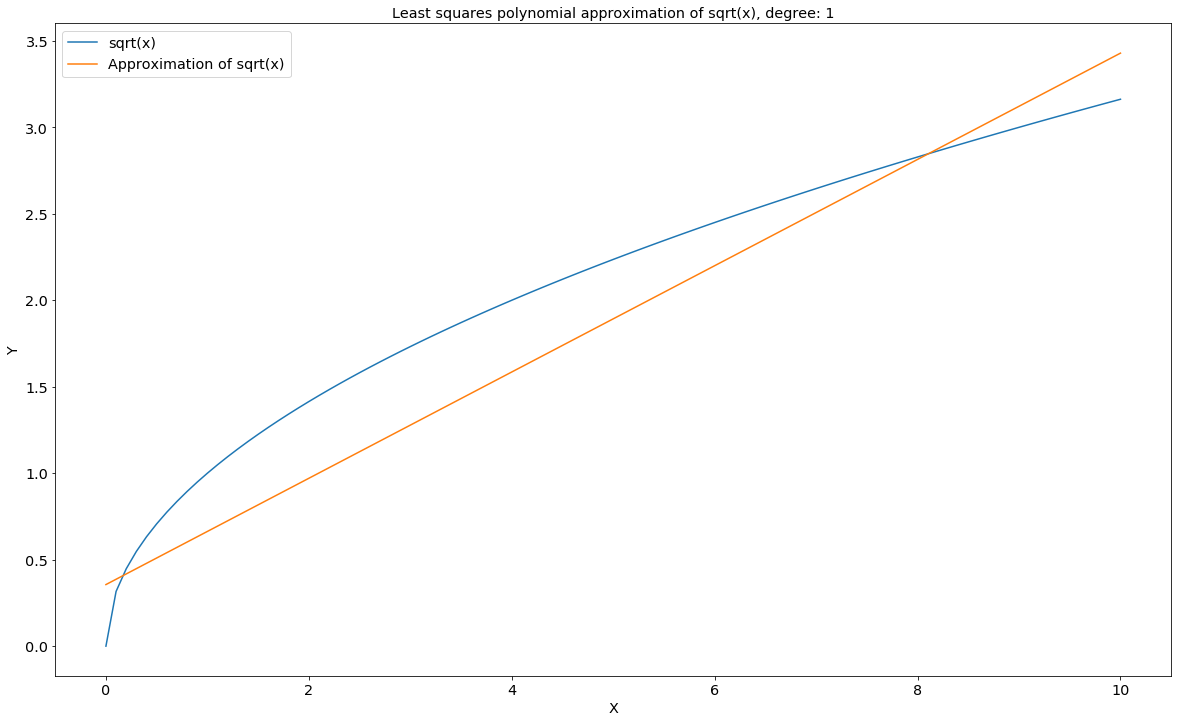

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   16.1621157445 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2698747206 |
+-----------------------------+-----------------+ 



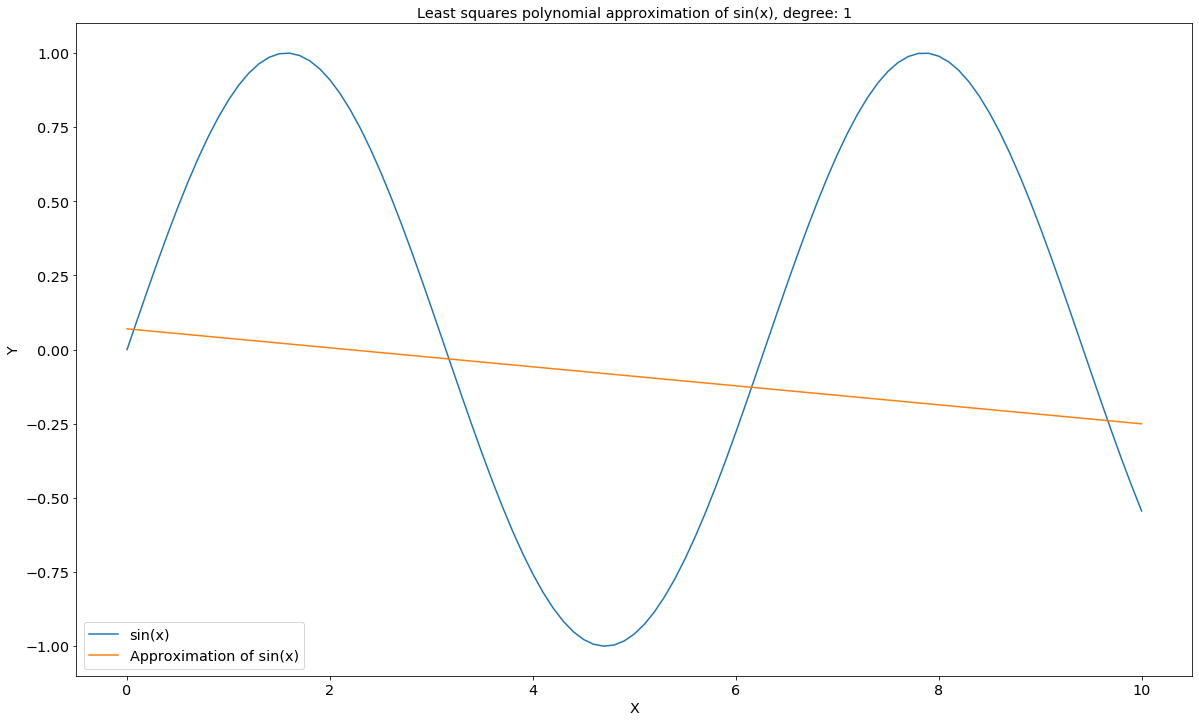

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   61.1023830777 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6313403390 |
+-----------------------------+-----------------+ 



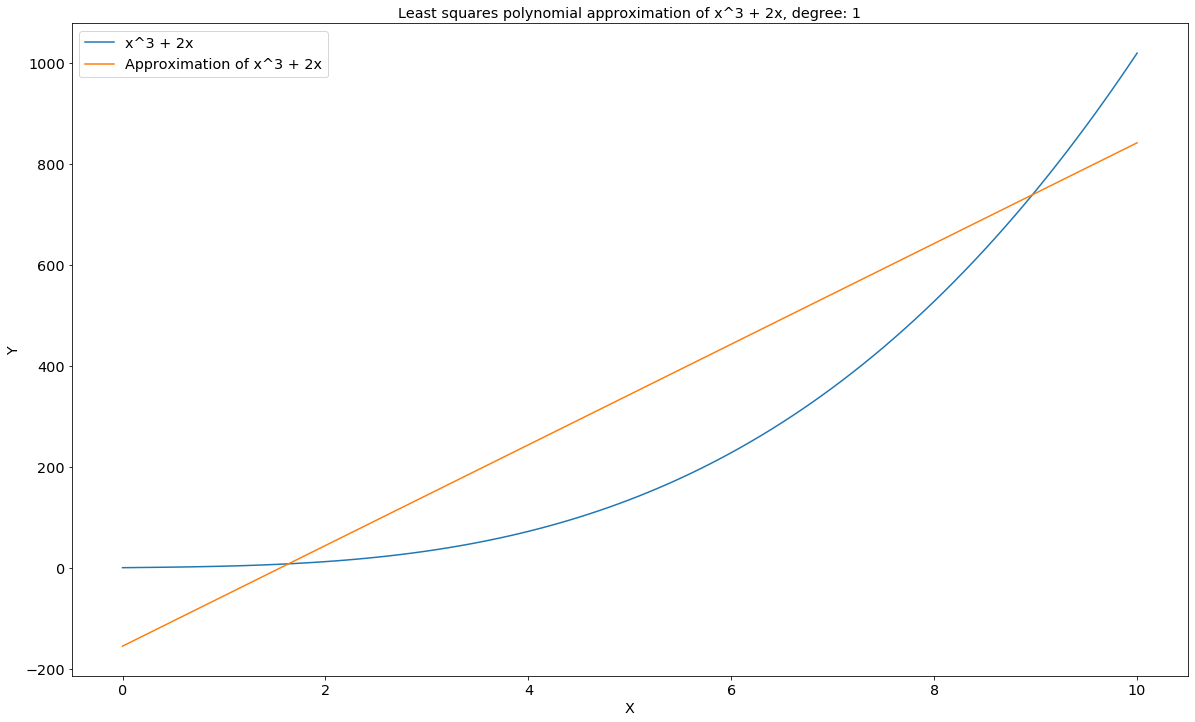

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 1976.8470640151 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  126.1594917492 |
+-----------------------------+-----------------+ 



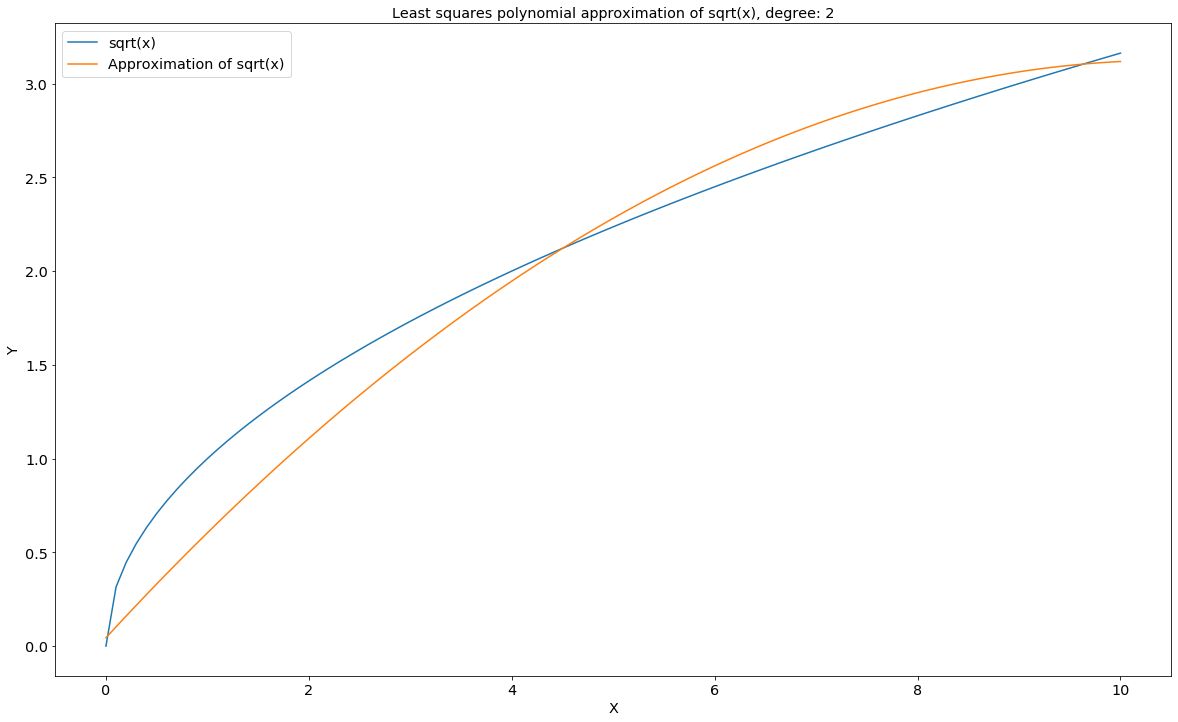

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   12.0264890686 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1534407675 |
+-----------------------------+-----------------+ 



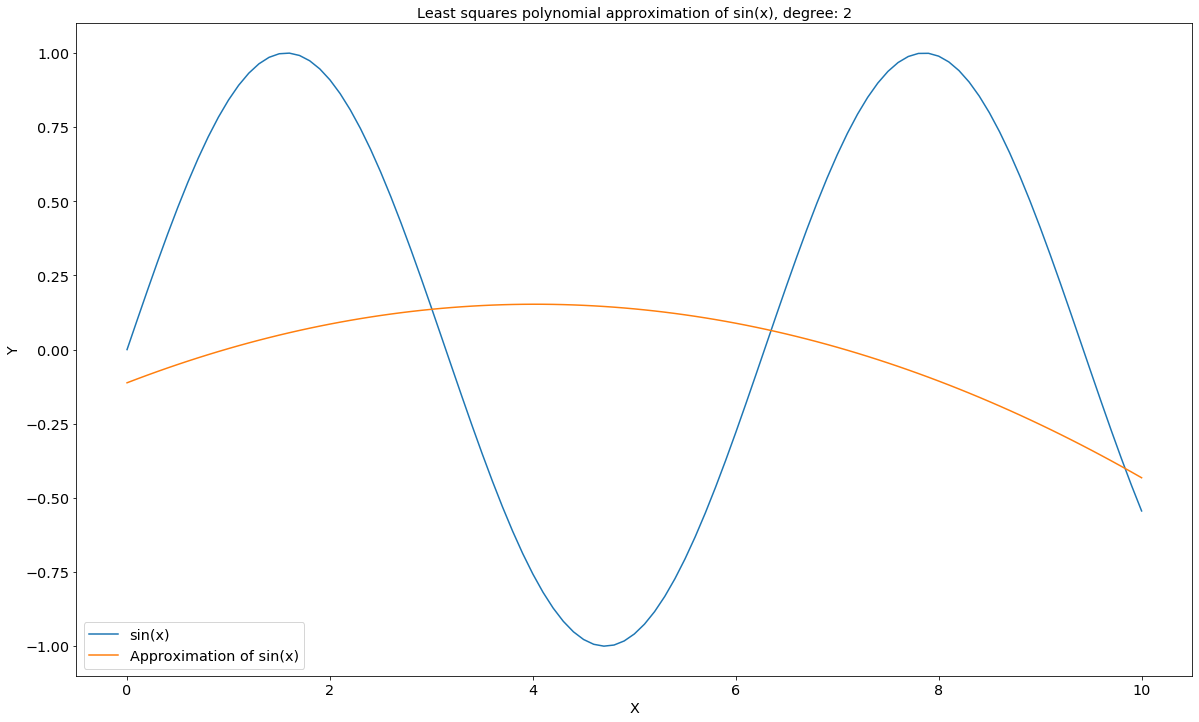

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   37.5487919113 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6644789867 |
+-----------------------------+-----------------+ 



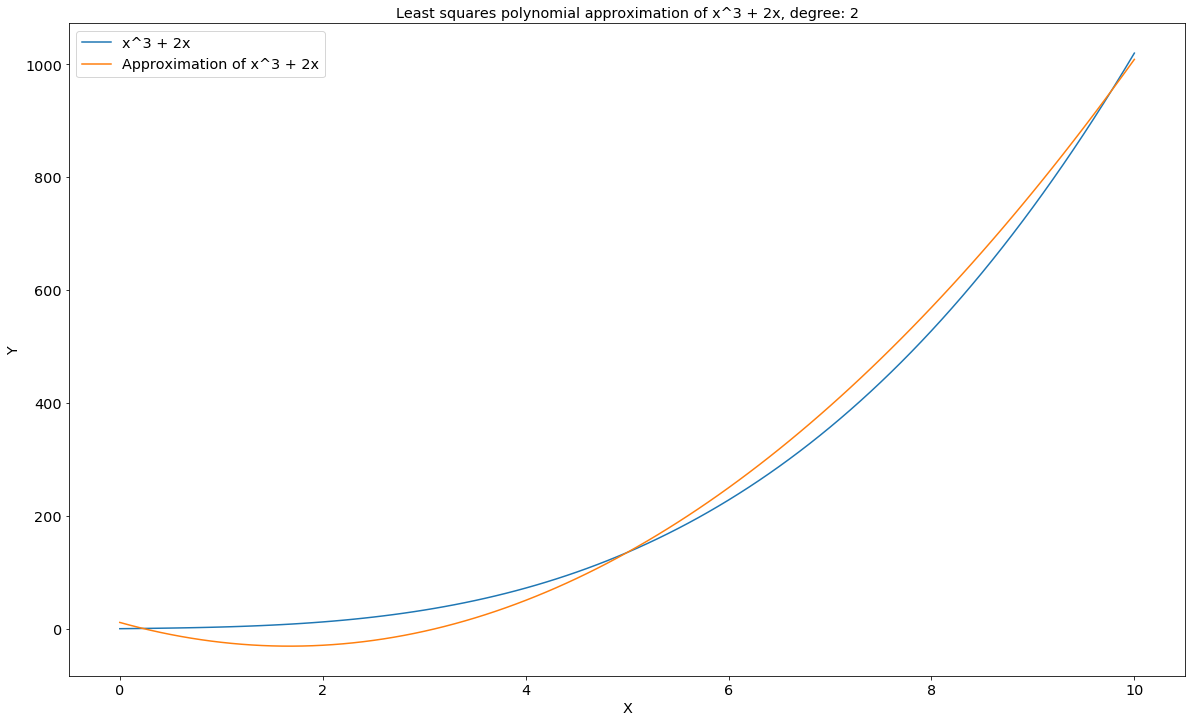

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |  203.2496474875 |
+-----------------------------+-----------------+
| Mean of absolute errors     |   26.0466732673 |
+-----------------------------+-----------------+ 



In [72]:
show_lspan(0, 10, 3, 2)

## 4 Węzły

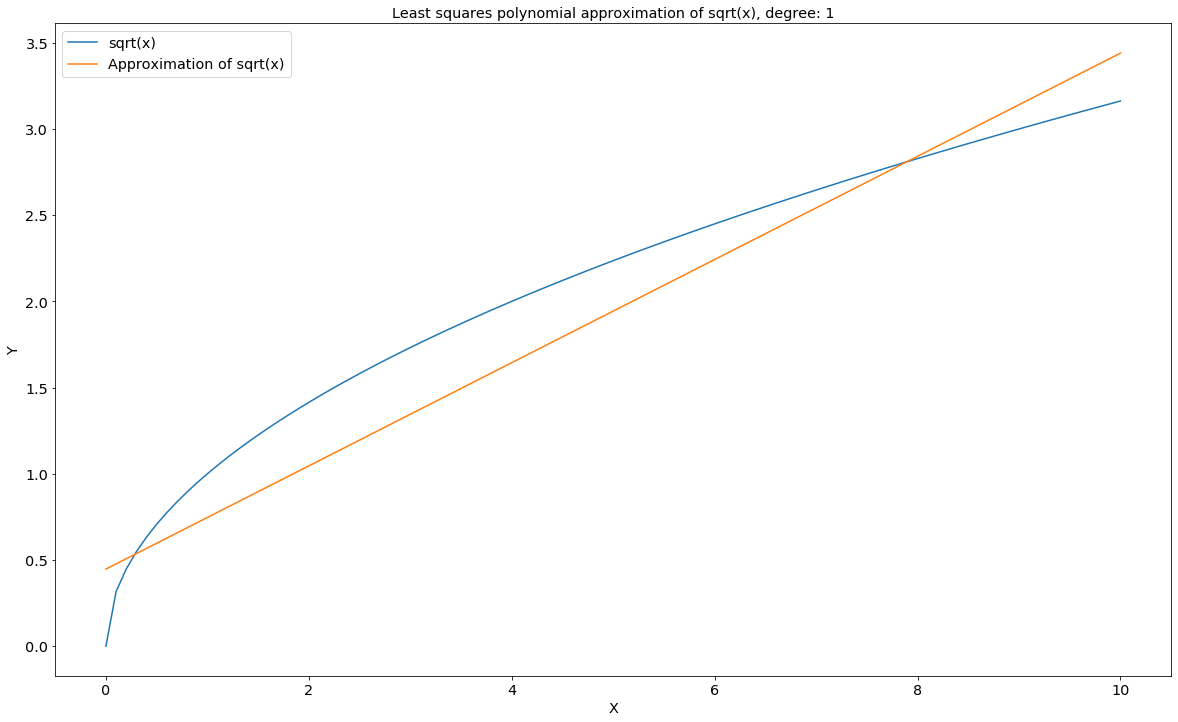

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   13.7181370448 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2311885603 |
+-----------------------------+-----------------+ 



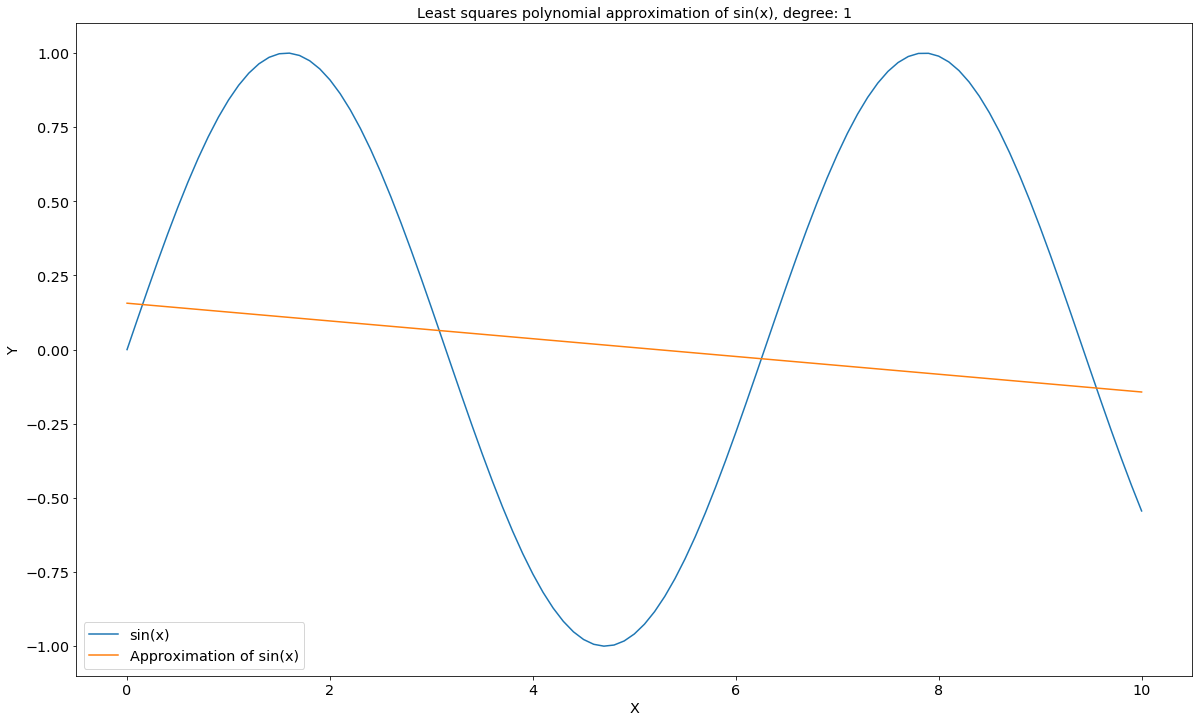

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   31.9051244762 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6052065878 |
+-----------------------------+-----------------+ 



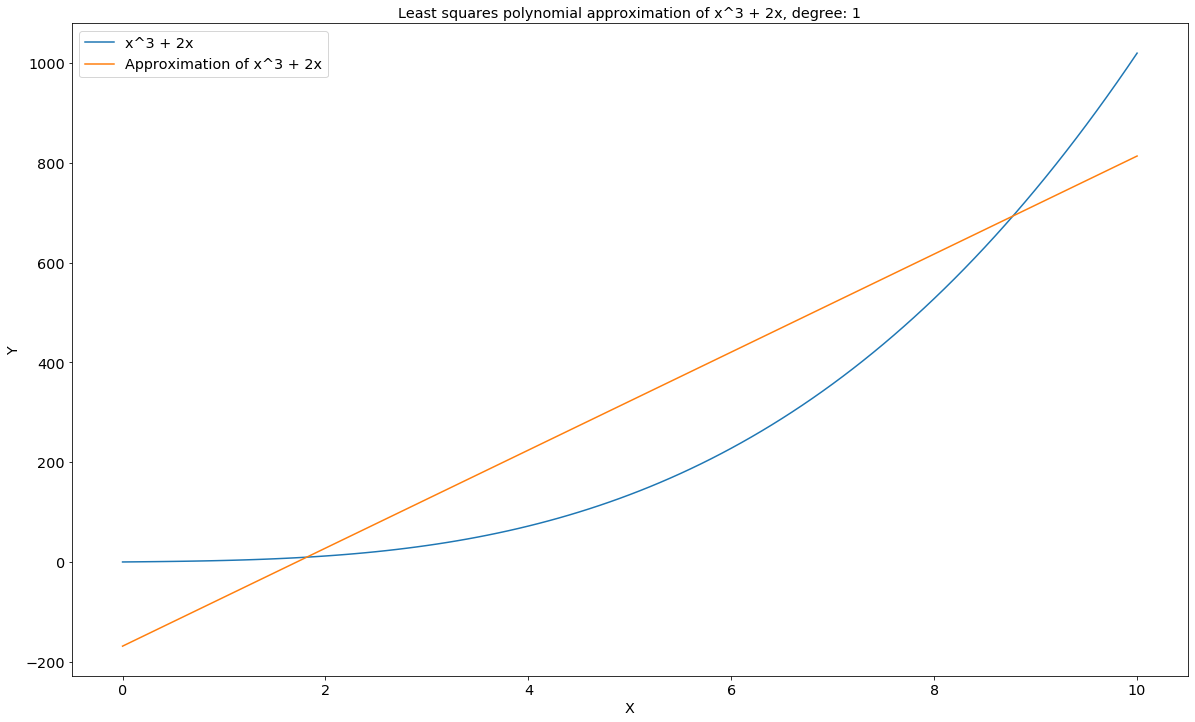

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2171.5439198084 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  116.8422178218 |
+-----------------------------+-----------------+ 



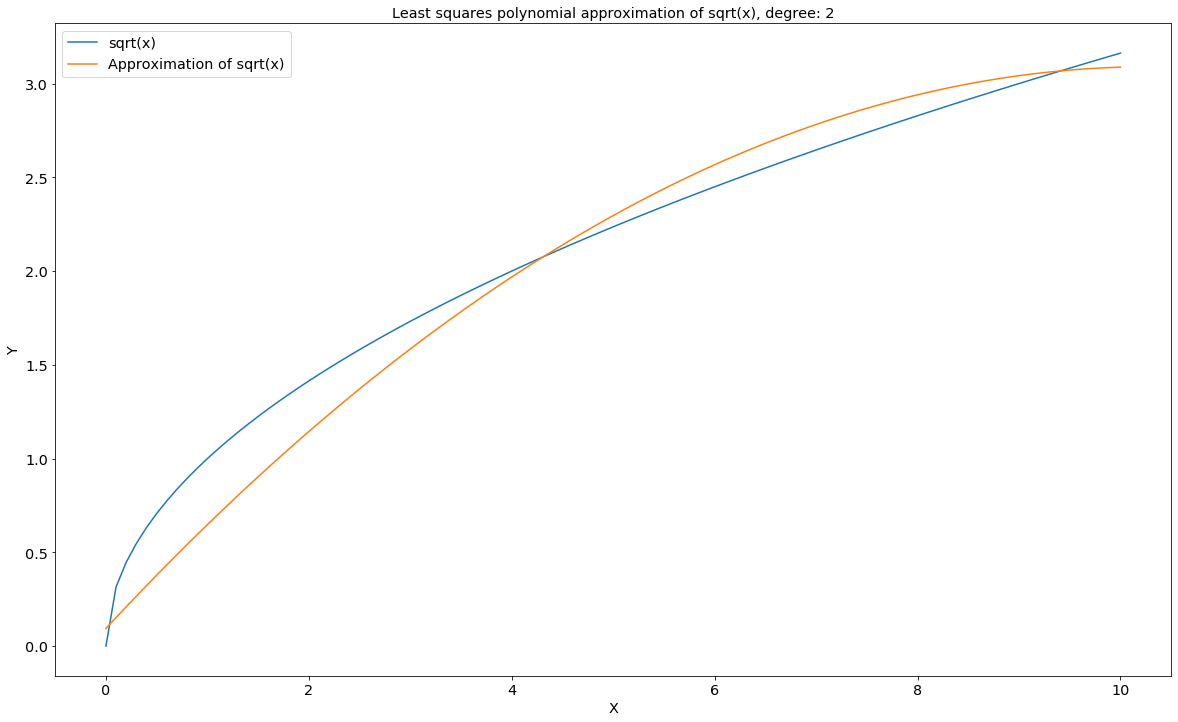

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   10.6610100653 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1390879083 |
+-----------------------------+-----------------+ 



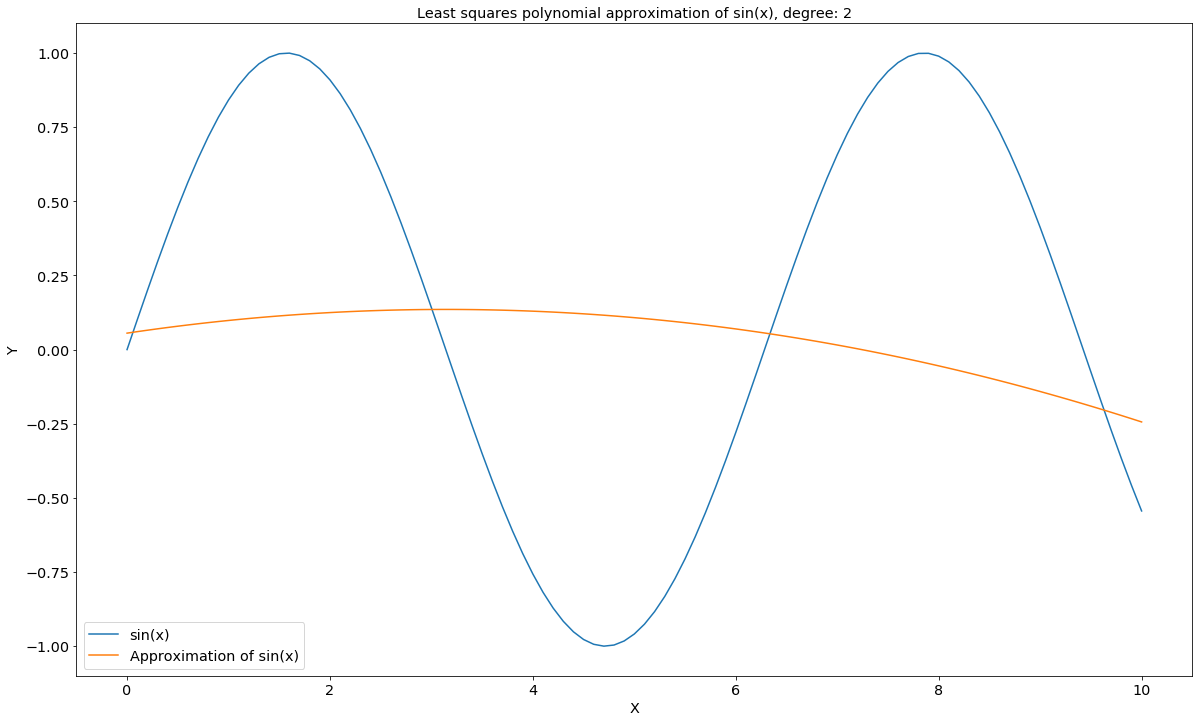

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   25.8530938714 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6216631823 |
+-----------------------------+-----------------+ 



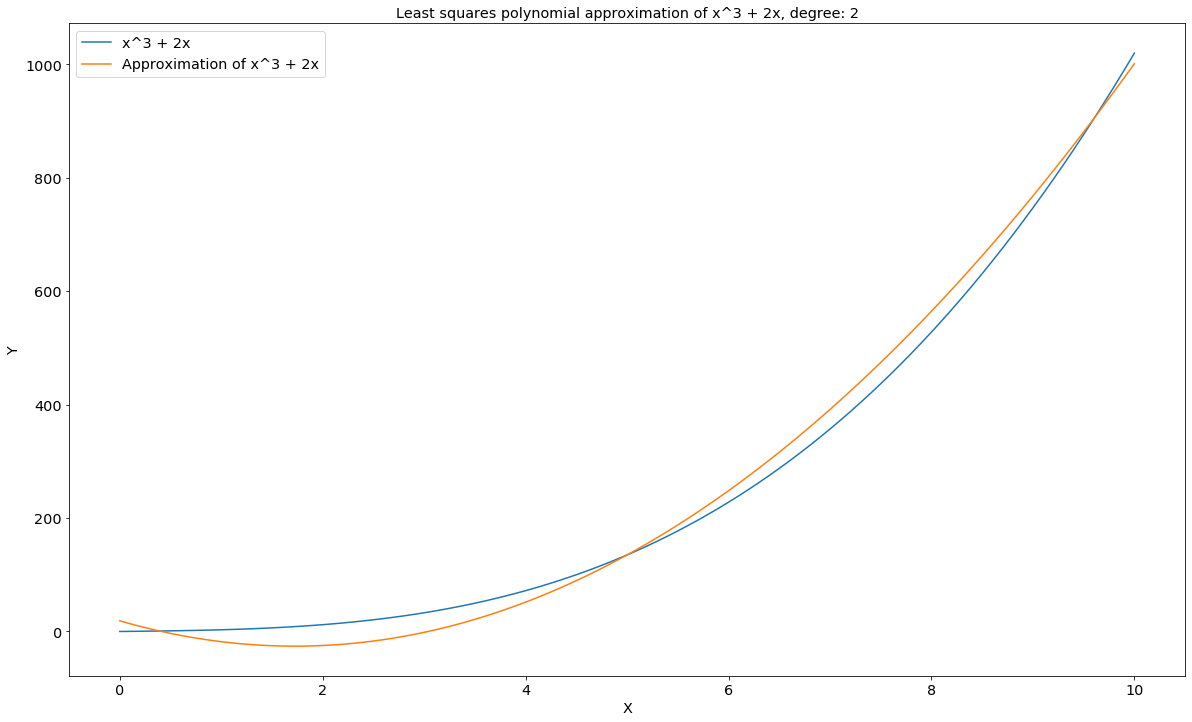

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |  225.2142335630 |
+-----------------------------+-----------------+
| Mean of absolute errors     |   23.2352079208 |
+-----------------------------+-----------------+ 



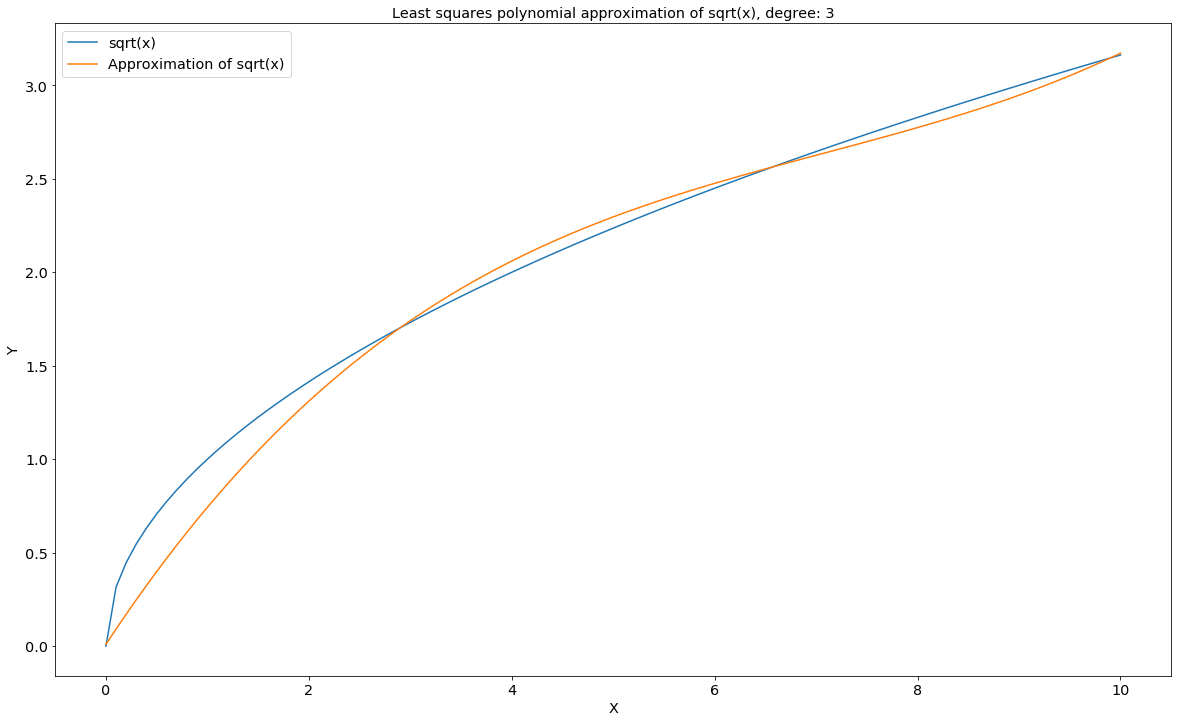

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    7.2102082630 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0771971697 |
+-----------------------------+-----------------+ 



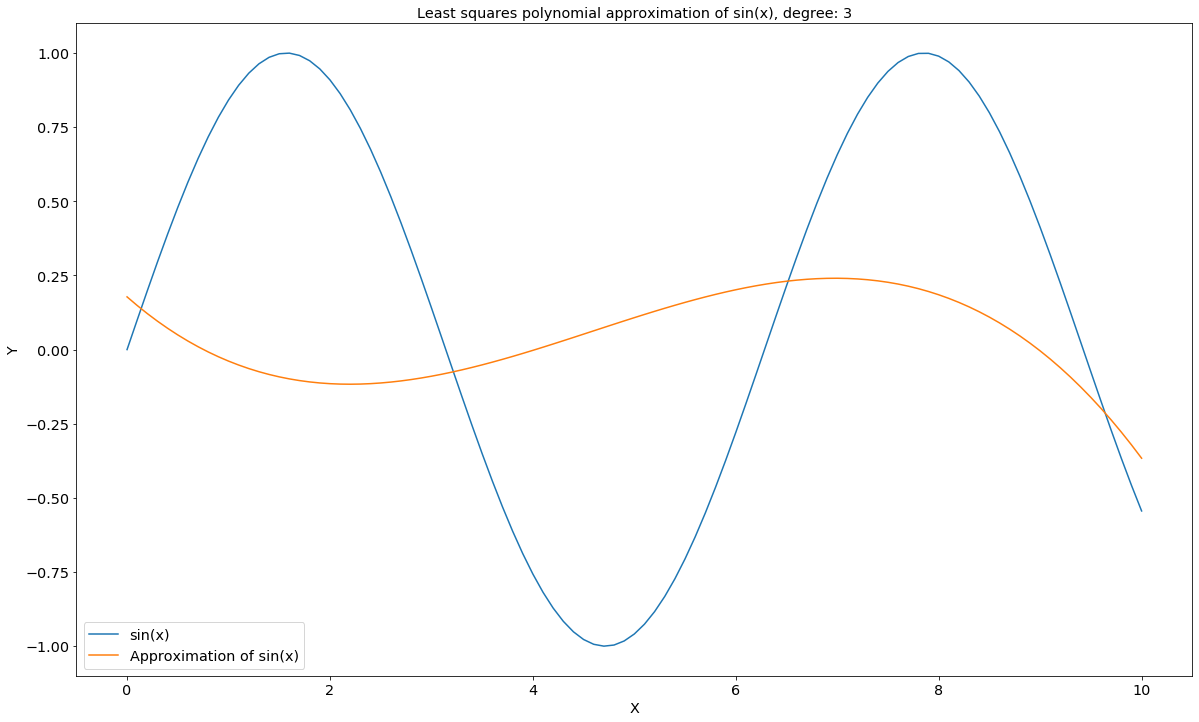

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   37.8550279152 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6009782488 |
+-----------------------------+-----------------+ 



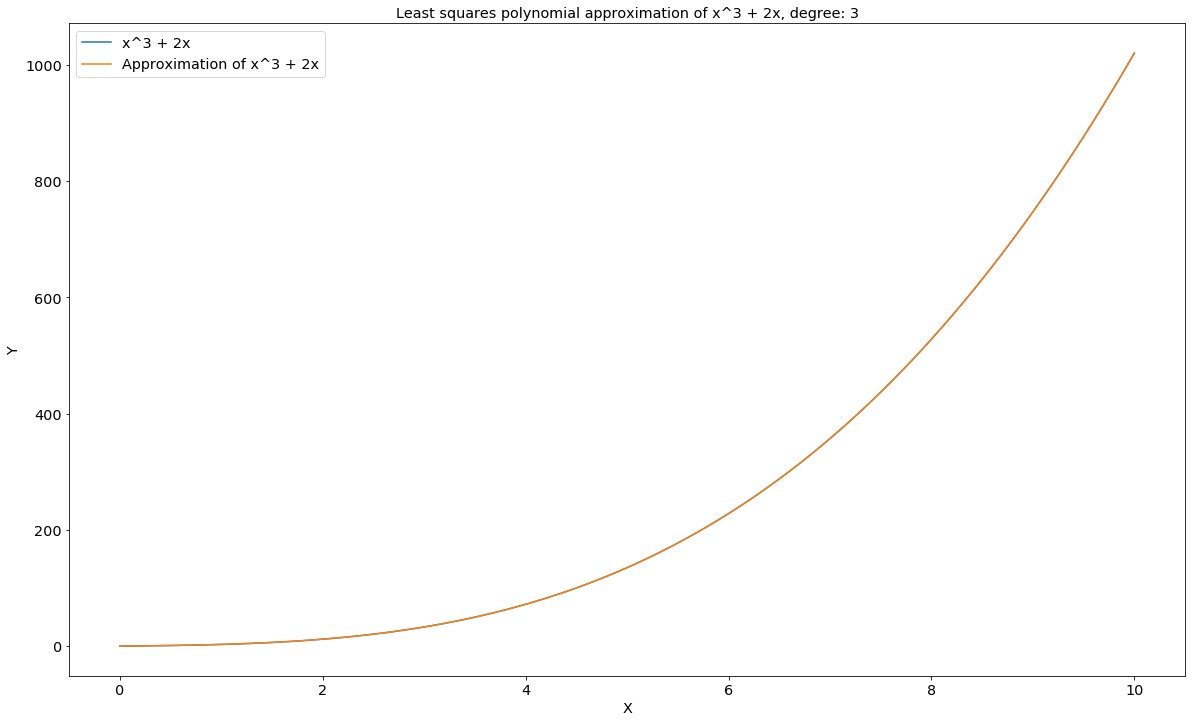

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000000 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000000 |
+-----------------------------+-----------------+ 



In [73]:
show_lspan(0, 10, 4, 3)

## 5 Węzłów

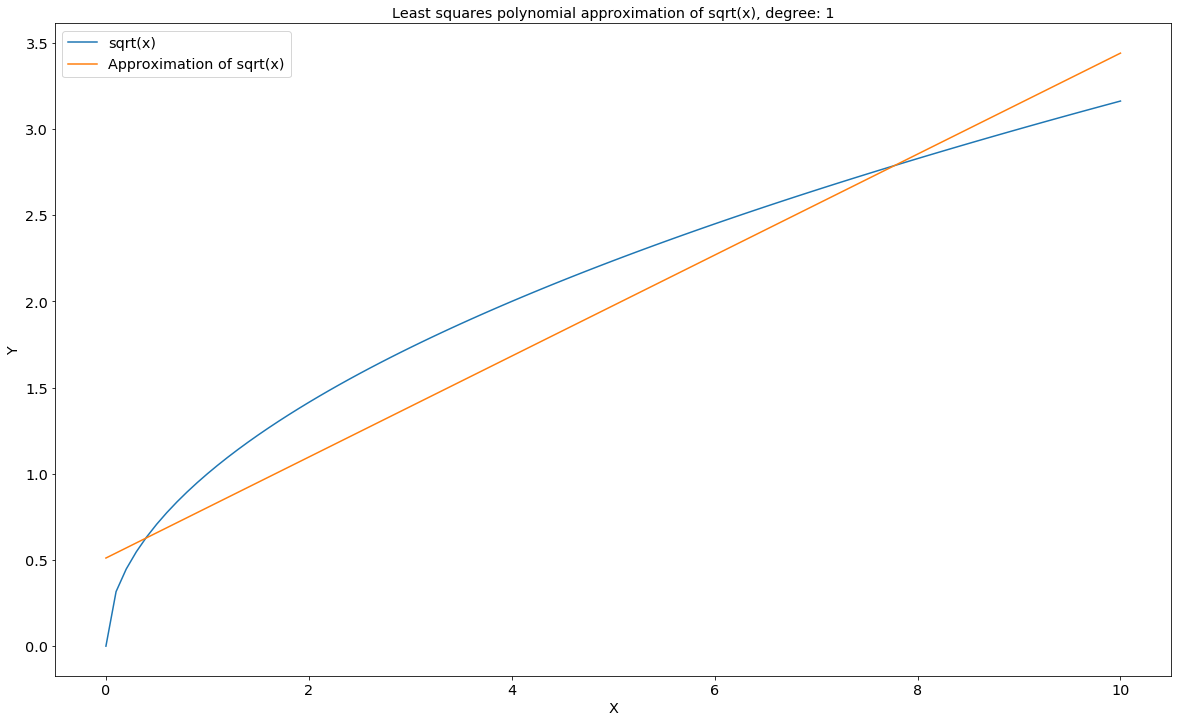

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   12.3628285583 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2069361012 |
+-----------------------------+-----------------+ 



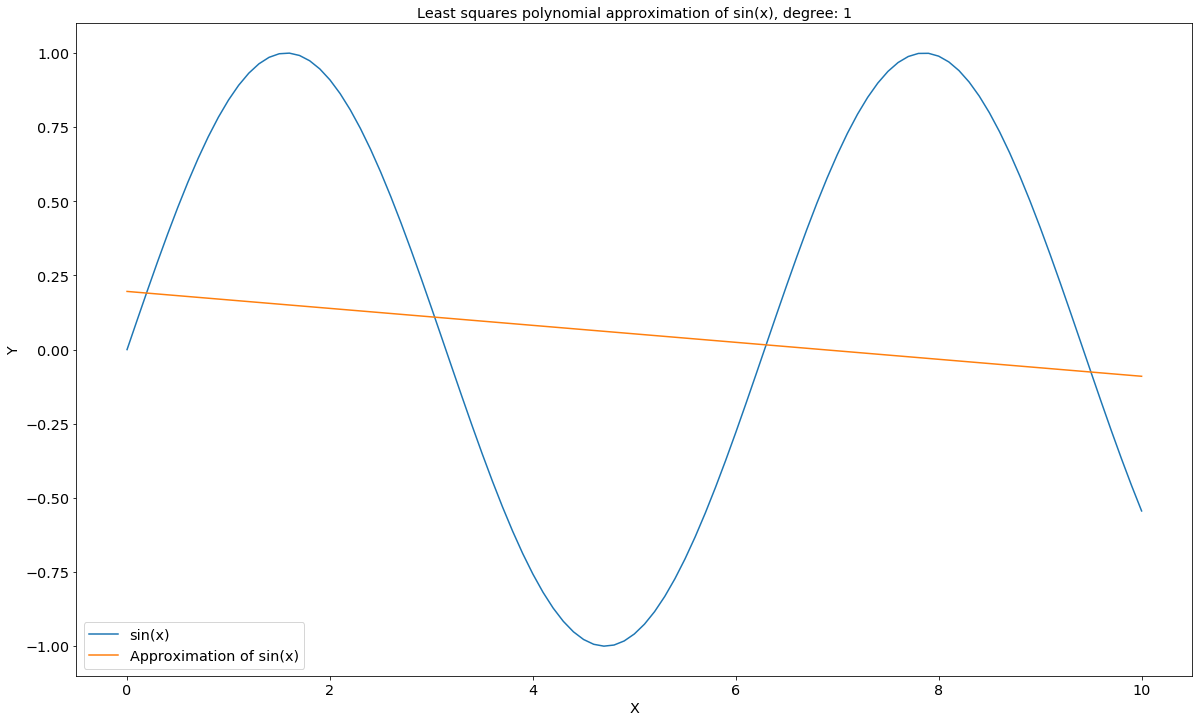

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   18.8785629632 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5947249745 |
+-----------------------------+-----------------+ 



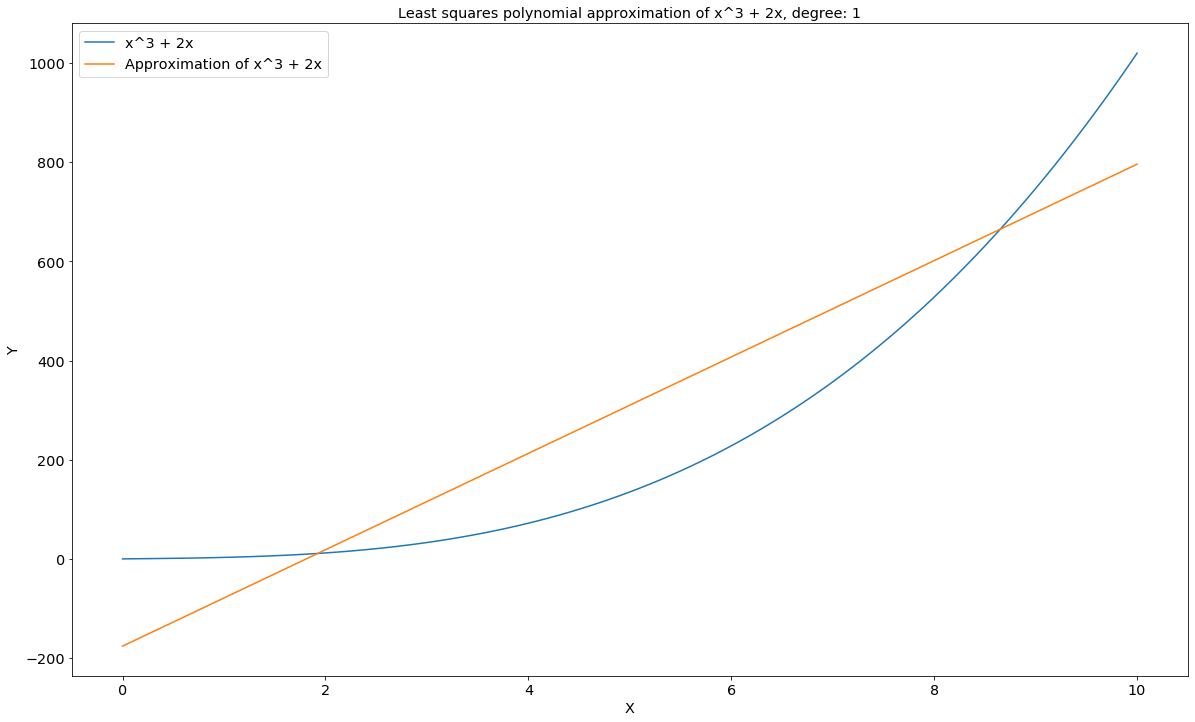

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2282.0061653995 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  111.9958217822 |
+-----------------------------+-----------------+ 



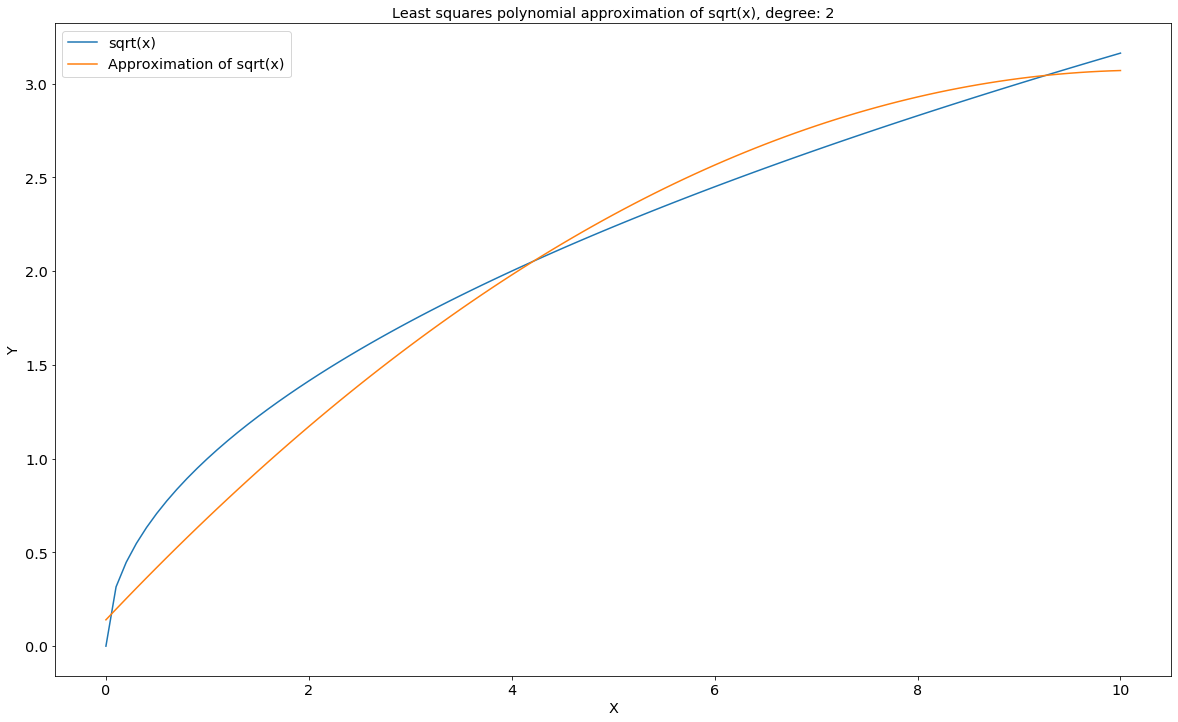

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    9.5377578650 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1273064228 |
+-----------------------------+-----------------+ 



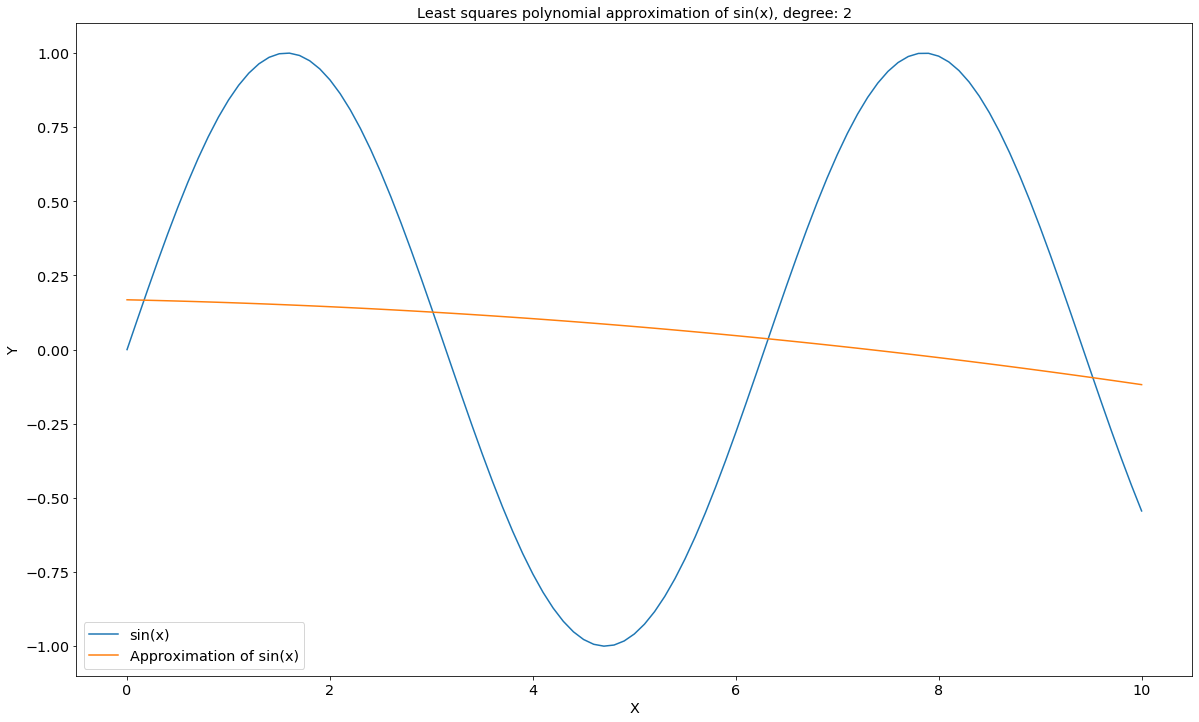

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   18.8413086793 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5992958068 |
+-----------------------------+-----------------+ 



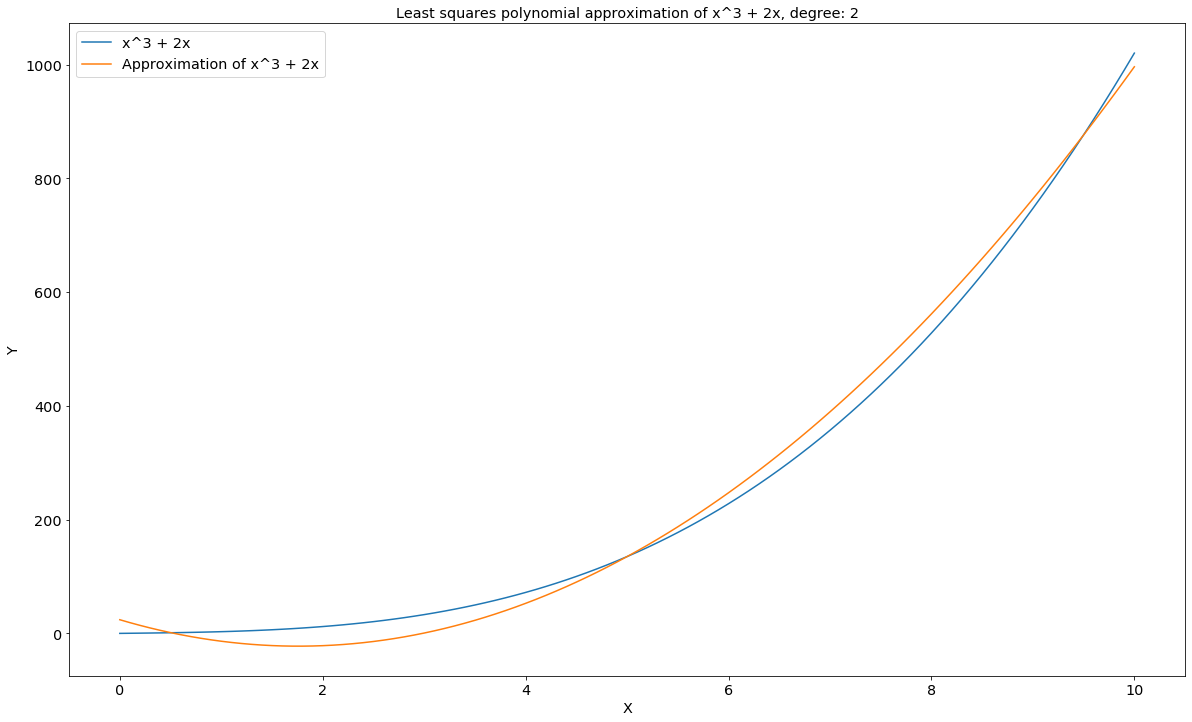

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |  257.8582782867 |
+-----------------------------+-----------------+
| Mean of absolute errors     |   21.5747524752 |
+-----------------------------+-----------------+ 



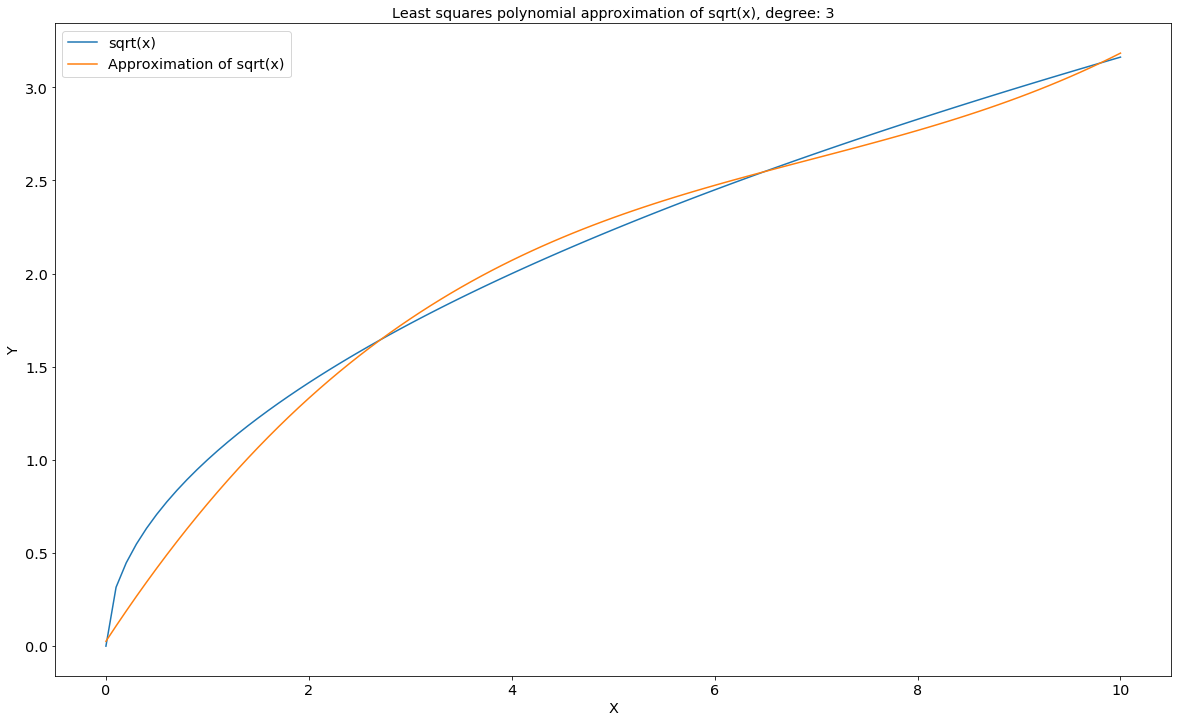

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    6.8333167437 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0753301159 |
+-----------------------------+-----------------+ 



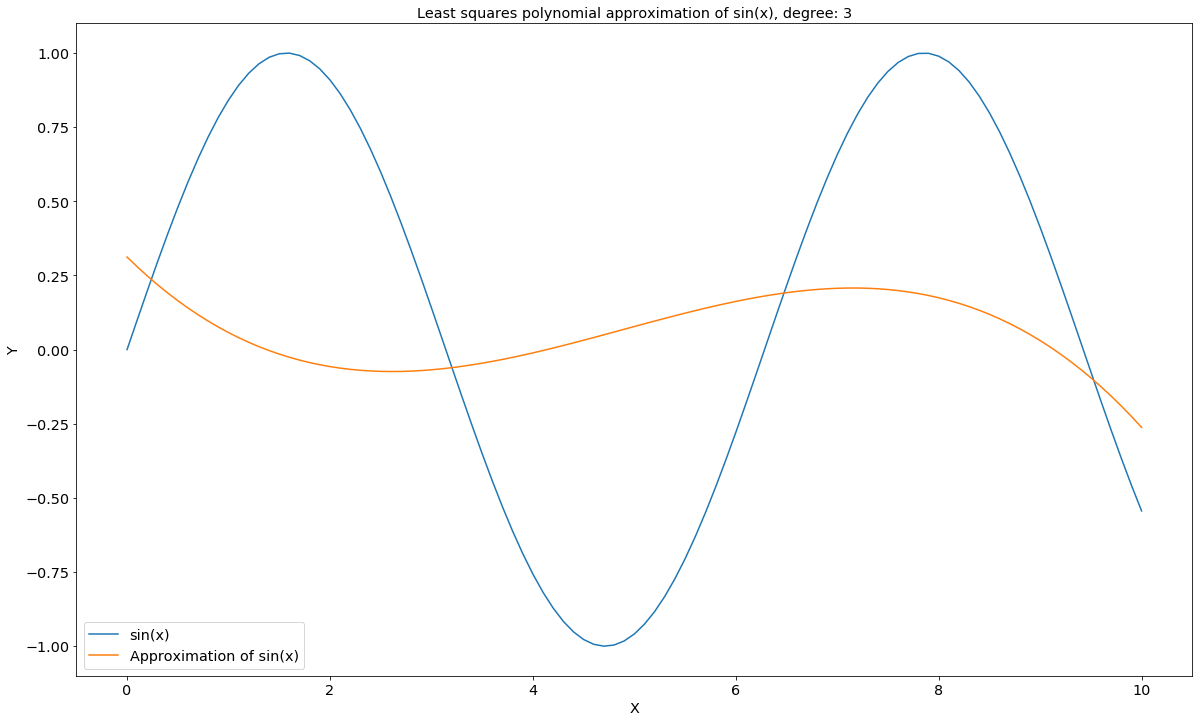

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   31.6241974537 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5801486641 |
+-----------------------------+-----------------+ 



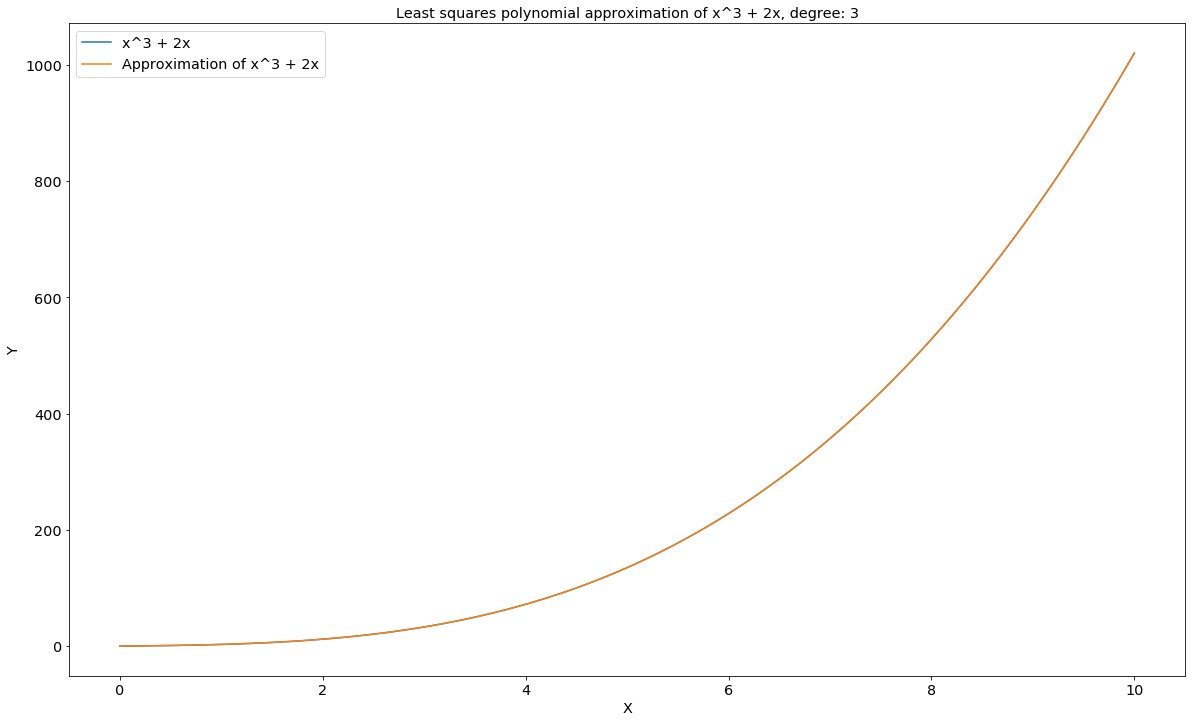

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000000 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000000 |
+-----------------------------+-----------------+ 



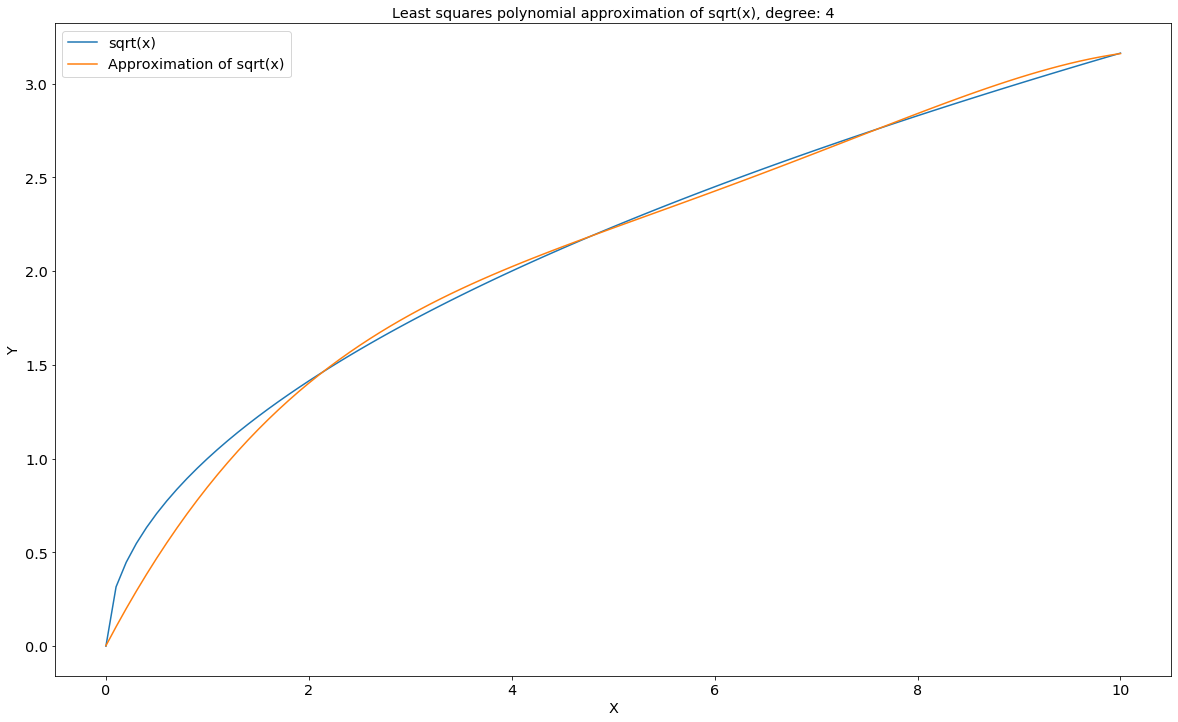

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    4.7056372185 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0429679156 |
+-----------------------------+-----------------+ 



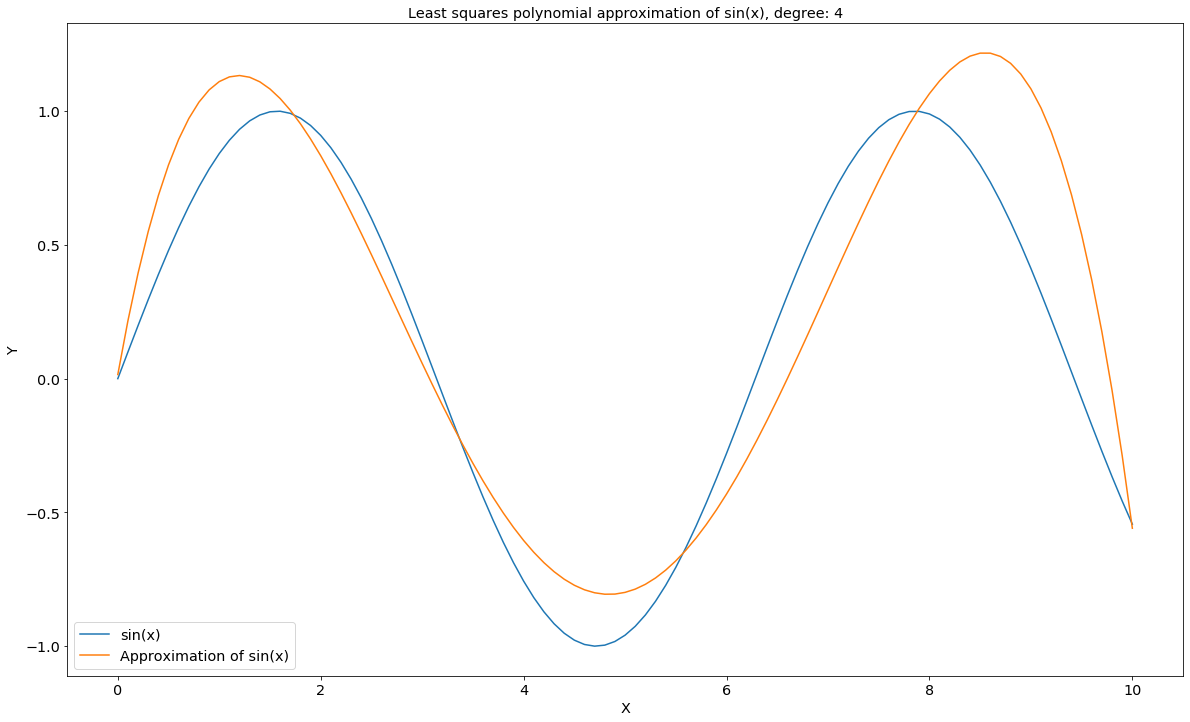

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   56.7143627163 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2184819522 |
+-----------------------------+-----------------+ 



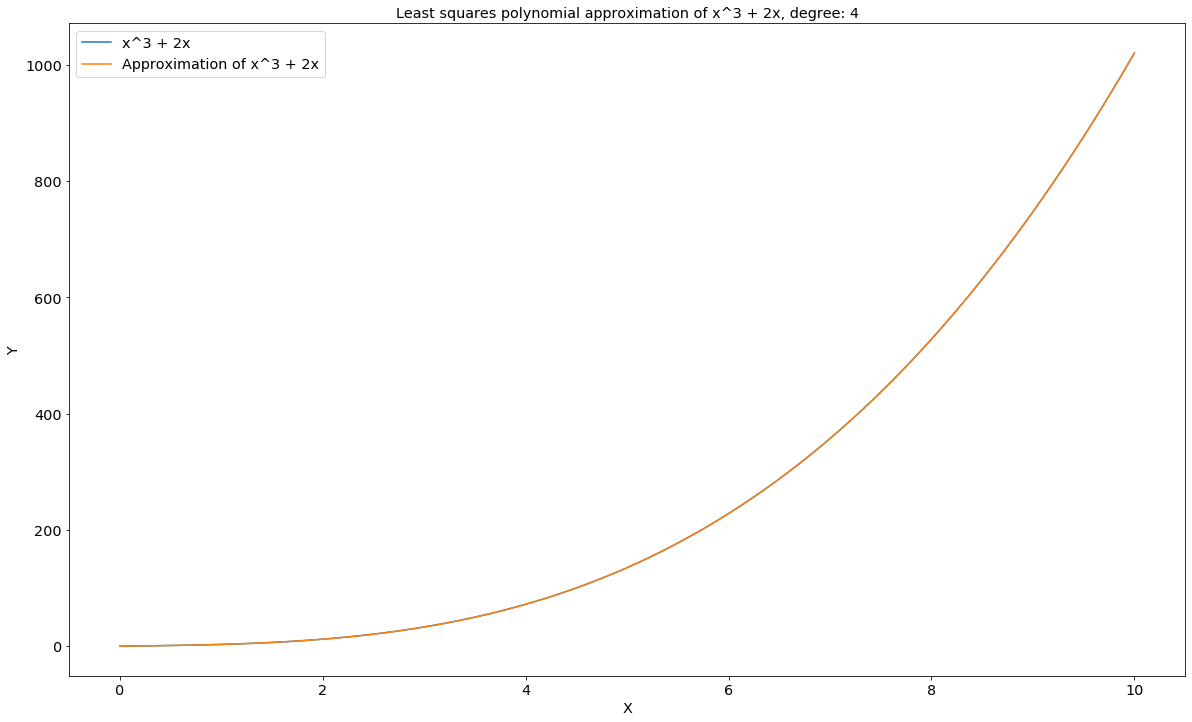

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000000 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000000 |
+-----------------------------+-----------------+ 



In [74]:
show_lspan(0, 10, 5, 4)

## 8 Węzłów

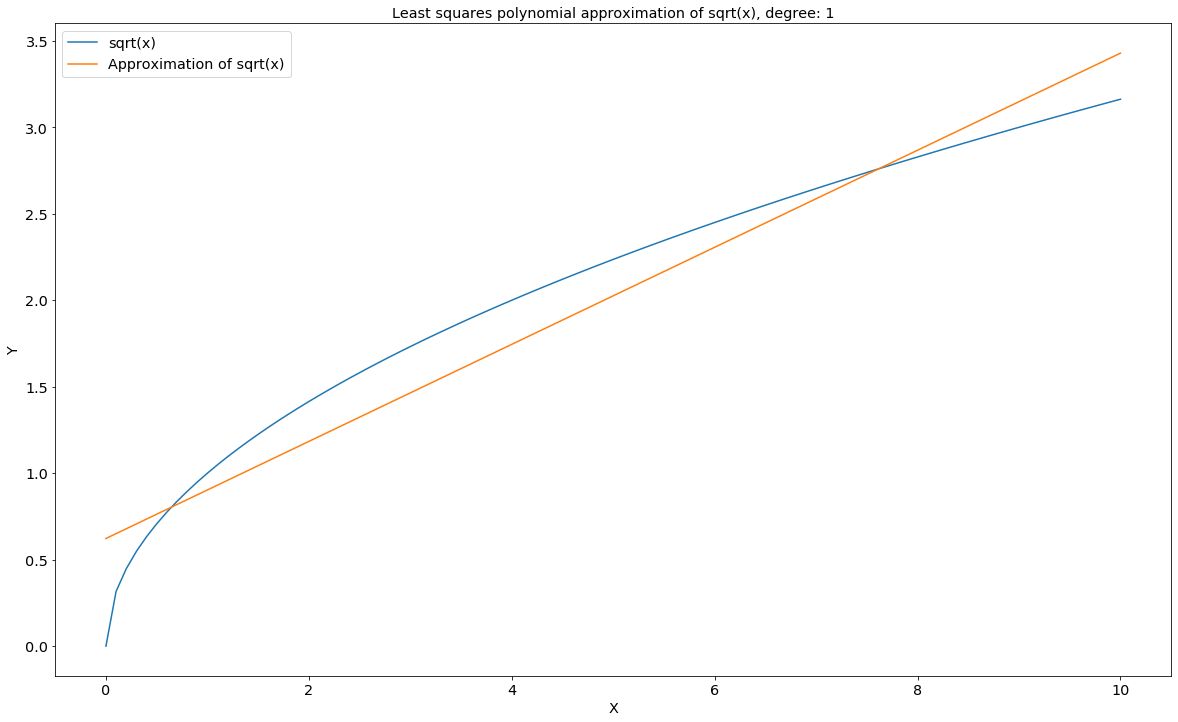

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   10.6965218139 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1702491452 |
+-----------------------------+-----------------+ 



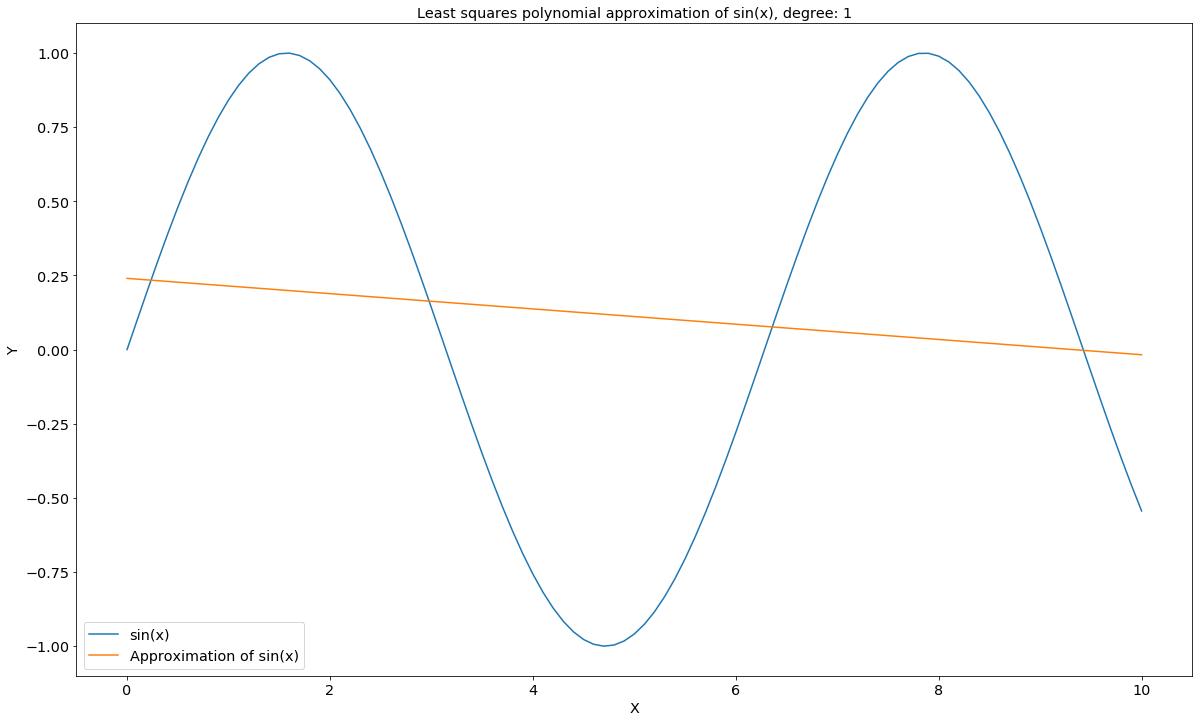

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    8.1023029953 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5853678790 |
+-----------------------------+-----------------+ 



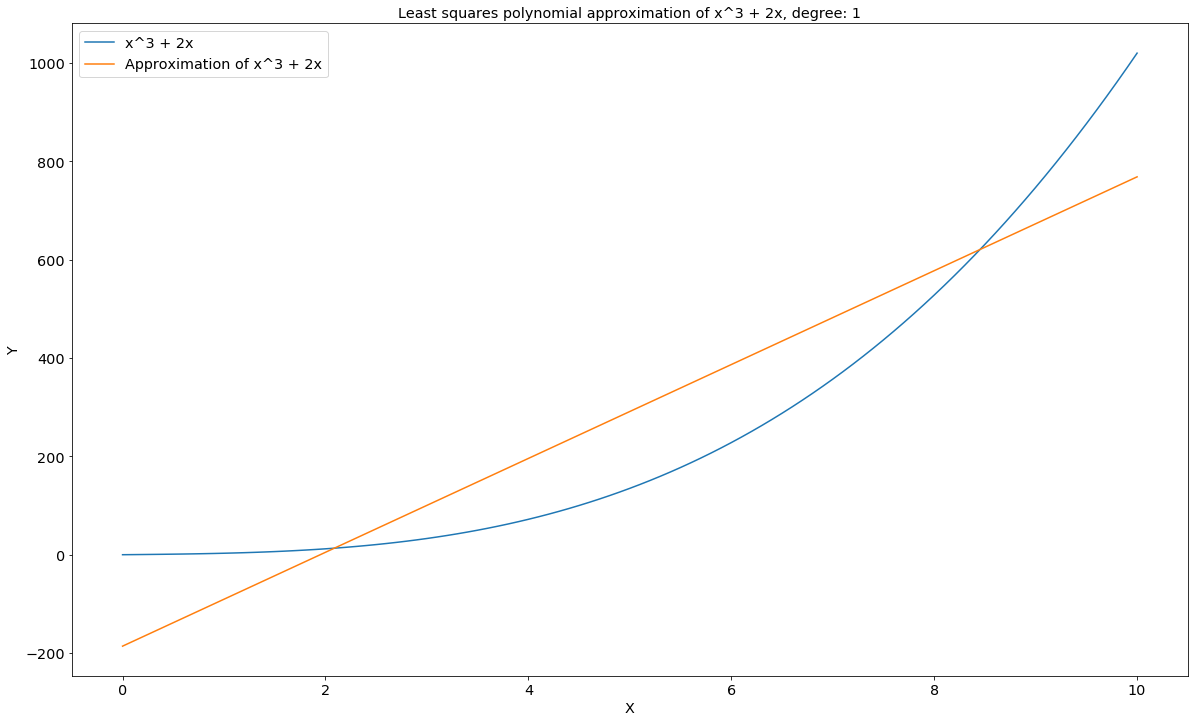

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2437.5984813932 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  105.7886138614 |
+-----------------------------+-----------------+ 



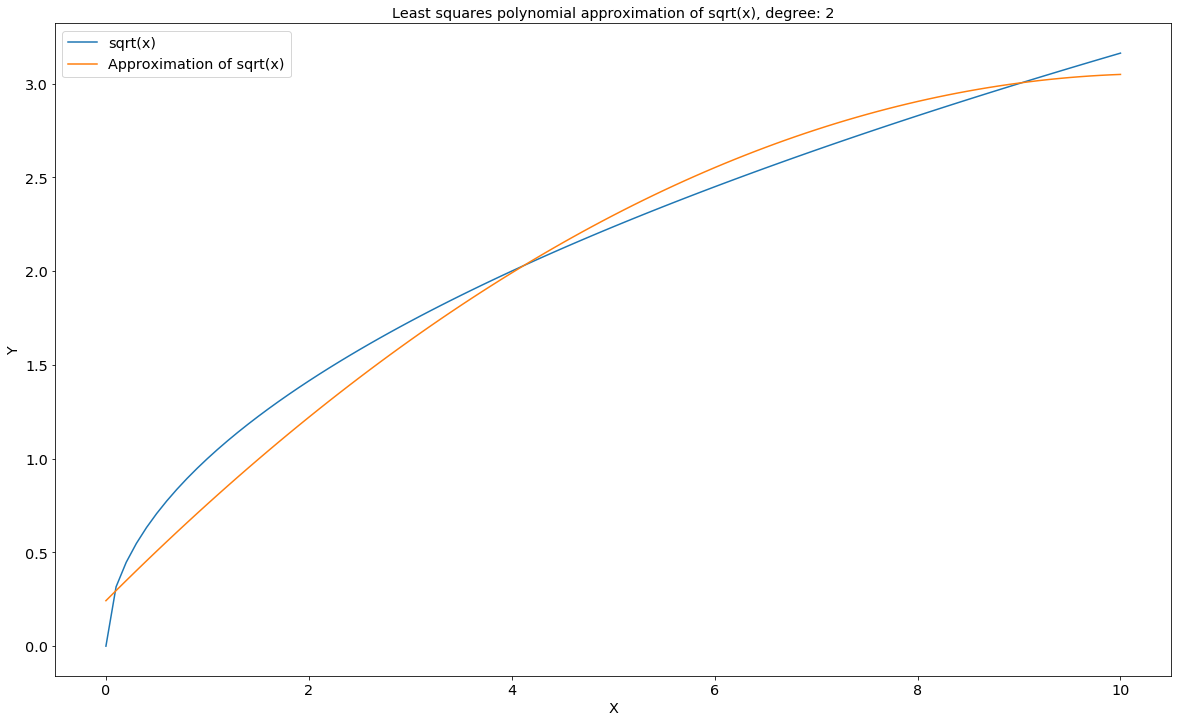

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    7.1992476779 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1027393700 |
+-----------------------------+-----------------+ 



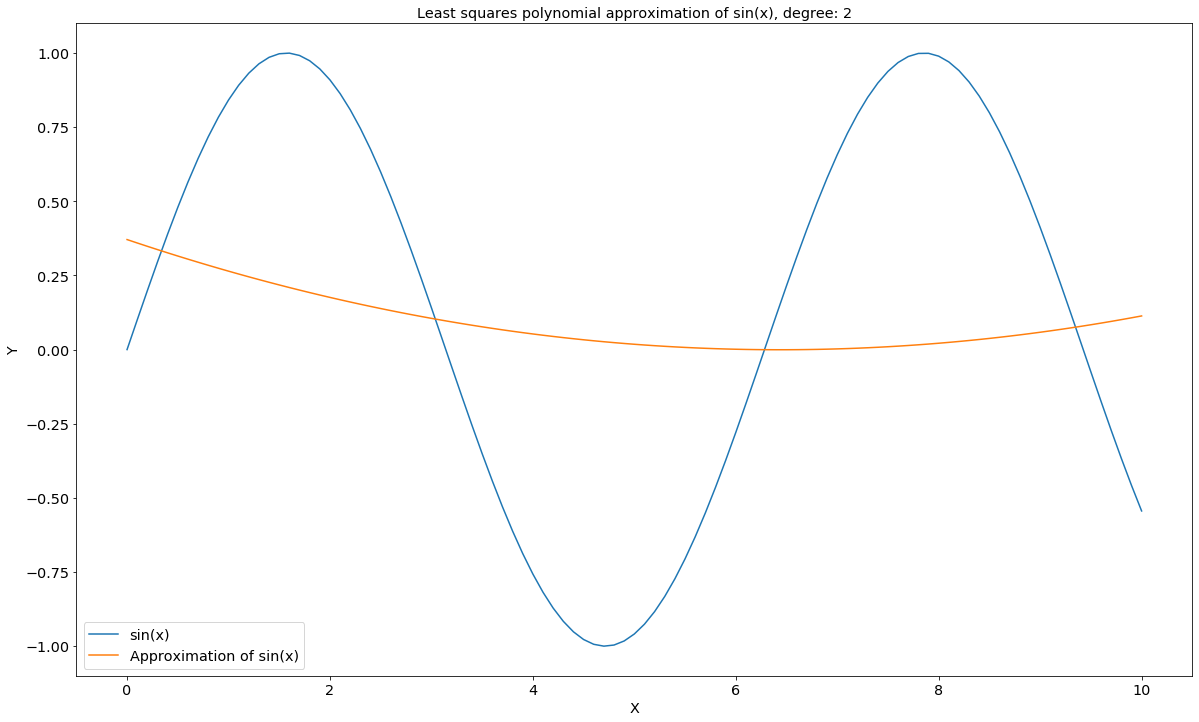

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   11.1506400161 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5693595093 |
+-----------------------------+-----------------+ 



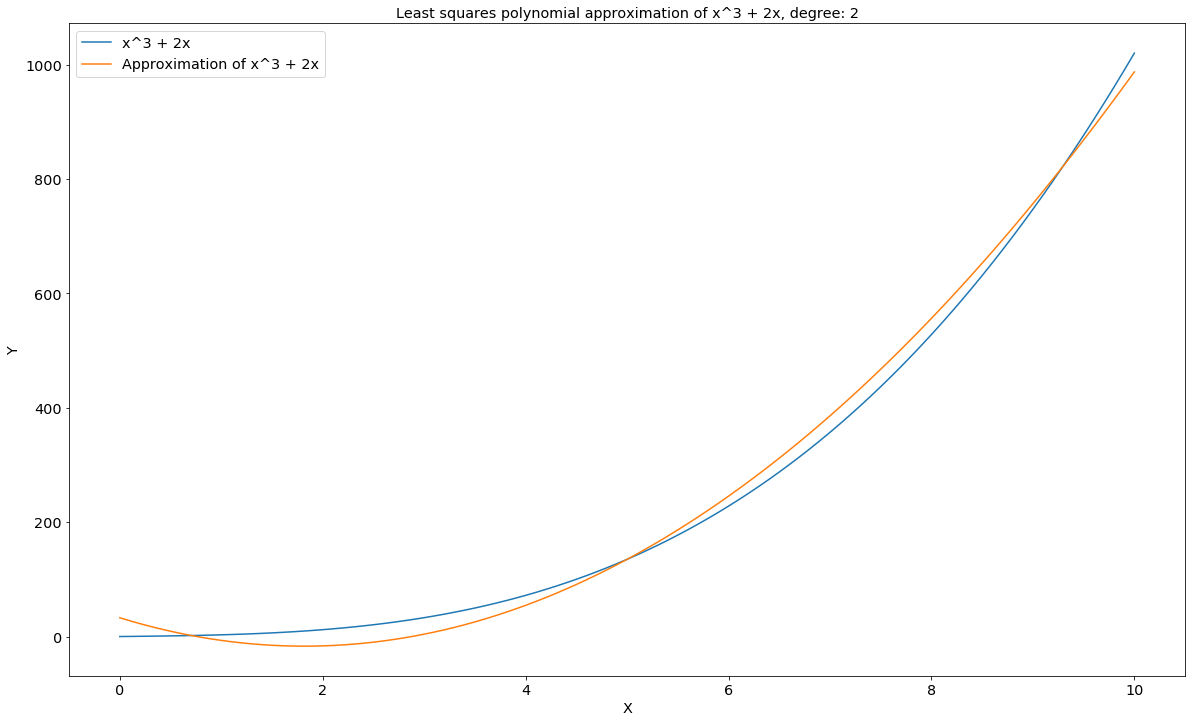

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |  333.5033136252 |
+-----------------------------+-----------------+
| Mean of absolute errors     |   19.2839257426 |
+-----------------------------+-----------------+ 



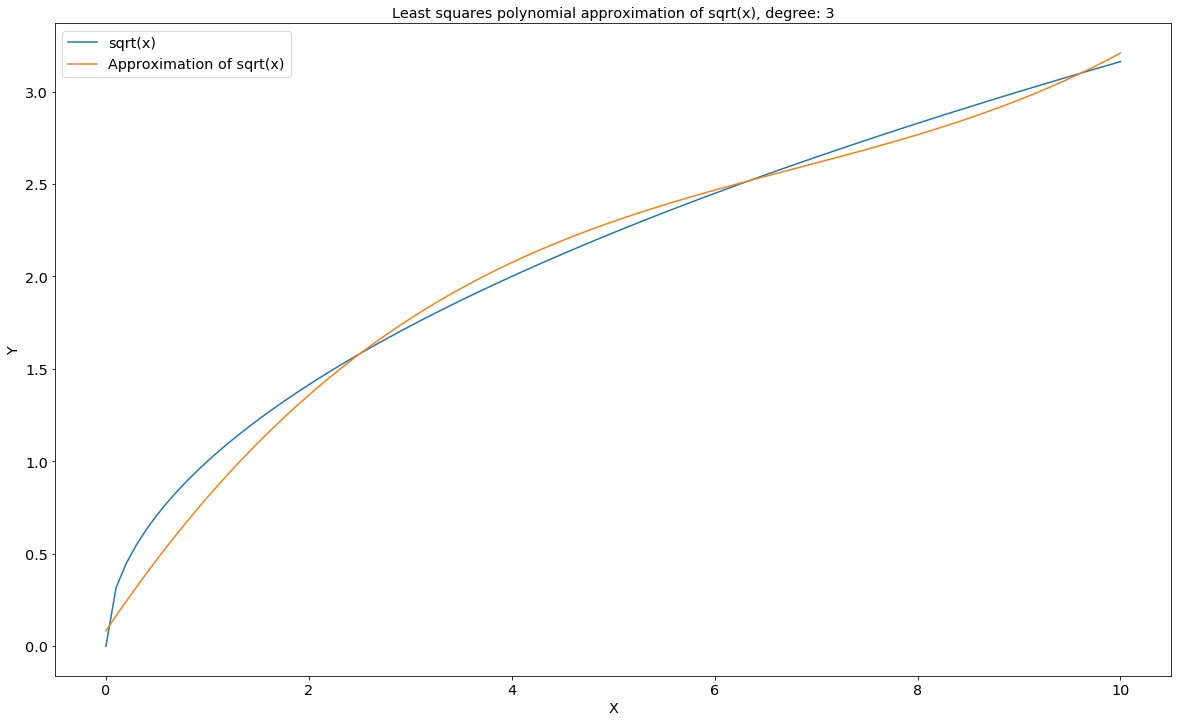

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    5.8242009222 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0677407995 |
+-----------------------------+-----------------+ 



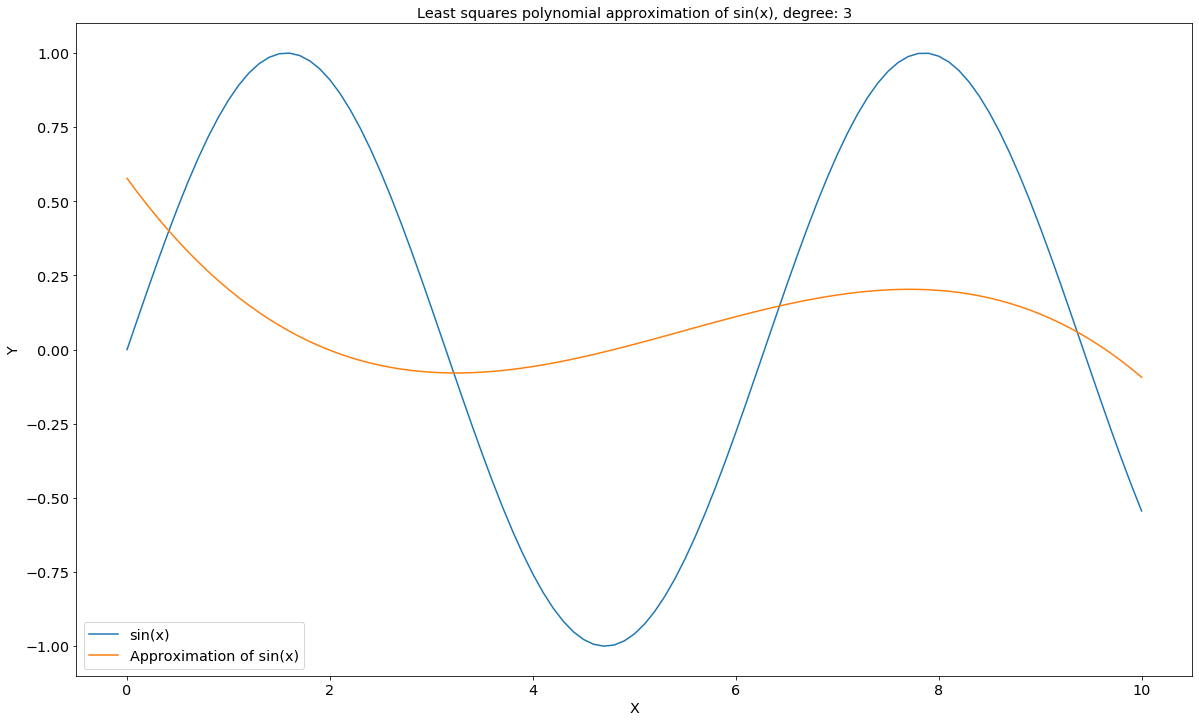

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   24.5074819247 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5502922111 |
+-----------------------------+-----------------+ 



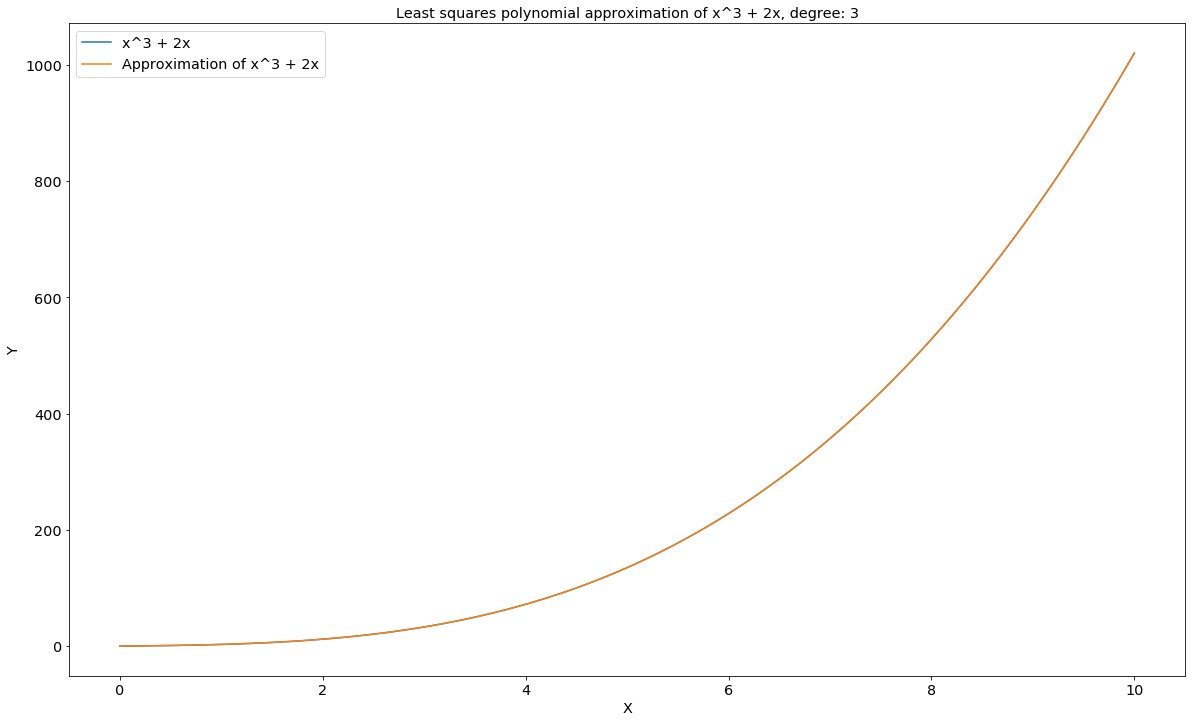

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000000 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000000 |
+-----------------------------+-----------------+ 



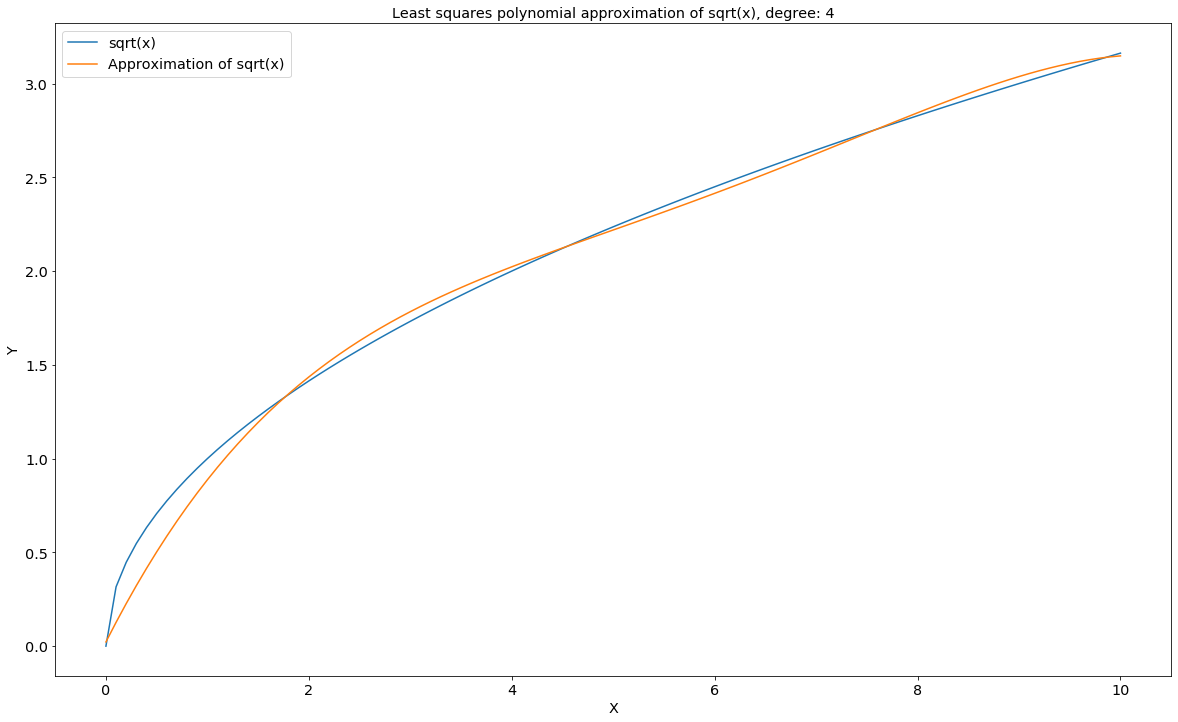

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    4.2908134767 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0430384747 |
+-----------------------------+-----------------+ 



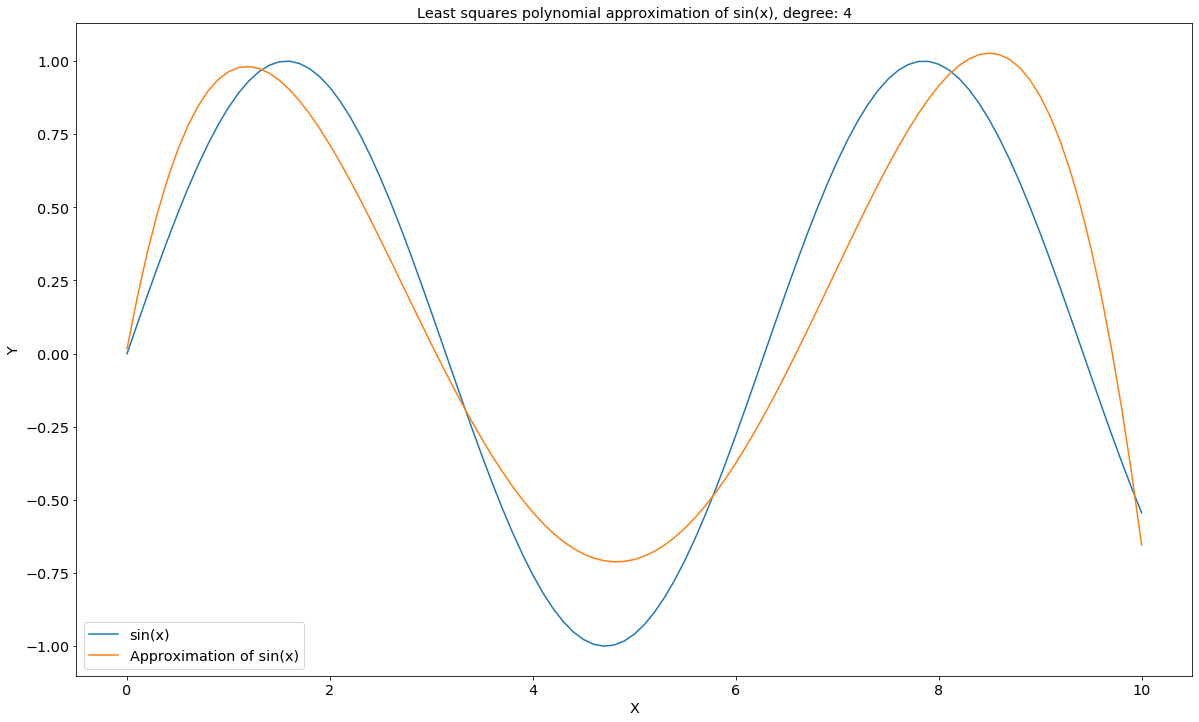

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   45.3828855888 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2048307344 |
+-----------------------------+-----------------+ 



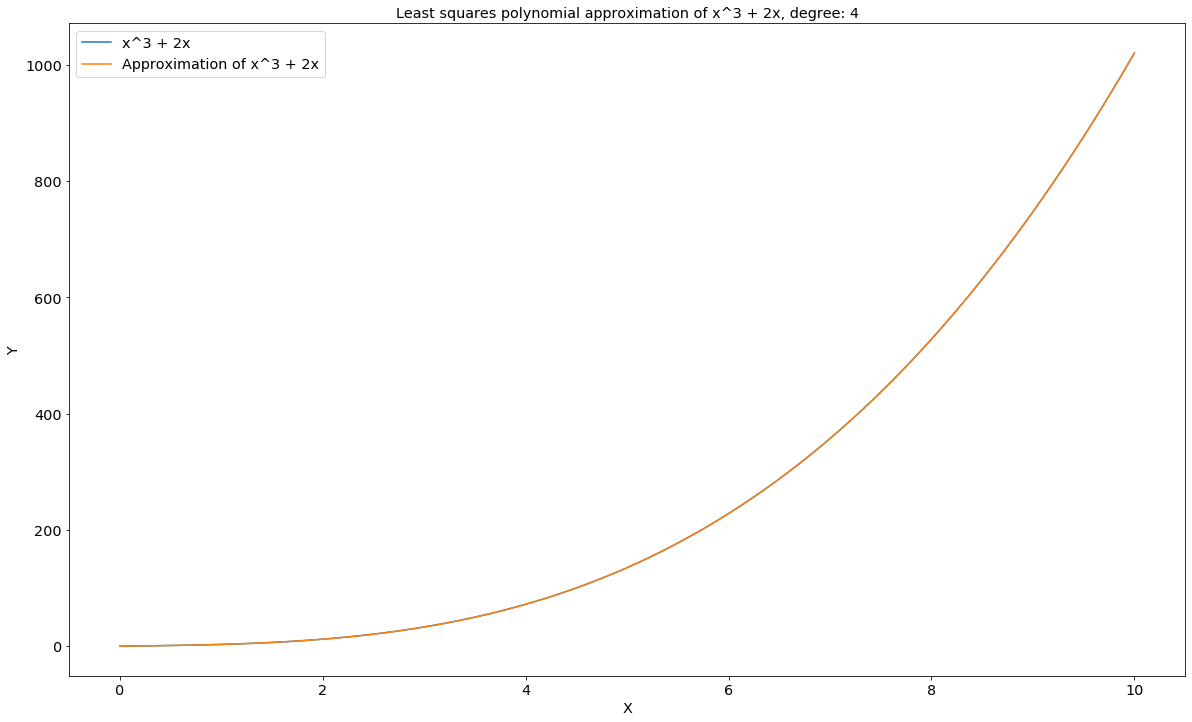

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000000 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000000 |
+-----------------------------+-----------------+ 



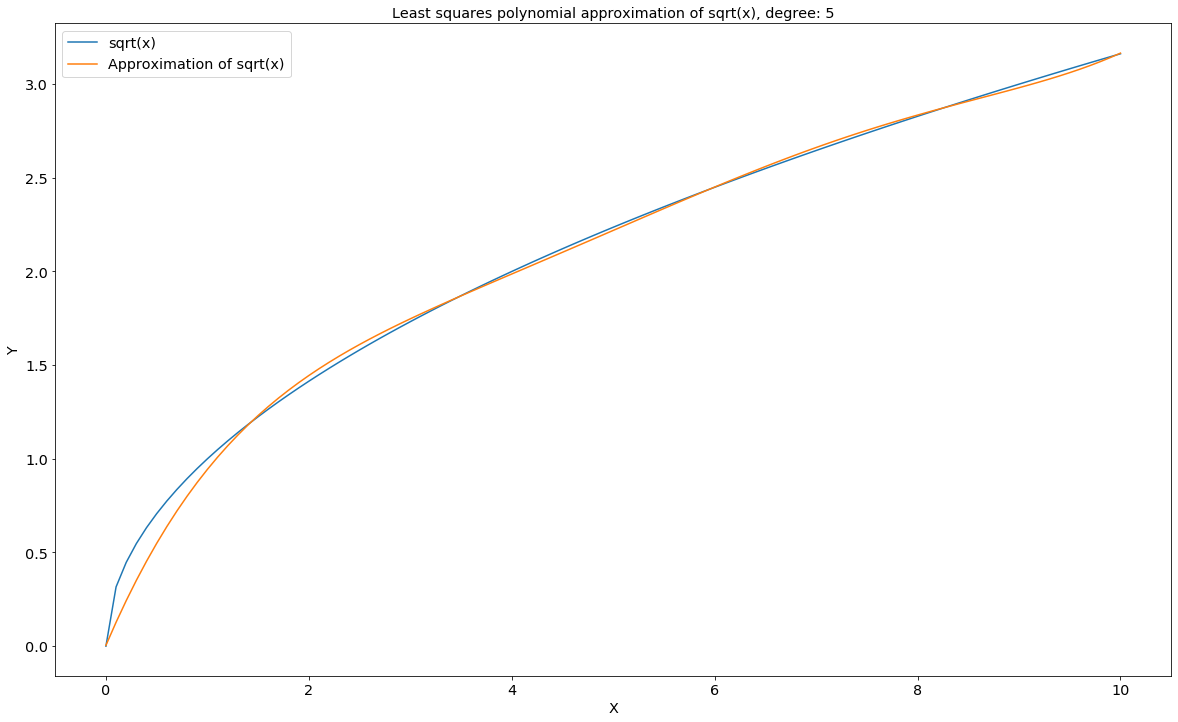

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    3.1116782807 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0267001070 |
+-----------------------------+-----------------+ 



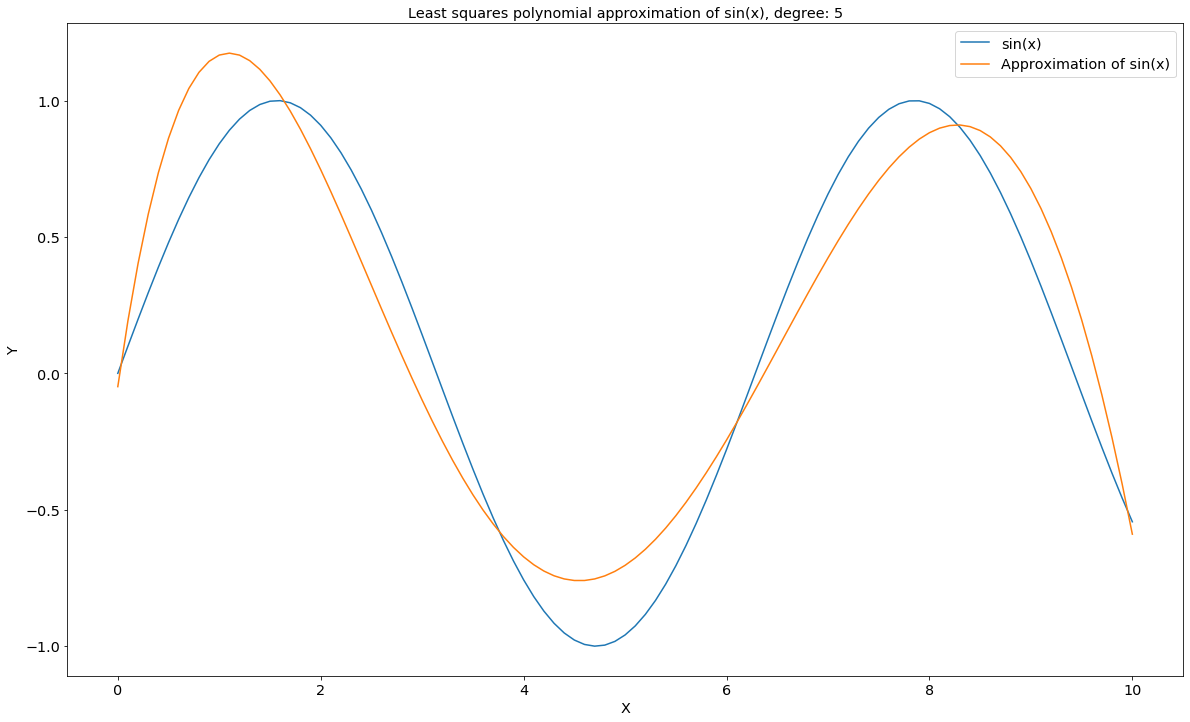

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   31.8282364453 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1834312536 |
+-----------------------------+-----------------+ 



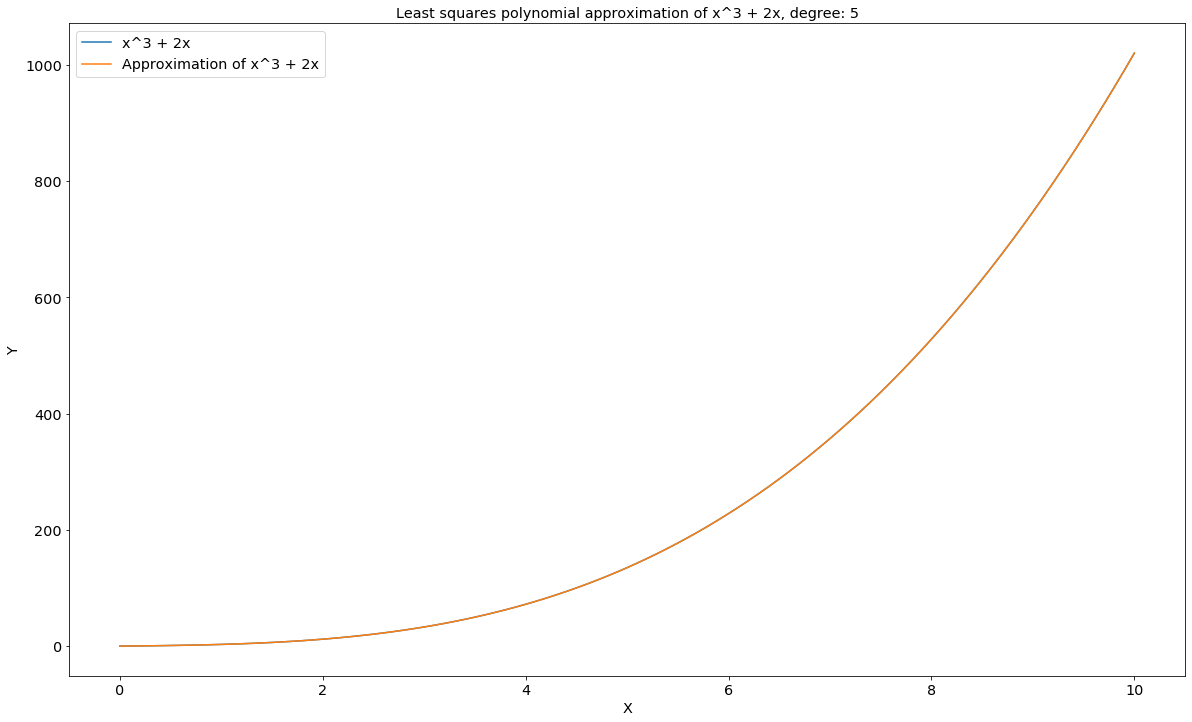

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000000 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000000 |
+-----------------------------+-----------------+ 



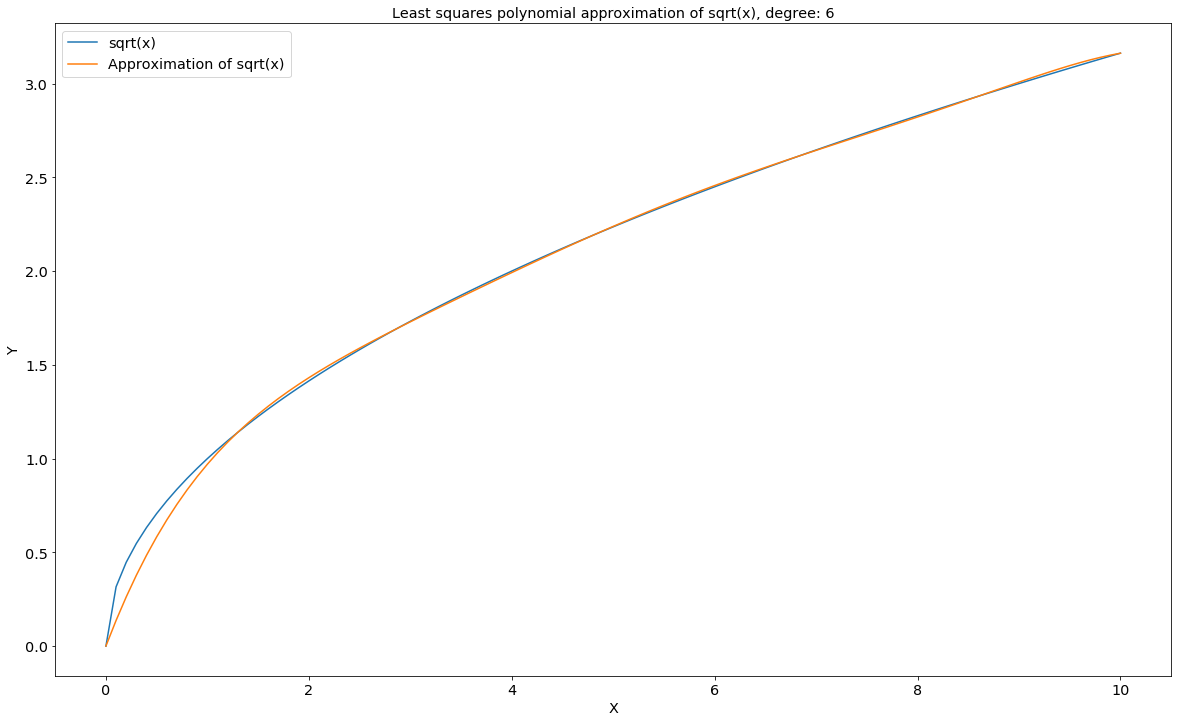

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    2.3596006169 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0170546921 |
+-----------------------------+-----------------+ 



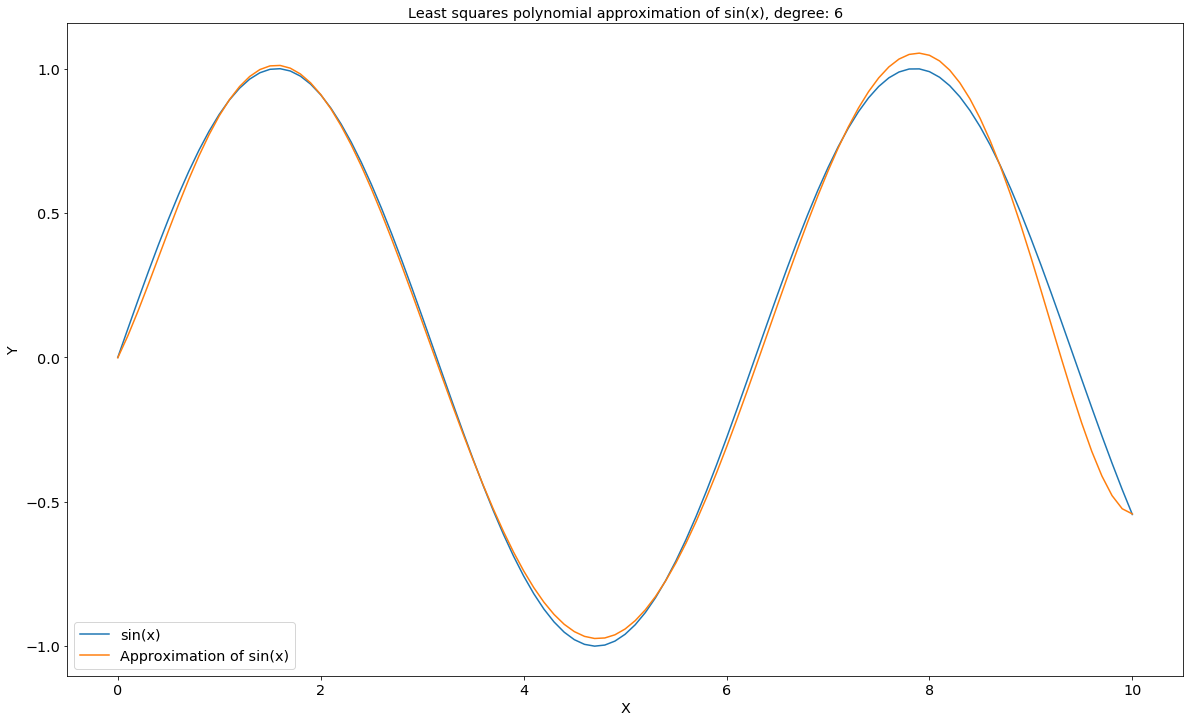

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    7.7006729420 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0304173202 |
+-----------------------------+-----------------+ 



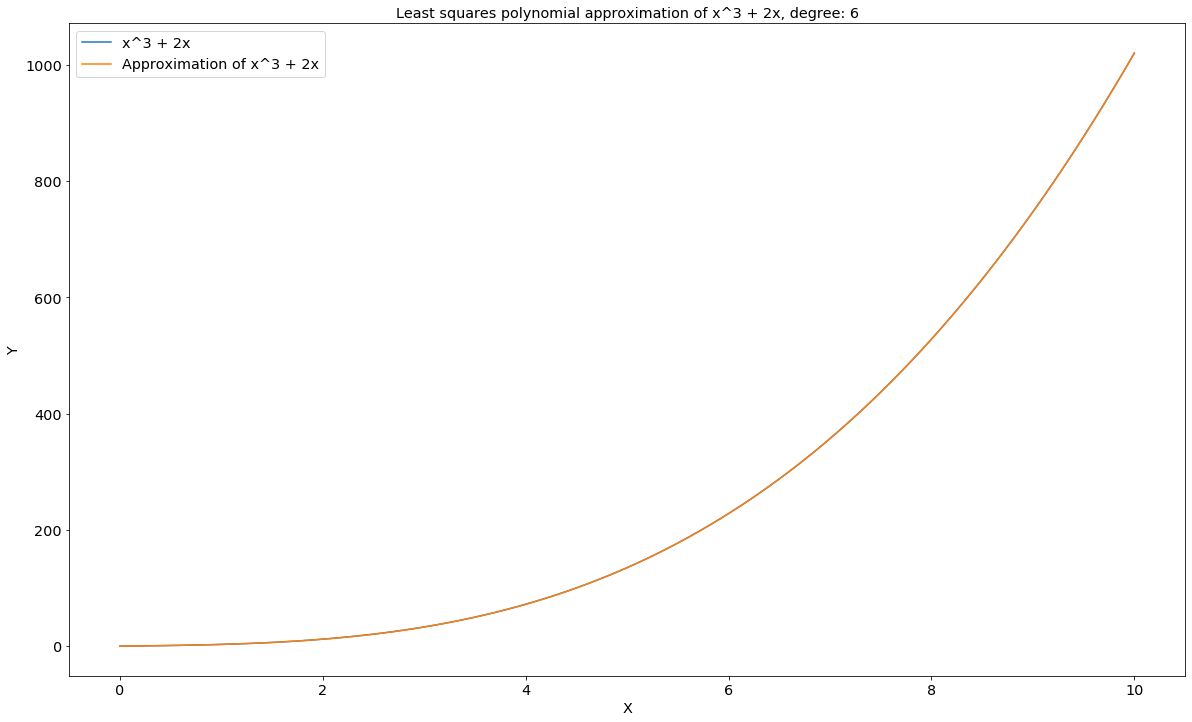

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000022 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000001 |
+-----------------------------+-----------------+ 



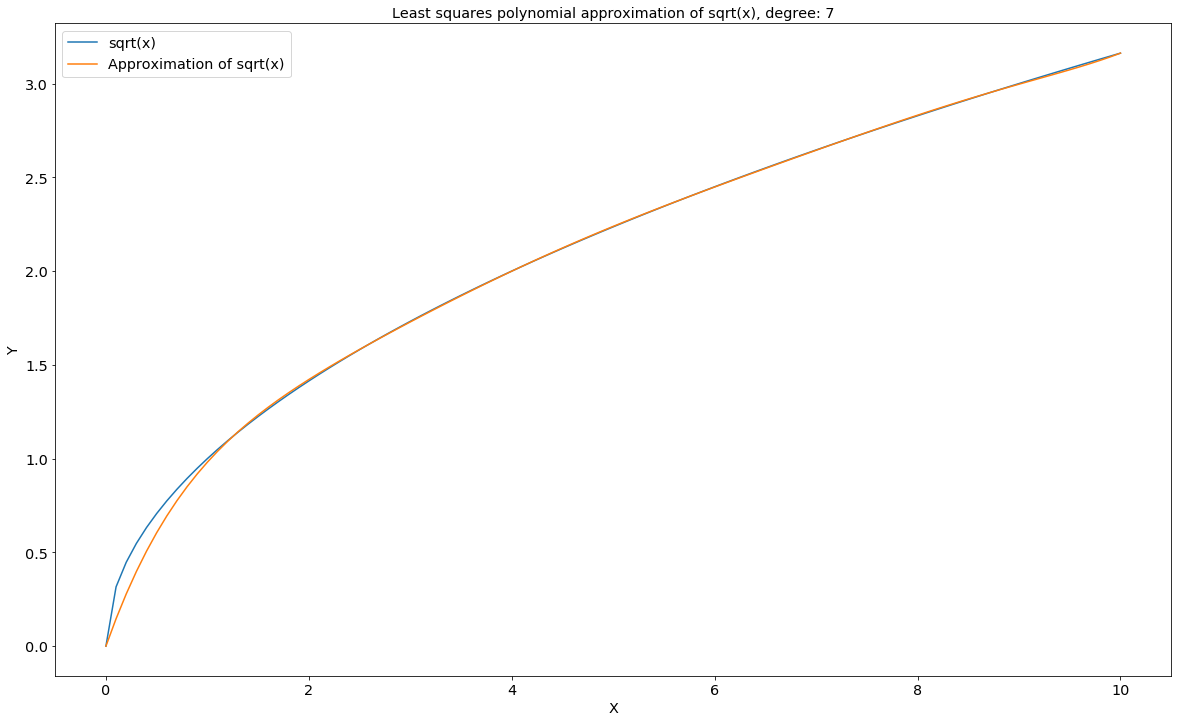

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    1.9318964396 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0120571717 |
+-----------------------------+-----------------+ 



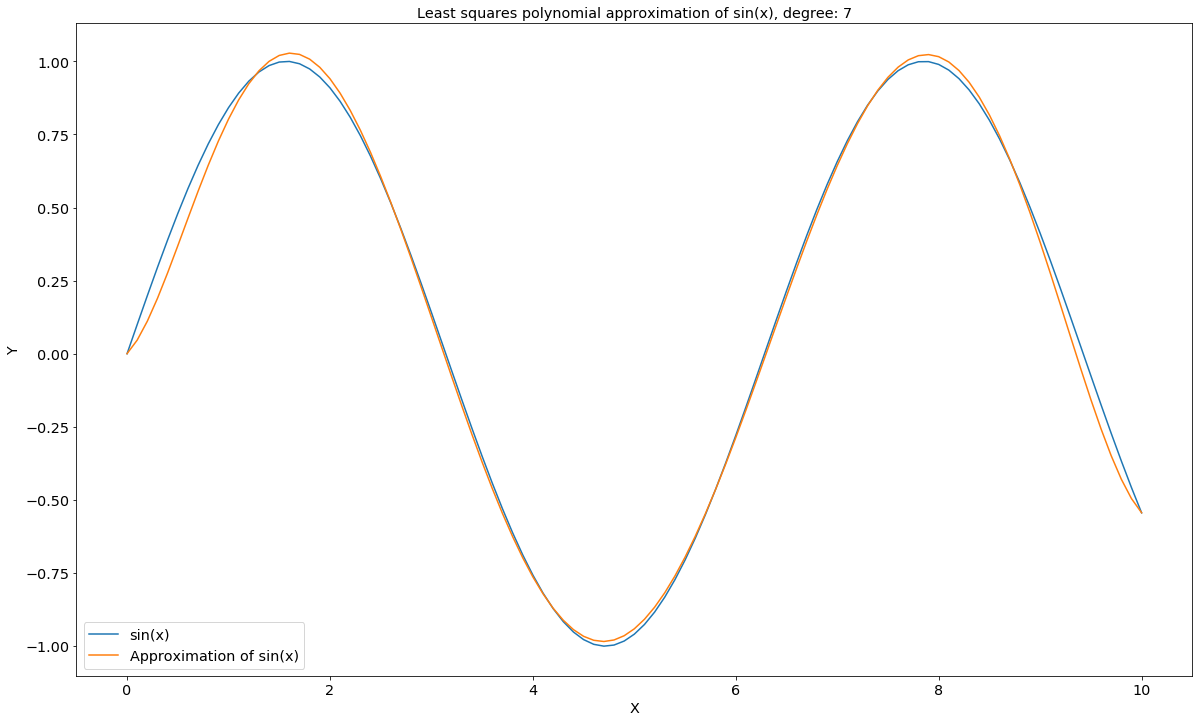

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    5.8125622611 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0260265459 |
+-----------------------------+-----------------+ 



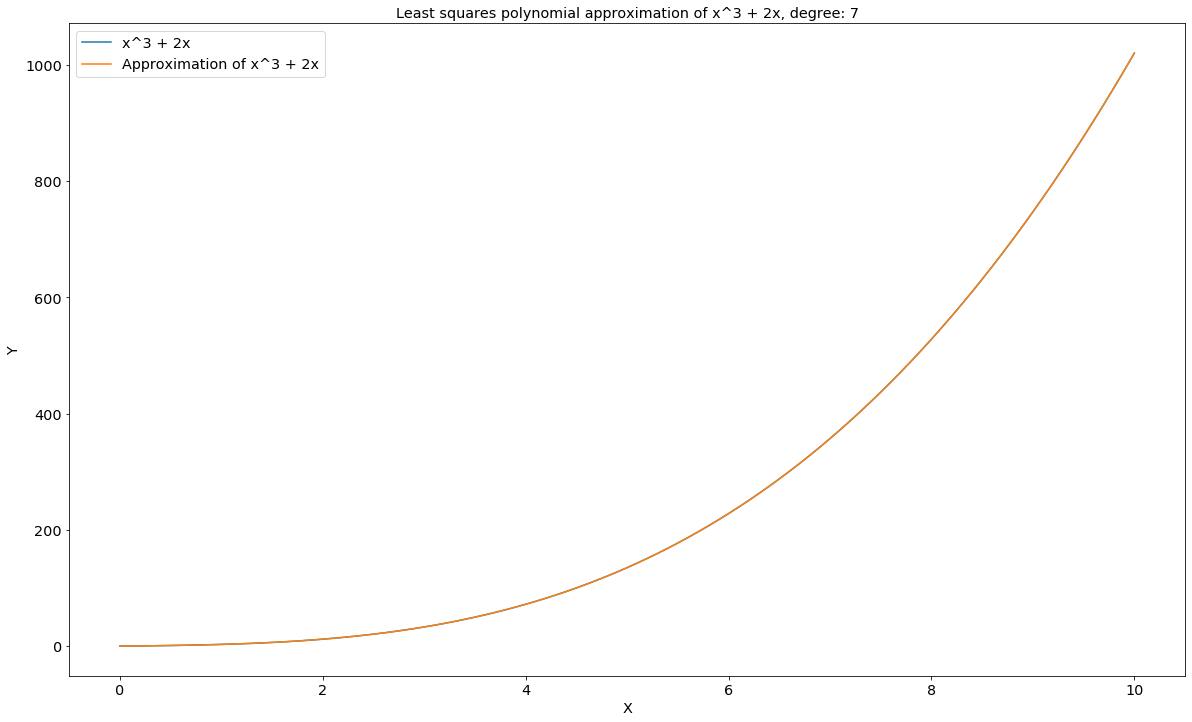

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    0.0000000021 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.0000000001 |
+-----------------------------+-----------------+ 



In [75]:
show_lspan(0, 10, 8, 7)

## Przypadki zachorowań na COVID-19 w Japonii

In [85]:
timeline = ['1/21/2020','1/22/2020','1/23/2020','1/24/2020','1/25/2020','1/26/2020','1/27/2020','1/28/2020','1/29/2020',
            '1/30/2020','1/31/2020','2/1/2020','2/2/2020','2/3/2020','2/4/2020','2/5/2020','2/6/2020','2/7/2020',
            '2/8/2020','2/9/2020','2/10/2020','2/11/2020','2/12/2020','2/13/2020','2/14/2020','2/15/2020','2/16/2020',
            '2/17/2020','2/18/2020','2/19/2020','2/20/2020','2/21/2020','2/22/2020','2/23/2020','2/24/2020','2/25/2020',
            '2/26/2020','2/27/2020','2/28/2020','2/29/2020','3/1/2020','3/2/2020','3/3/2020','3/4/2020','3/5/2020',
            '3/6/2020','3/7/2020','3/8/2020','3/9/2020','3/10/2020','3/11/2020','3/12/2020','3/13/2020','3/14/2020'
            ,'3/15/2020','3/16/2020','3/17/2020','3/18/2020','3/19/2020','3/20/2020','3/21/2020','3/22/2020',
            '3/23/2020','3/24/2020','3/25/2020','3/26/2020','3/27/2020','3/28/2020','3/29/2020','3/30/2020','3/31/2020',
            '4/1/2020','4/2/2020','4/3/2020']

cases = [1,1,1,1,3,3,4,6,7,11,14,17,20,20,20,33,25,25,25,26,26,26,28,29,33,41,53,59,65,73,85,93,105,132,144,157,164,
         186,210,230,239,254,268,284,317,349,408,455,488,514,568,620,675,716,780,814,829,829,873,950,996,1046,1089,
         1128,1193,1291,1387,1499,1693,1866,1953,2178,2384,2617]

def calculate2(p, n):
  values = []
  for i in n:
    values.append(calculate(p, i))
  return values


def covid_approx(timeline, cases, degree):
    for i in range(1, degree + 1):
        cases_polynomial = lspa(np.linspace(1, len(cases), len(cases)), cases, i)
        cases_values = calculate2(cases_polynomial, np.linspace(1, len(cases), len(cases)))

        params = {'legend.fontsize': 'x-large',
                  'figure.figsize': (20, 12),
                  'axes.labelsize': 'x-large',
                  'axes.titlesize': 'x-large',
                  'xtick.labelsize': 'x-large',
                  'ytick.labelsize': 'x-large'}
        plt.rcParams.update(params)
        plt.title(f'Approximation of degree {i}')
        plt.plot(timeline, cases_values, label="Approximation")
        plt.plot(timeline, cases, 'ro', label="Number of cases")
        plt.grid(True, which='both')
        plt.xlabel('Timeline')
        plt.ylabel('Cases')
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

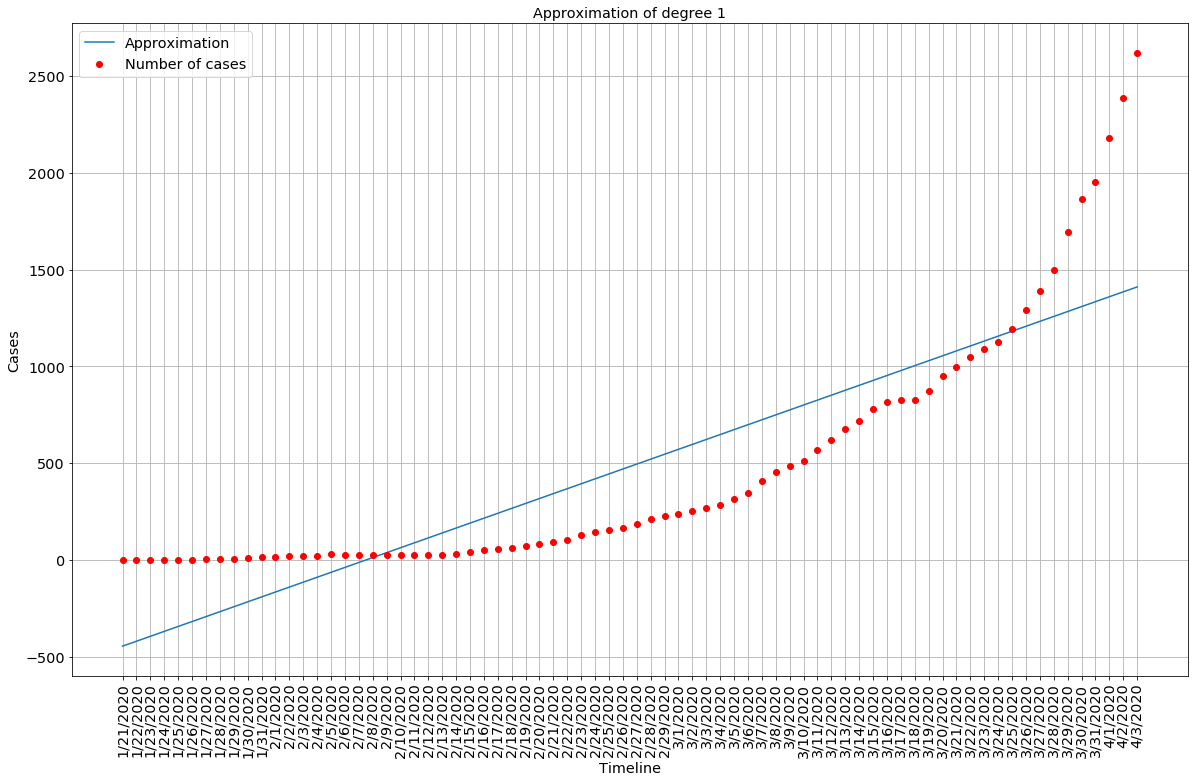

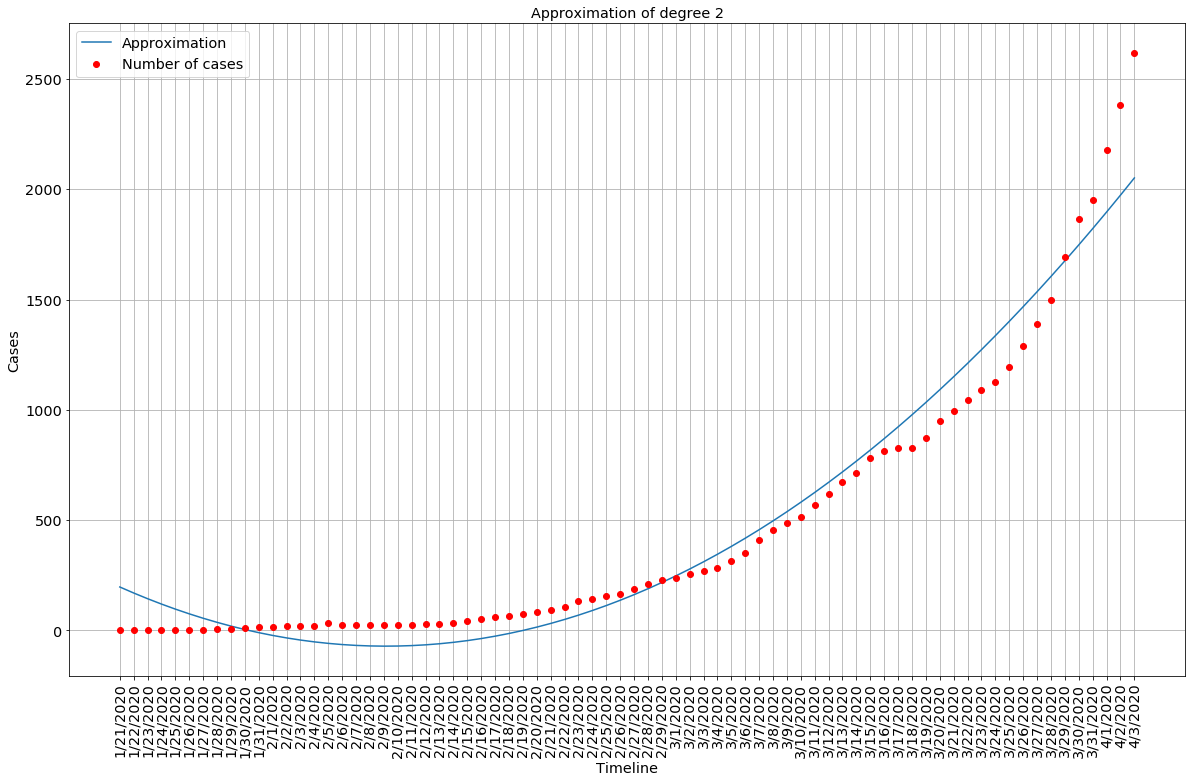

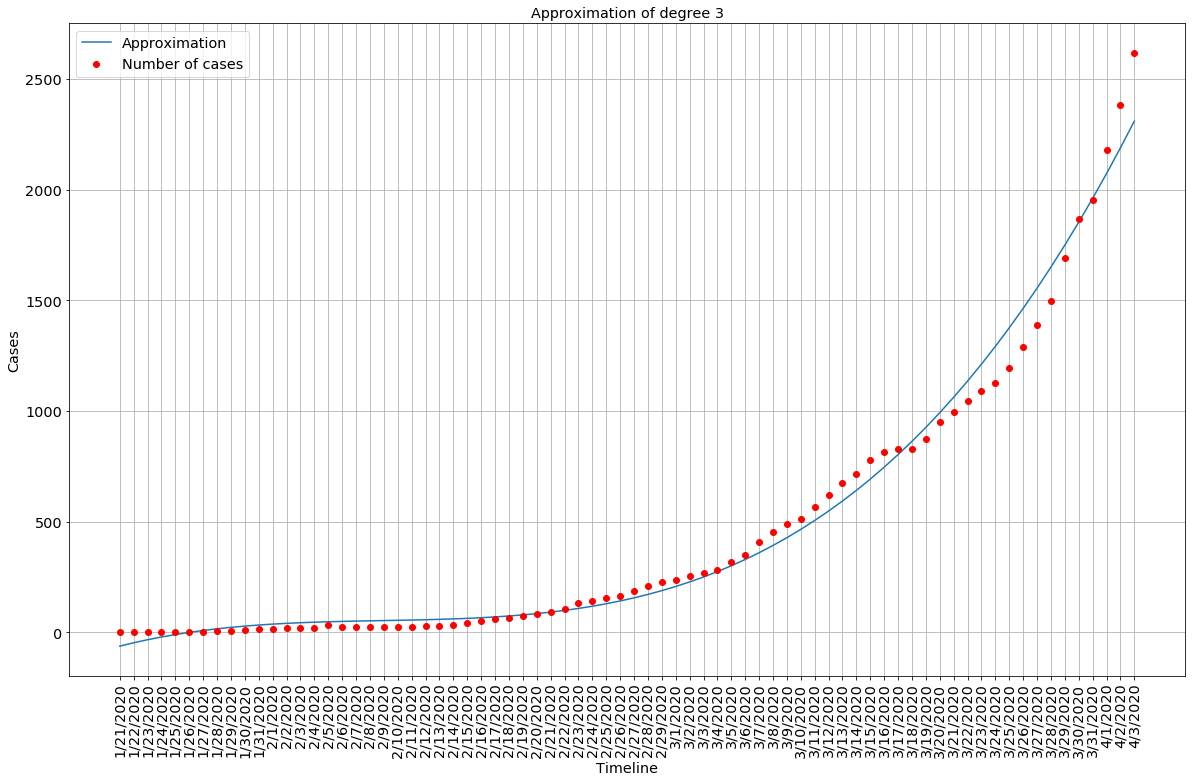

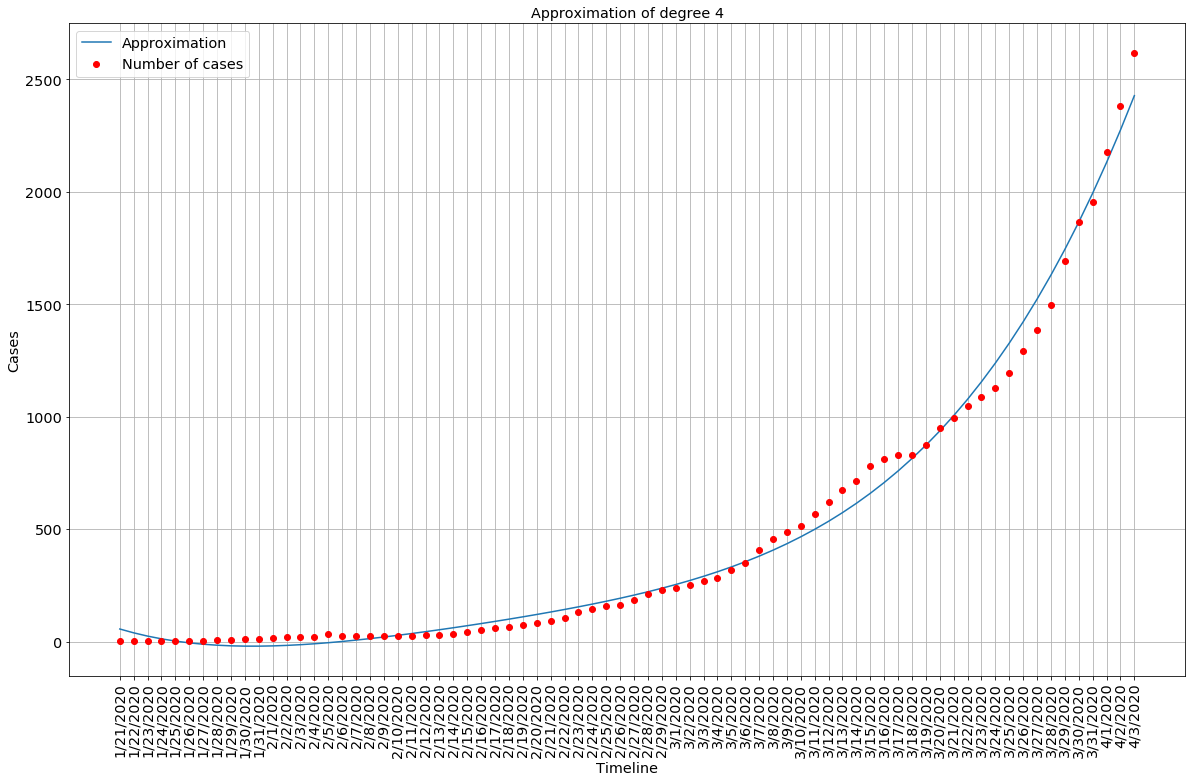

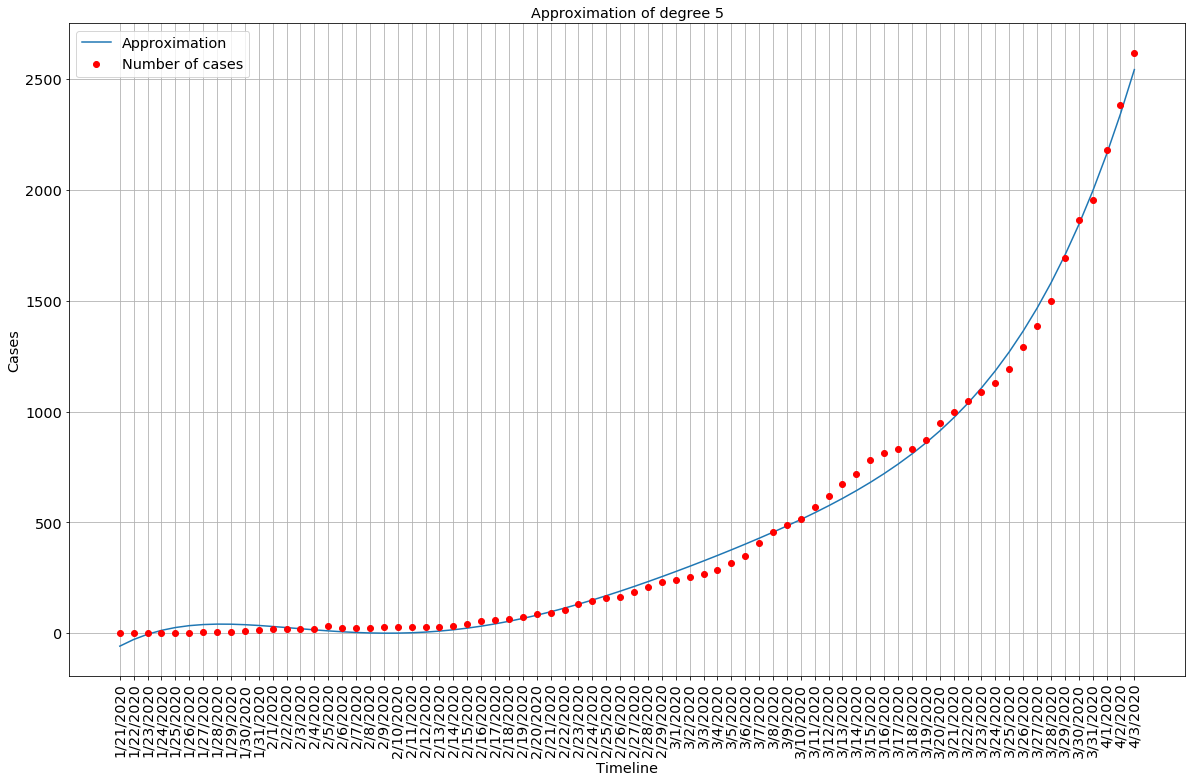

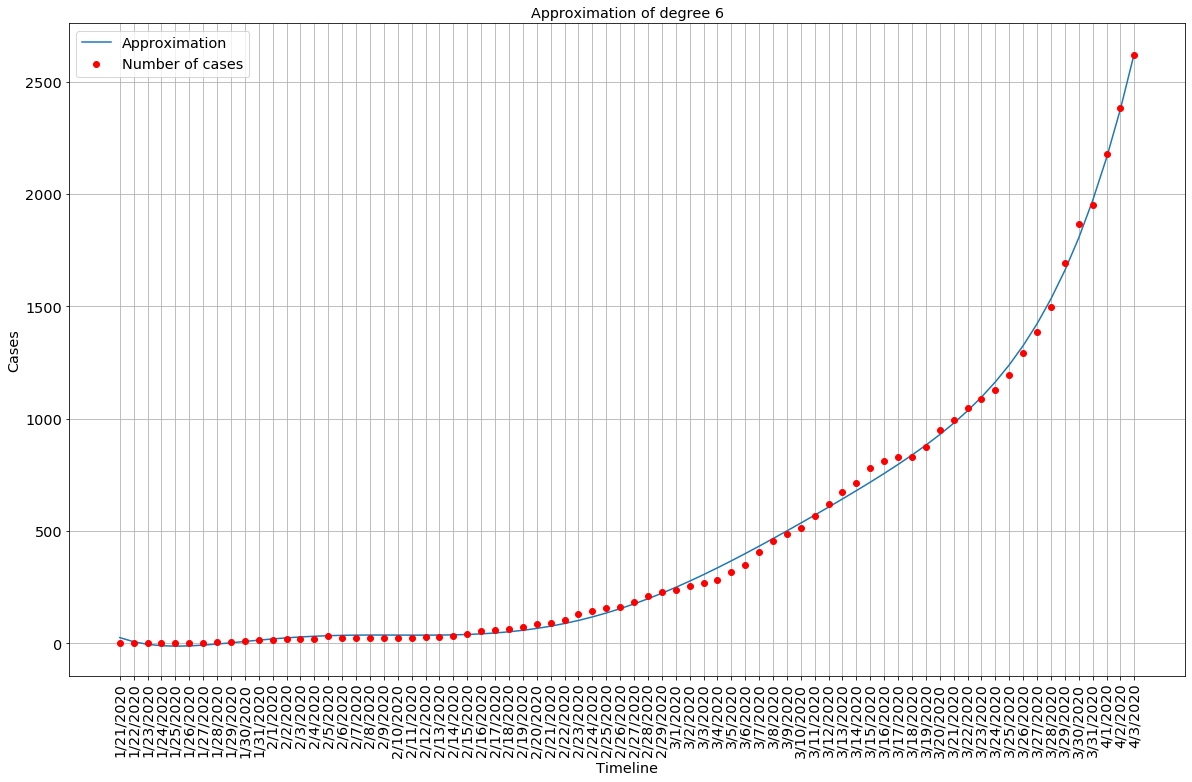

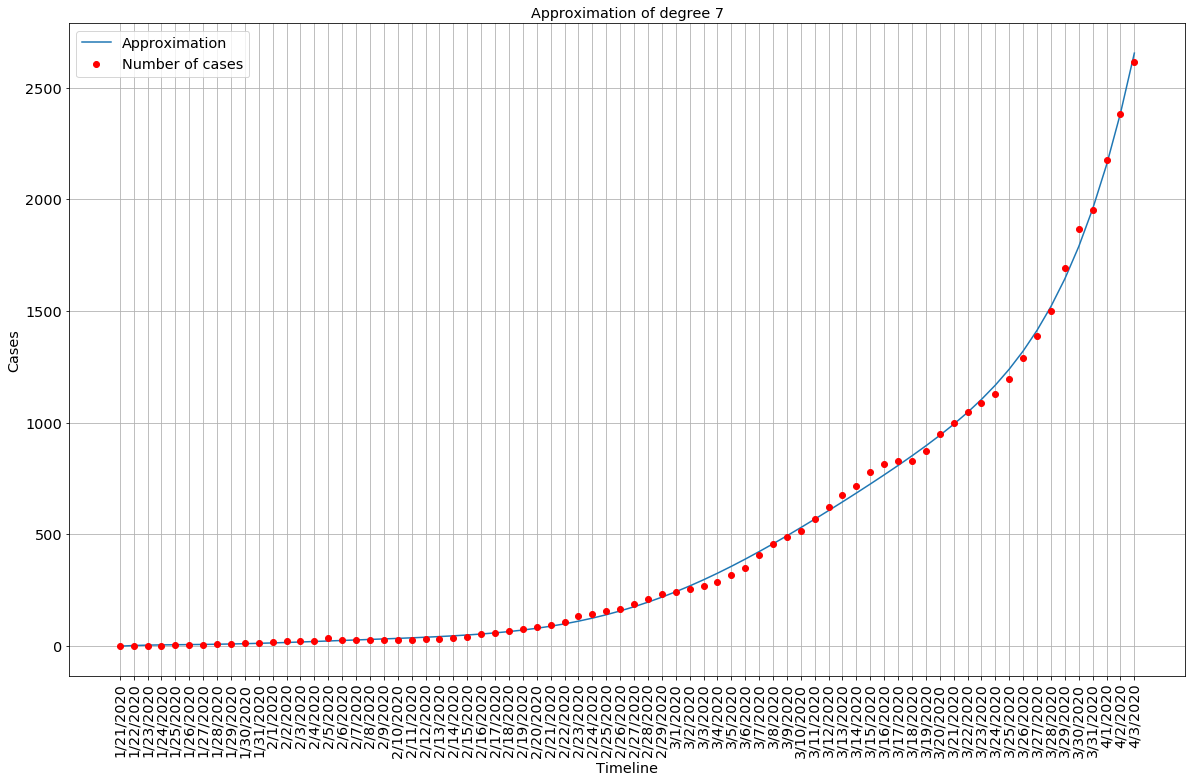

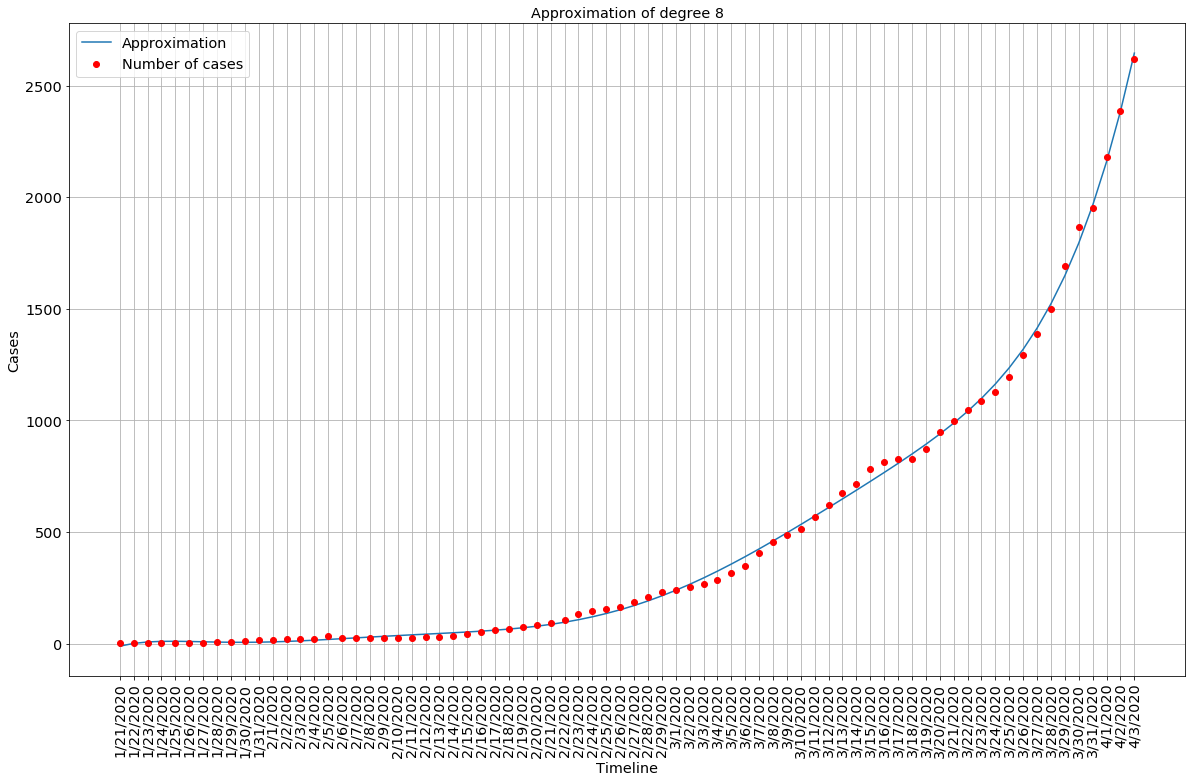

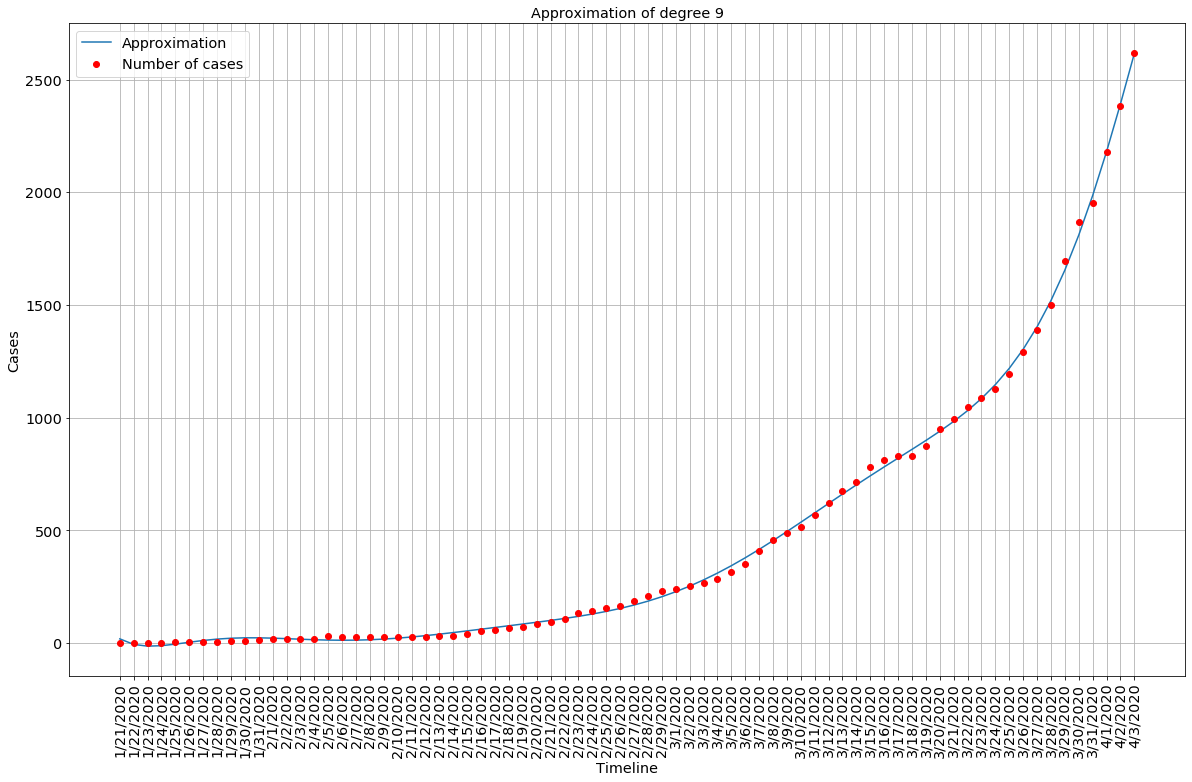

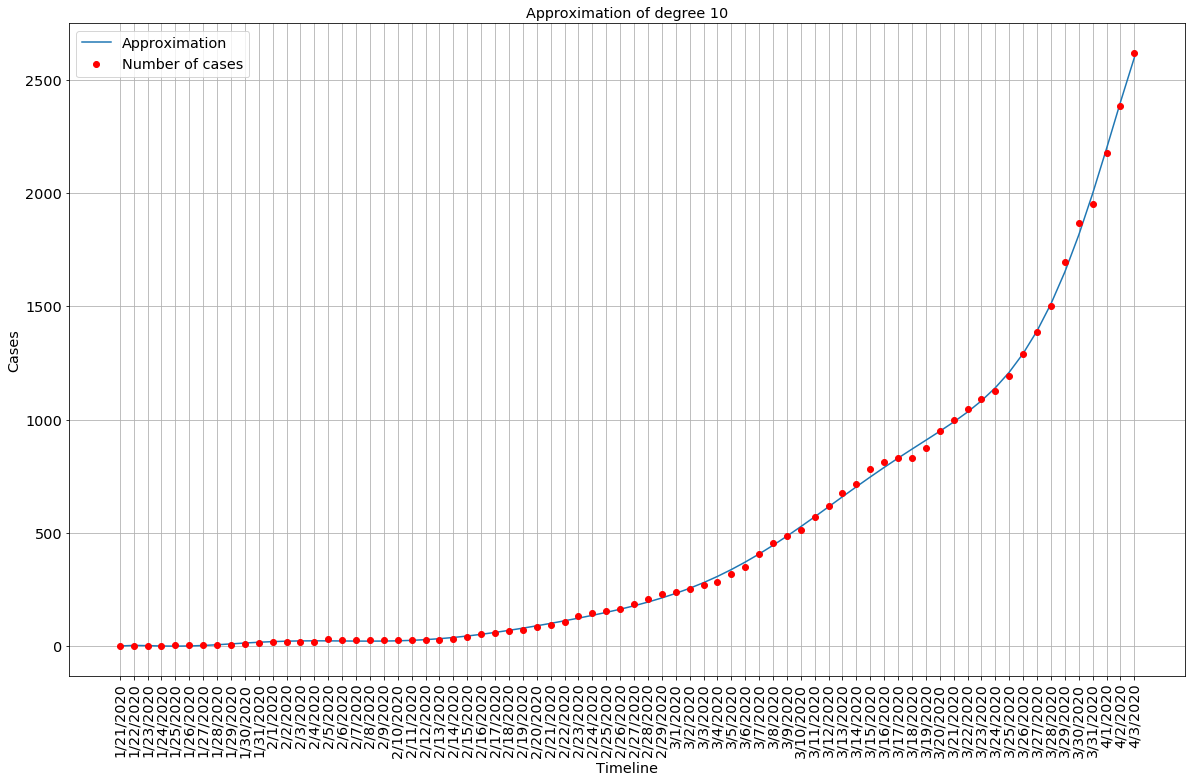

In [86]:
covid_approx(timeline, cases, 10)

## Wnioski

Na podstawie pozwyższych obliczeń (wykresów) widać, że im większy stopień wielomianu aproksymującego, tym mniejszy jest błąd a co za tym idzie - dokładniejsze przybliżenie. Należy jednak pamiętać, że stopień powienien być znacznie mniejszy od liczby węzłów, aby „wygładzić” ewentualne błędy pomiarowe. 
Podstawowym kryterium, którym kierujemy się przy wyborze wystarczającego stopnia wielomianu aproksymującego jest szacowanie "na oko" - należy przyjrzeć się rozmieszczeniu punktów i już na tej podstawie można określić wystarczający stopień. Przykładowo dla funkcji f(x) = x^3+2x stopień 3 jest wystarczający.

# Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 

In [78]:
def to_chart2(min, max, number_of_points, fun1, fun2, fun_name, degree):
    x_axis = []
    f1_values = []
    step = (max - min) / number_of_points
    
    for x in np.arange(min, max+step, step):
        x_axis.append(x)
        f1_values.append(fun1(x))

    f2_values = np.polyval(fun2[0], x_axis)

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="Approximation of " + fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Least squares polynomial approximation of " + fun_name + ", degree: " + str(degree))
    plt.legend()
    plt.show()


def python_approx(min, max, number_of_points, n):
    sqrt_x_arr, sqrt_y_arr, _ = to_table(min, max, number_of_points, math.sqrt, "sqrt(x)")
    sin_x_arr, sin_y_arr, _ = to_table(min, max, number_of_points, math.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    f_x_arr, f_y_arr, _ = to_table(min, max, number_of_points, f, "x^3 + 2x")

    for i in range(1, n + 1):

        sqrt_approx = np.polyfit(sqrt_x_arr, sqrt_y_arr, deg=i, full=True)
        to_chart2(0, 10, 100, math.sqrt, sqrt_approx, "sqrt(x)", i)

        sin_approx = np.polyfit(sin_x_arr, sin_y_arr, deg=i, full=True)
        to_chart2(0, 10, 100, math.sin, sin_approx, "sin(x)", i)

        f_approx = np.polyfit(f_x_arr, f_y_arr, deg=i, full=True)
        to_chart2(0, 10, 100, f, f_approx, "x^3 + 2x", i)

## 3 Węzły

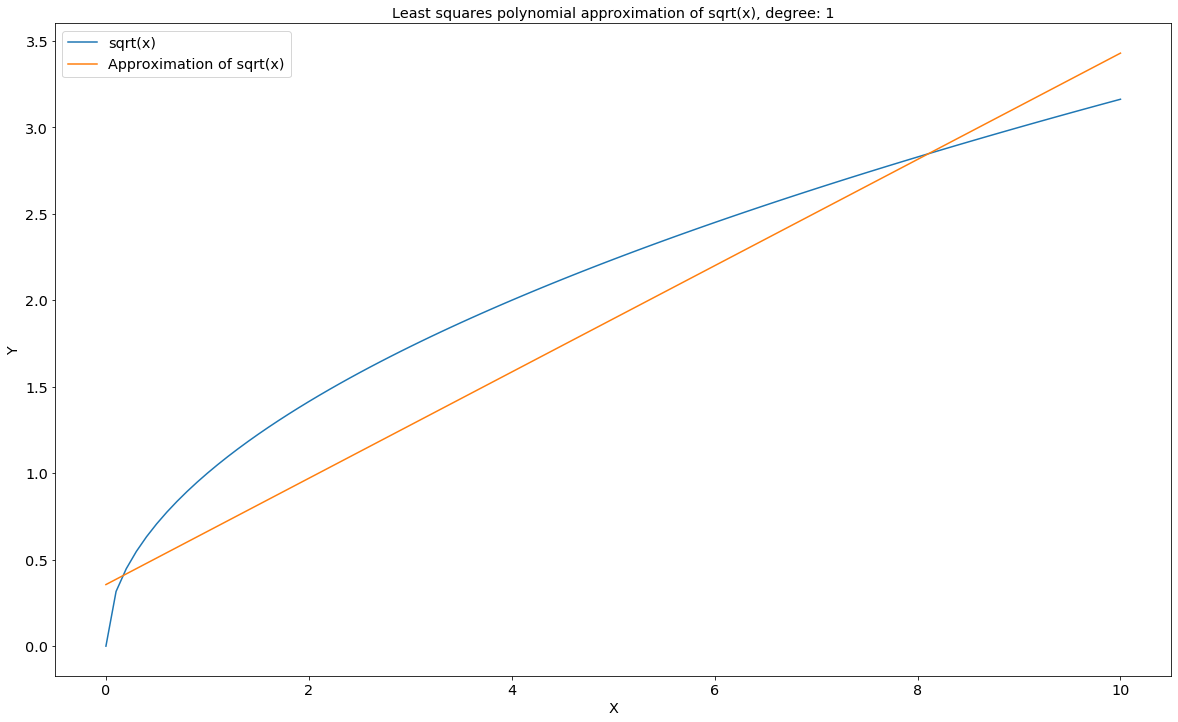

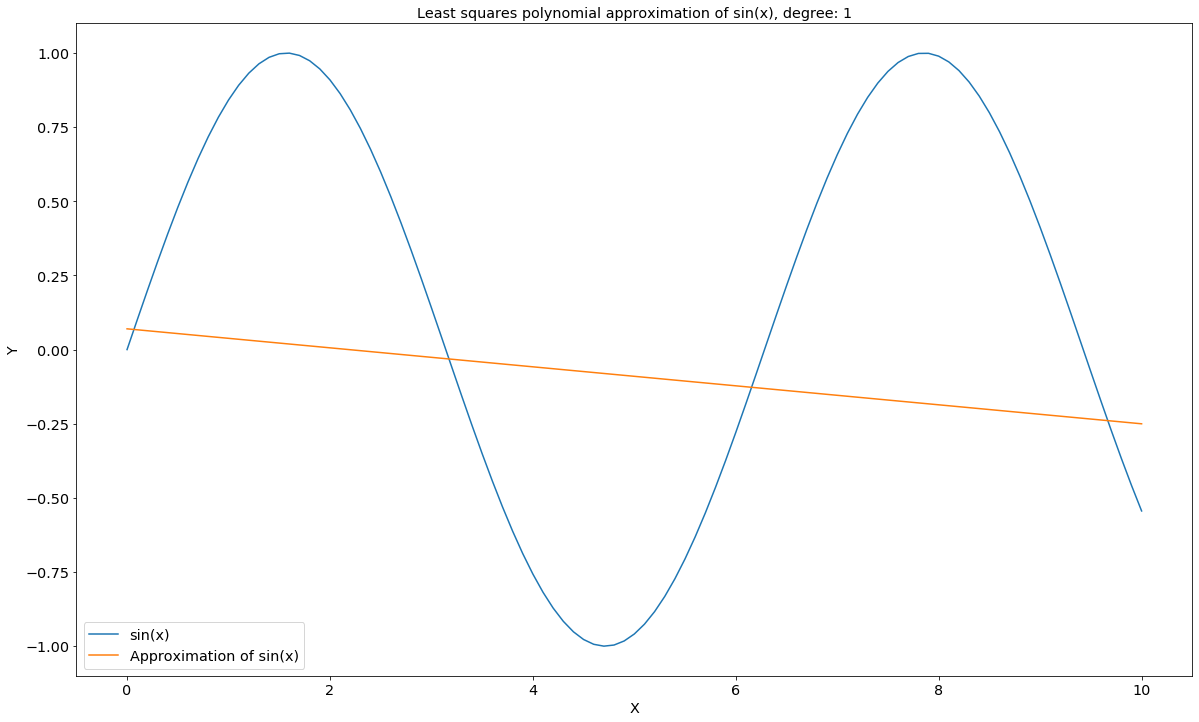

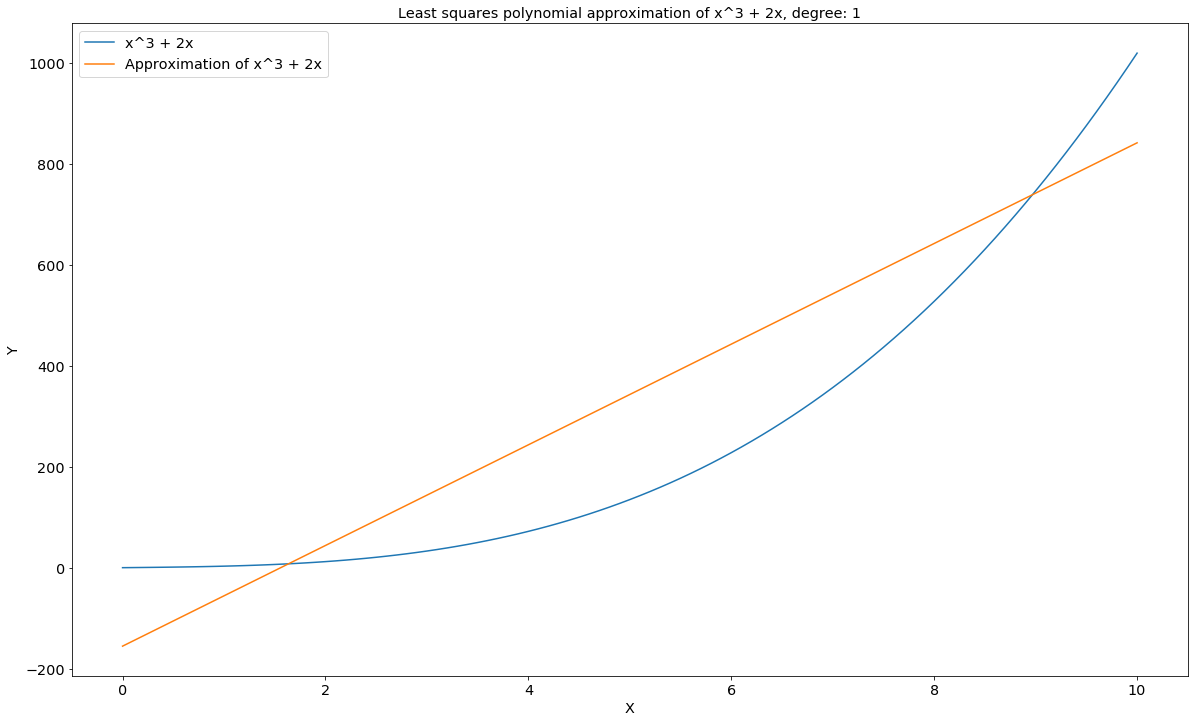

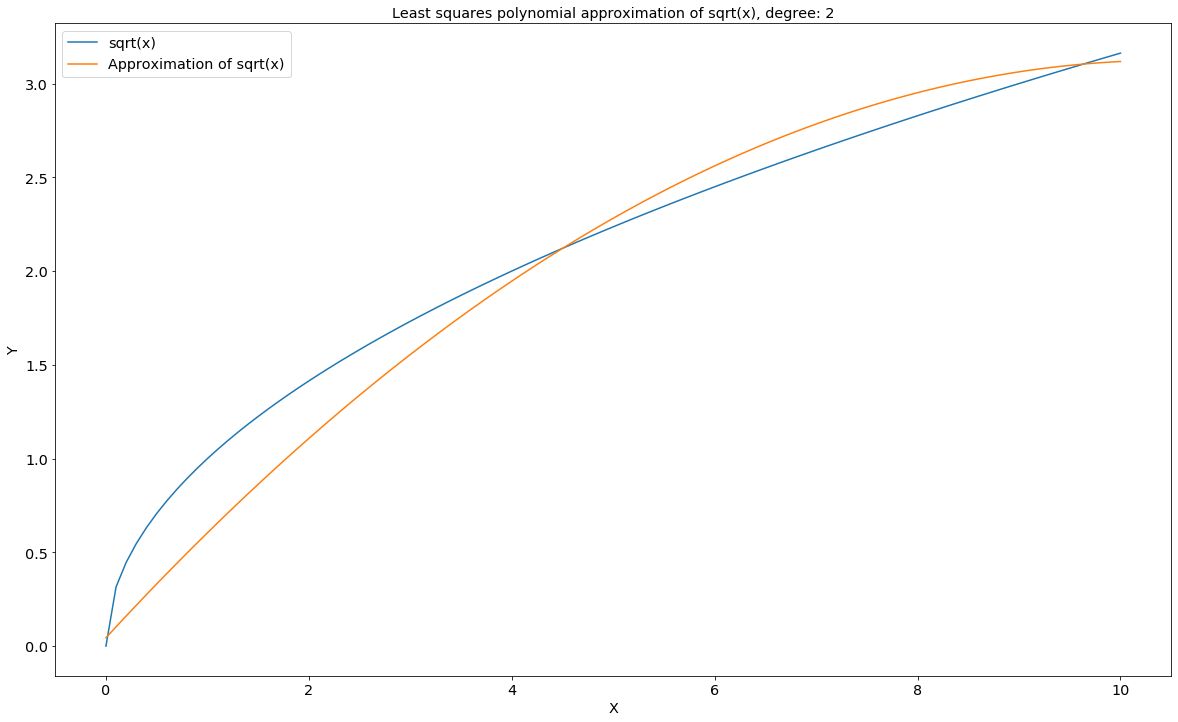

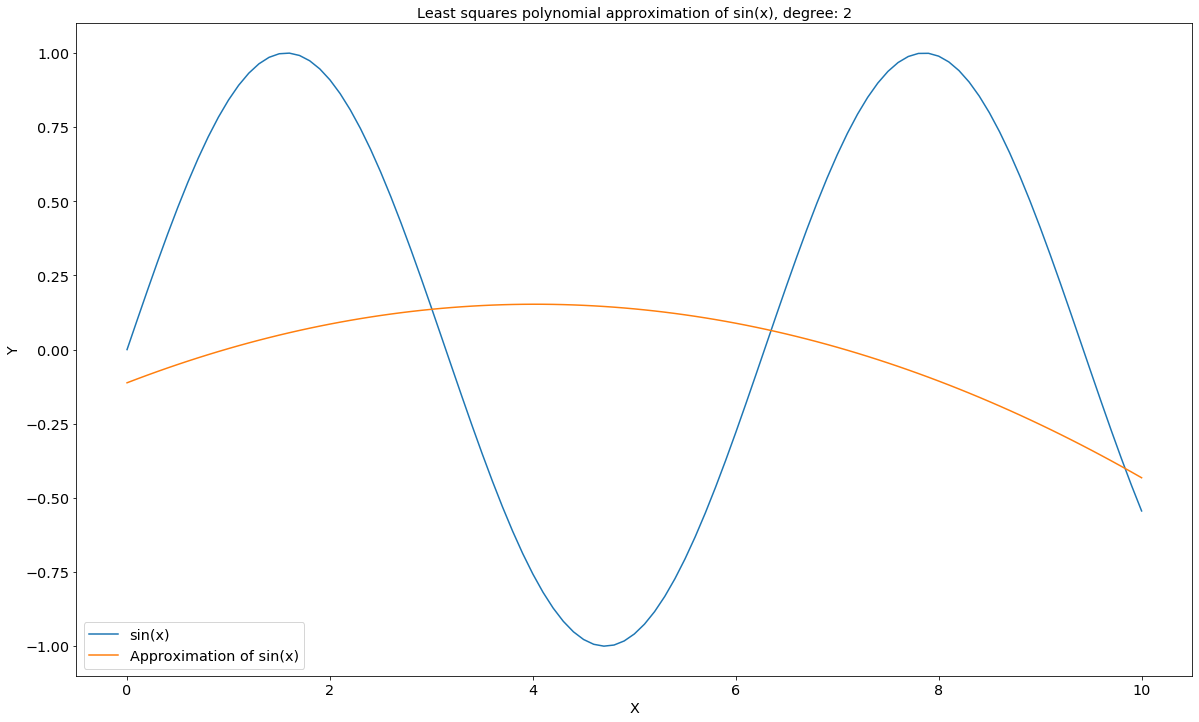

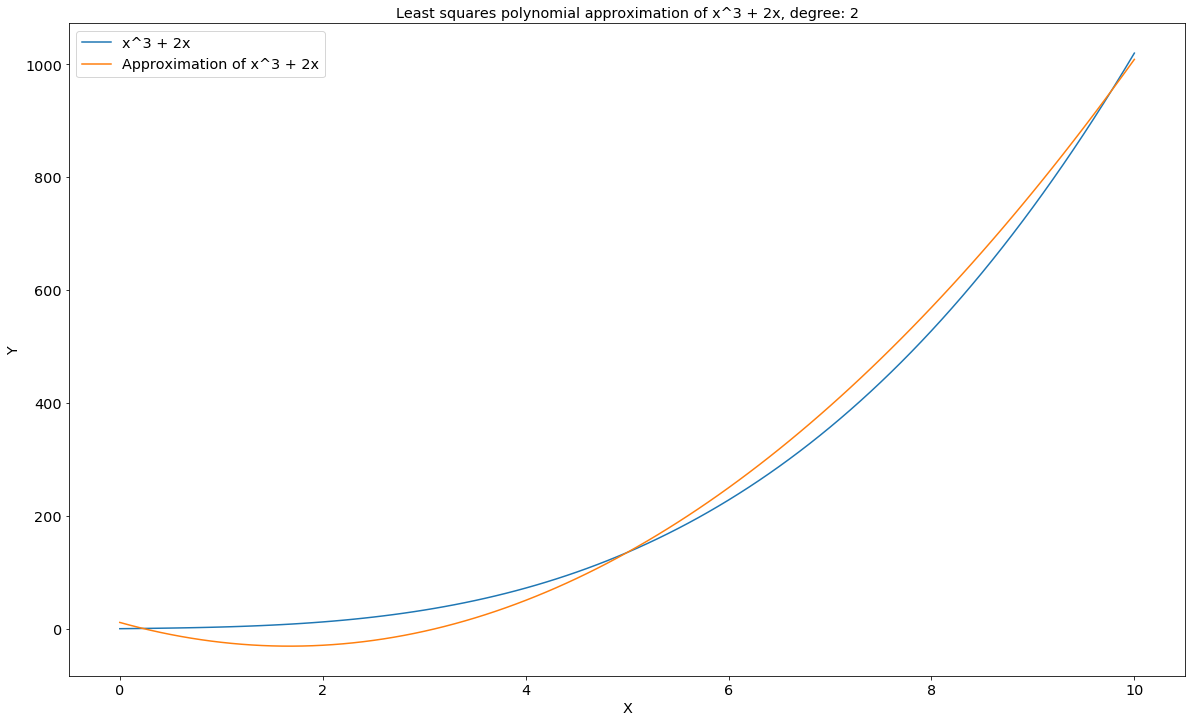

In [79]:
python_approx(0, 10, 3, 2)

## 4 Węzły

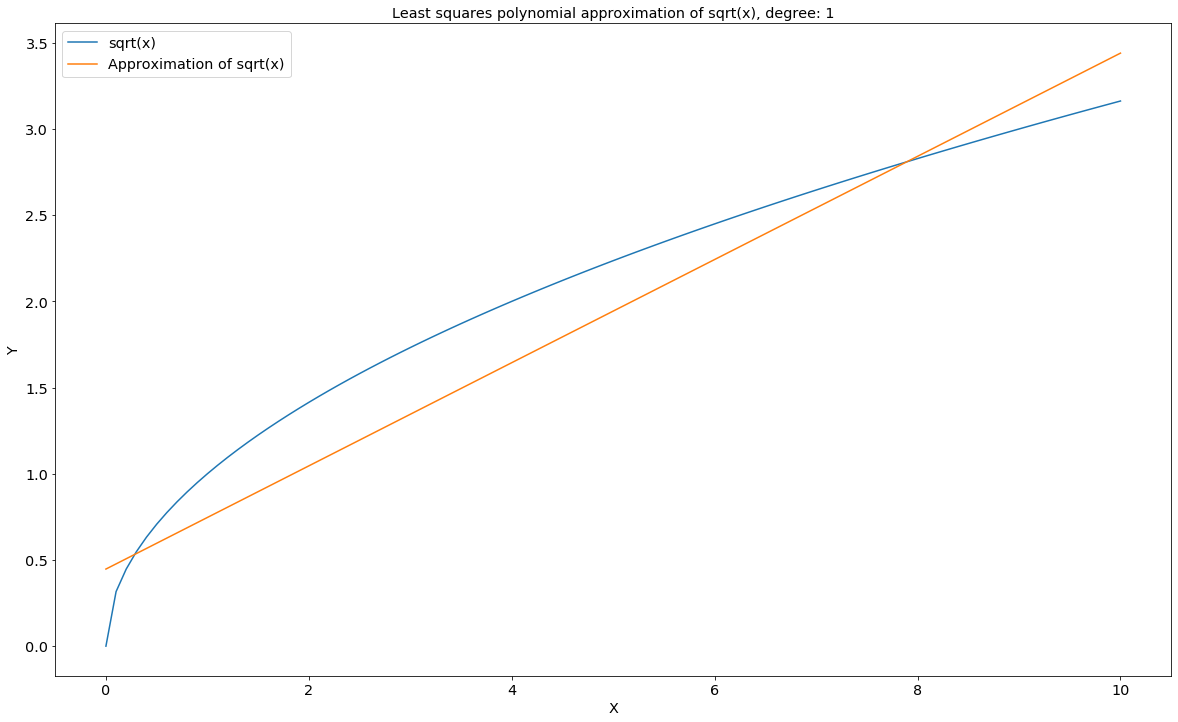

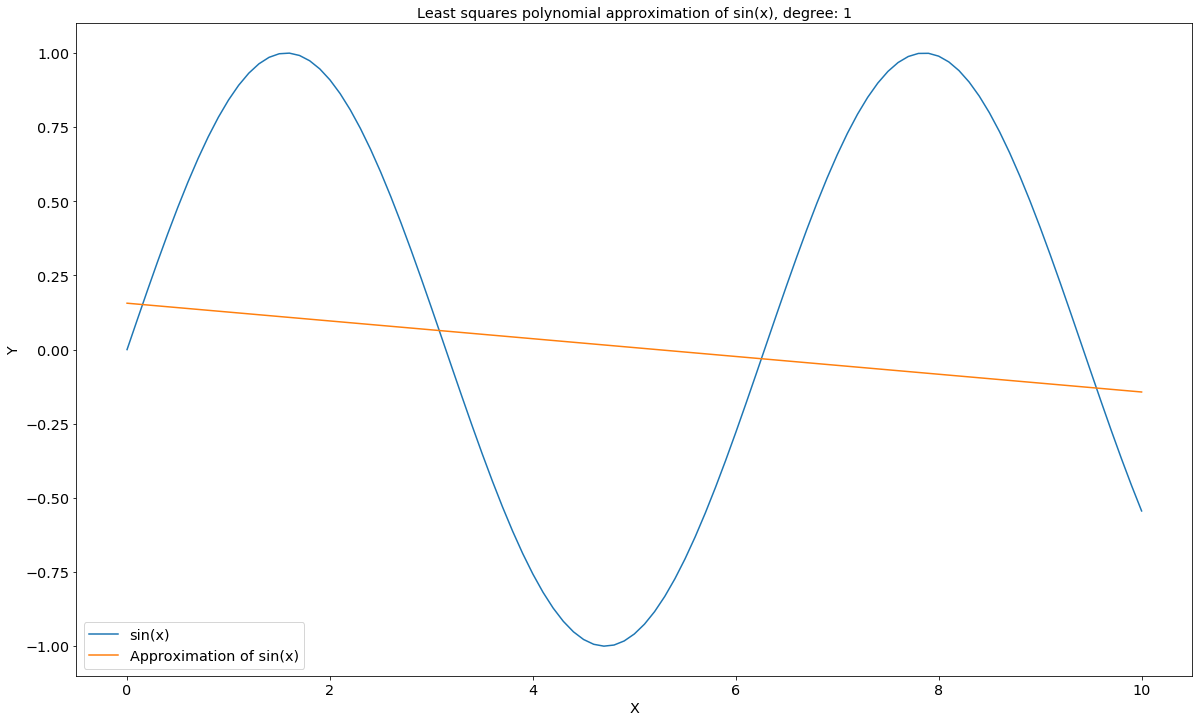

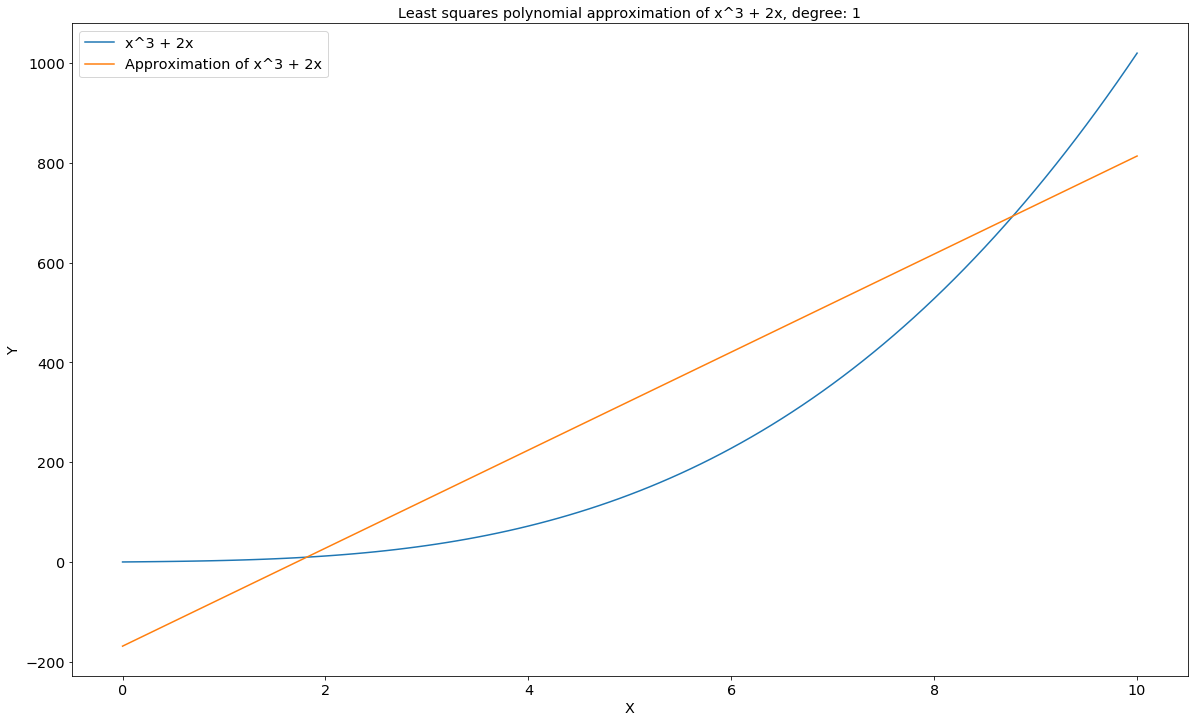

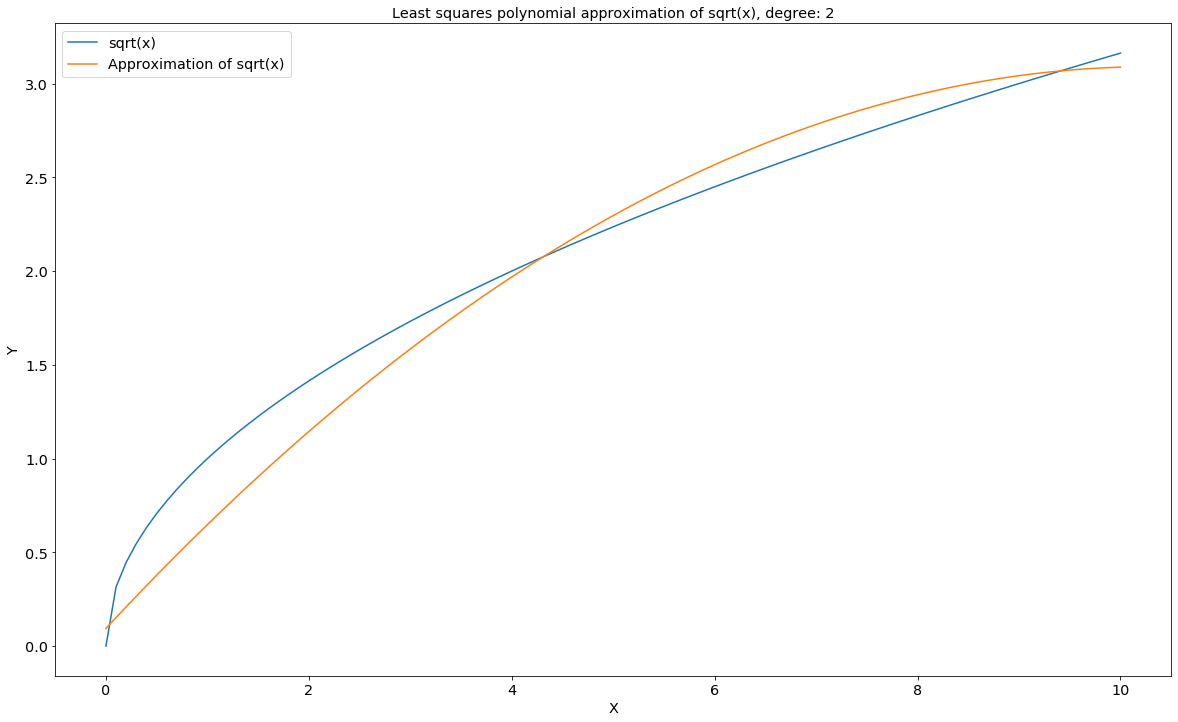

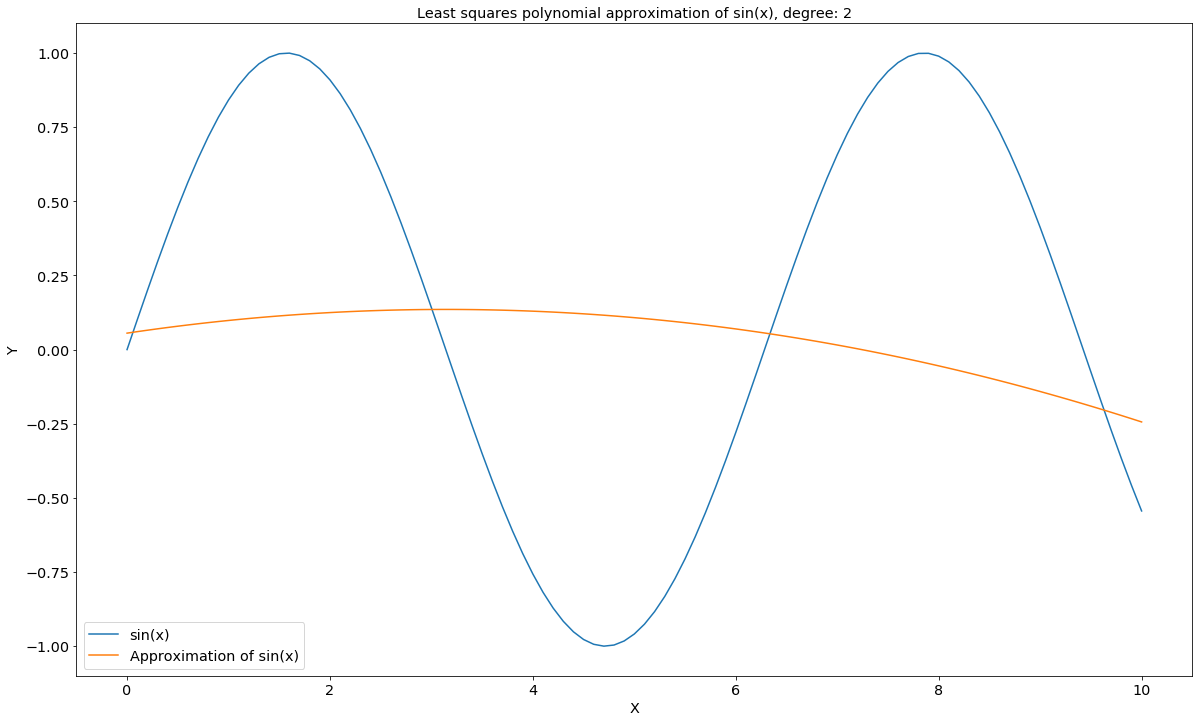

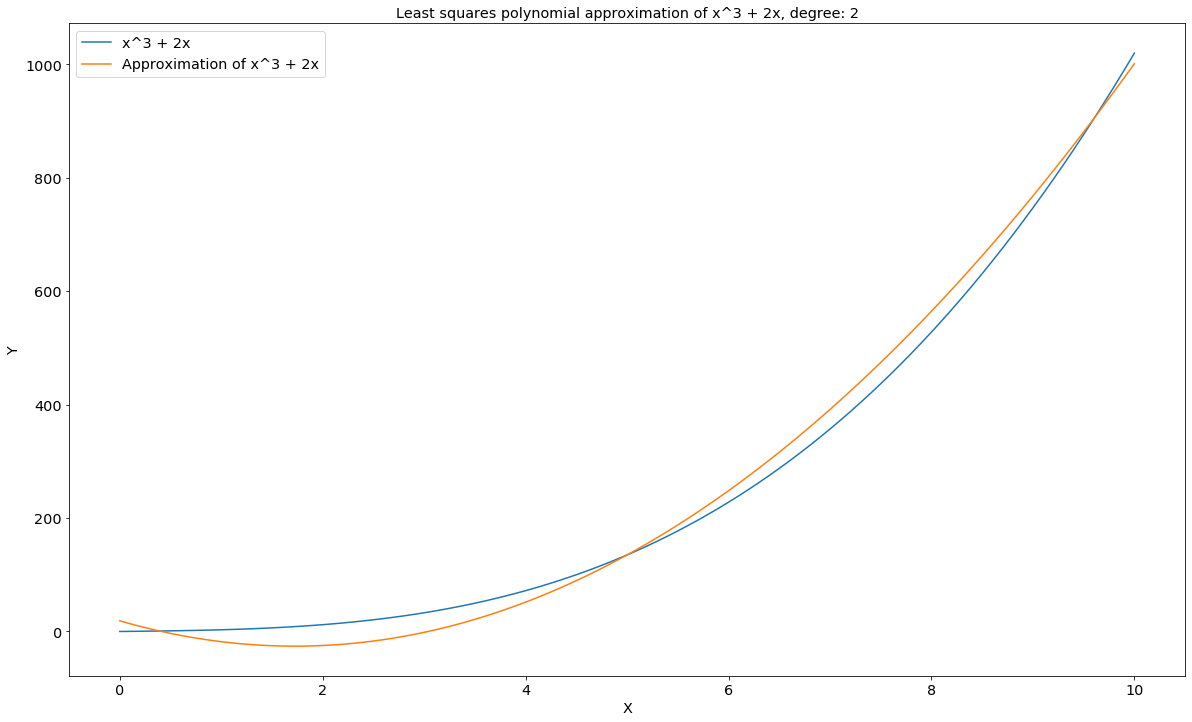

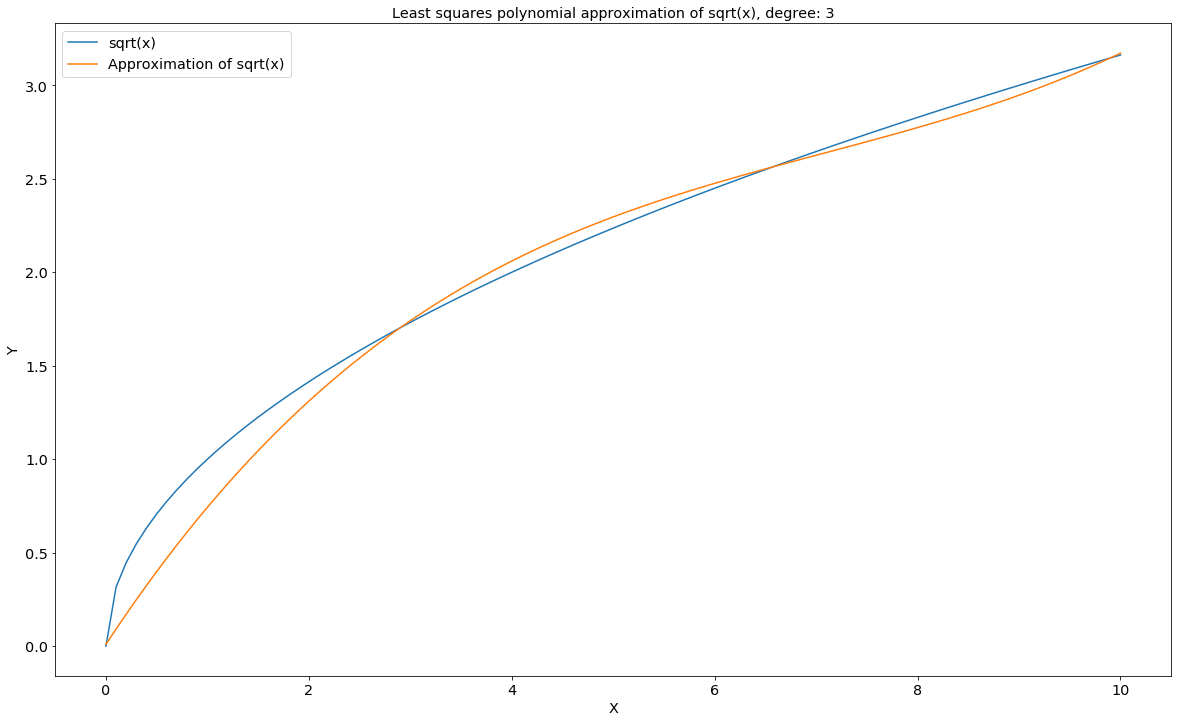

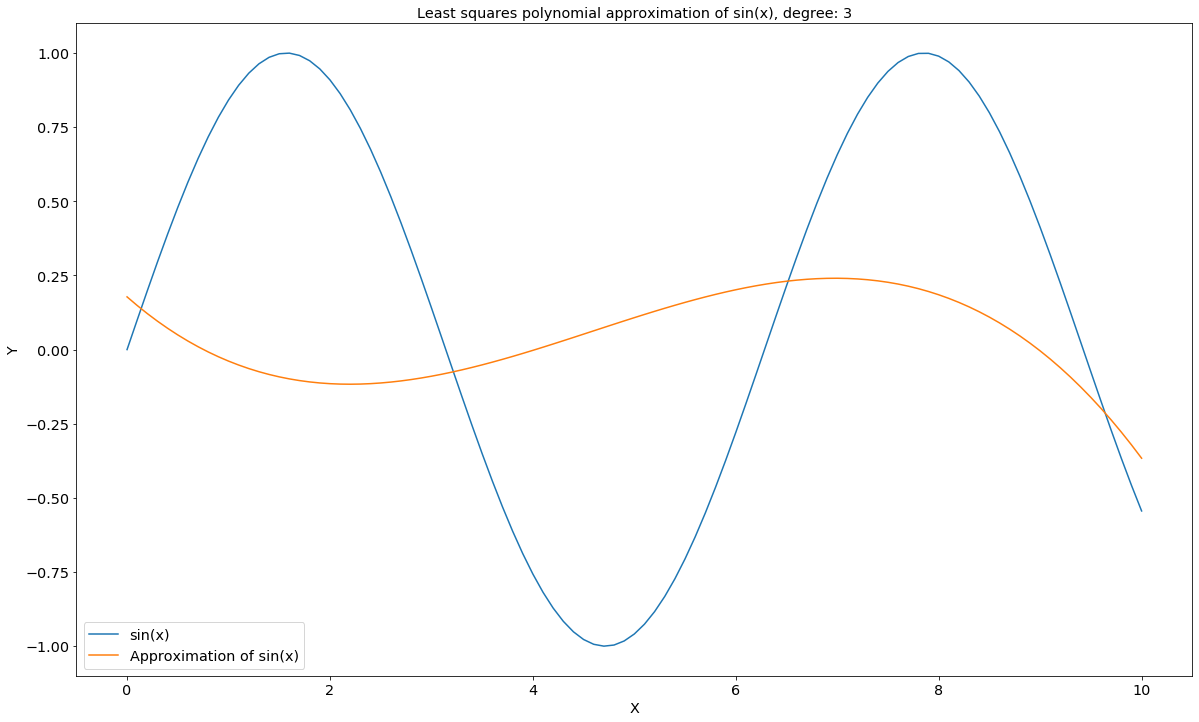

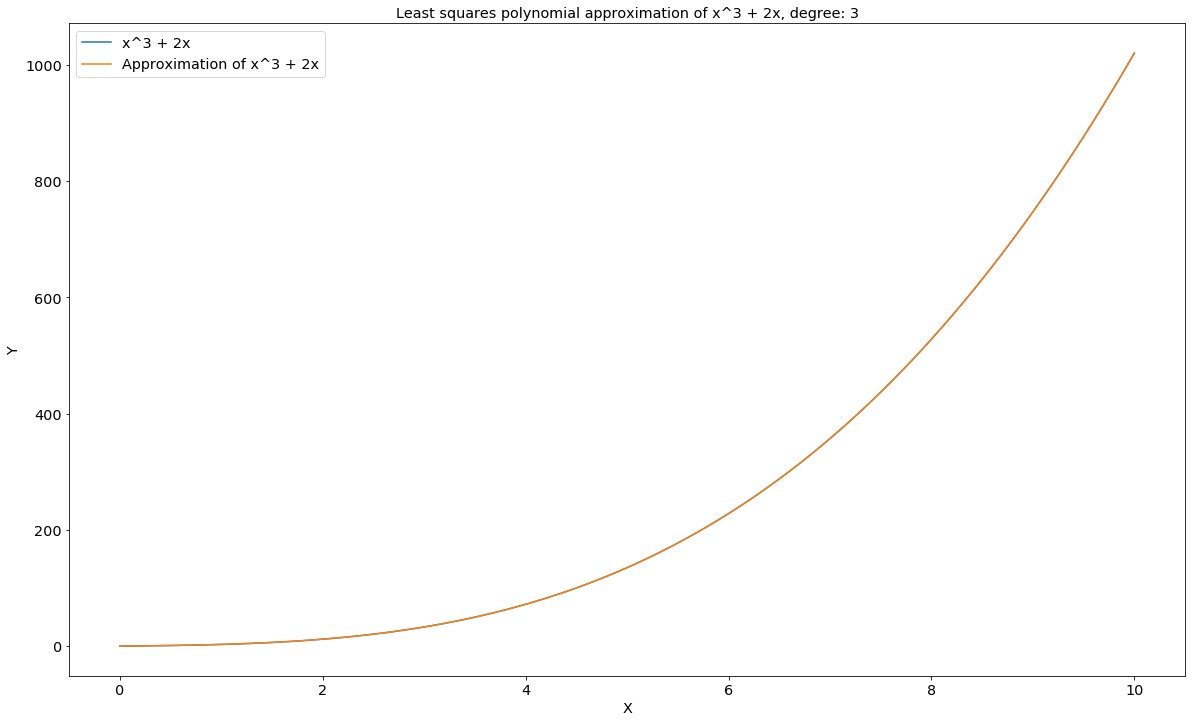

In [80]:
python_approx(0, 10, 4, 3)

## 5 Węzłów

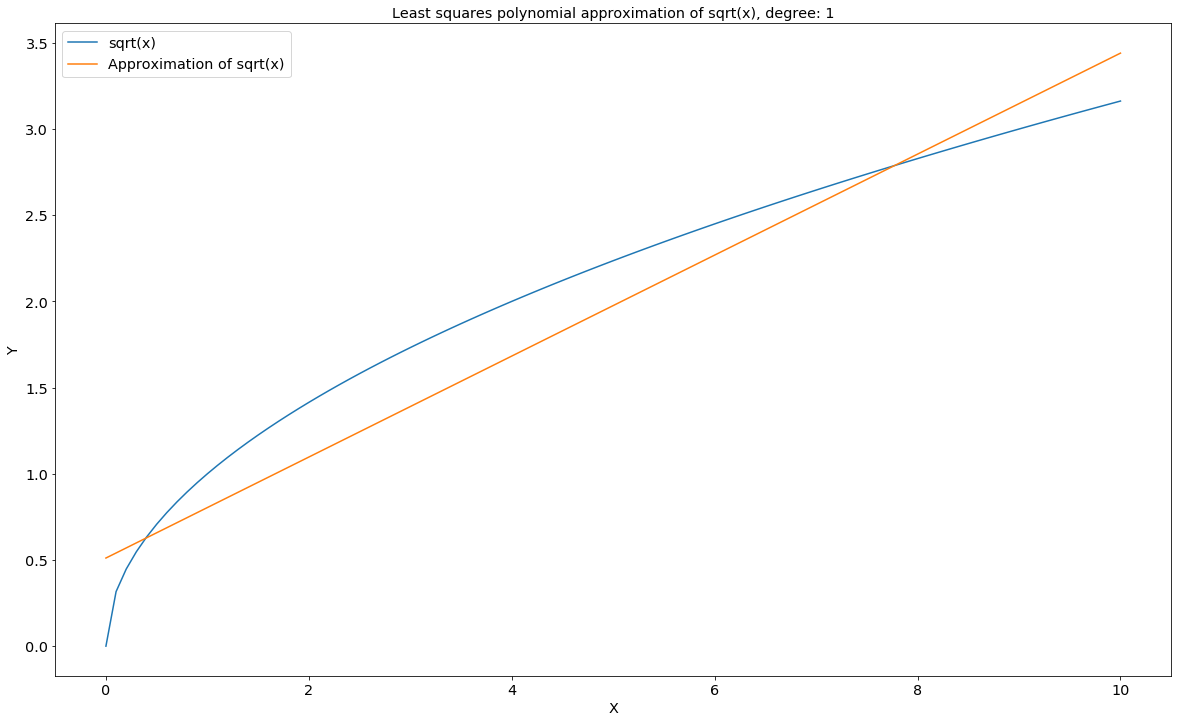

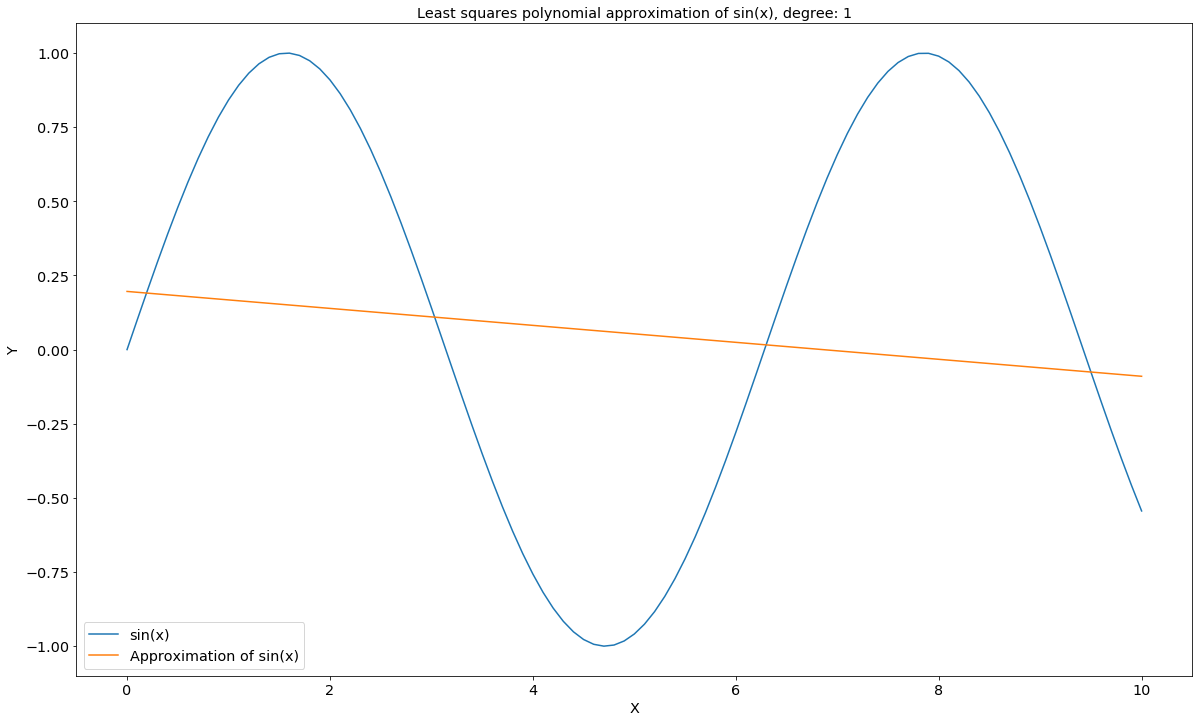

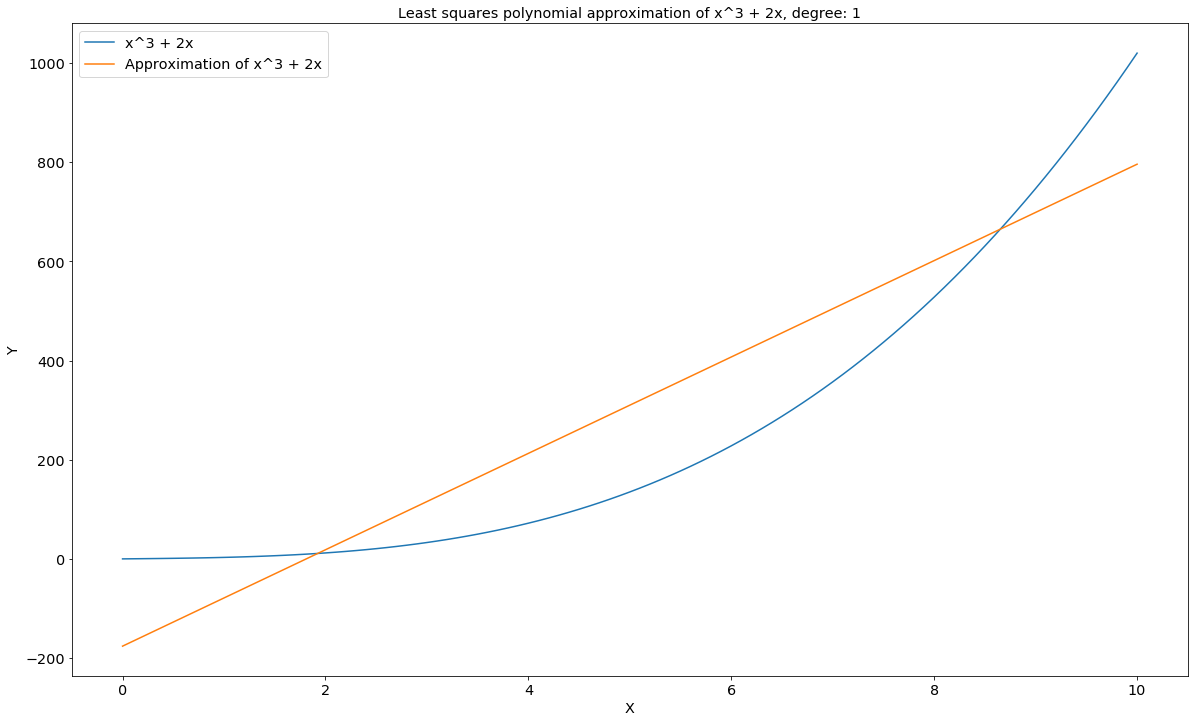

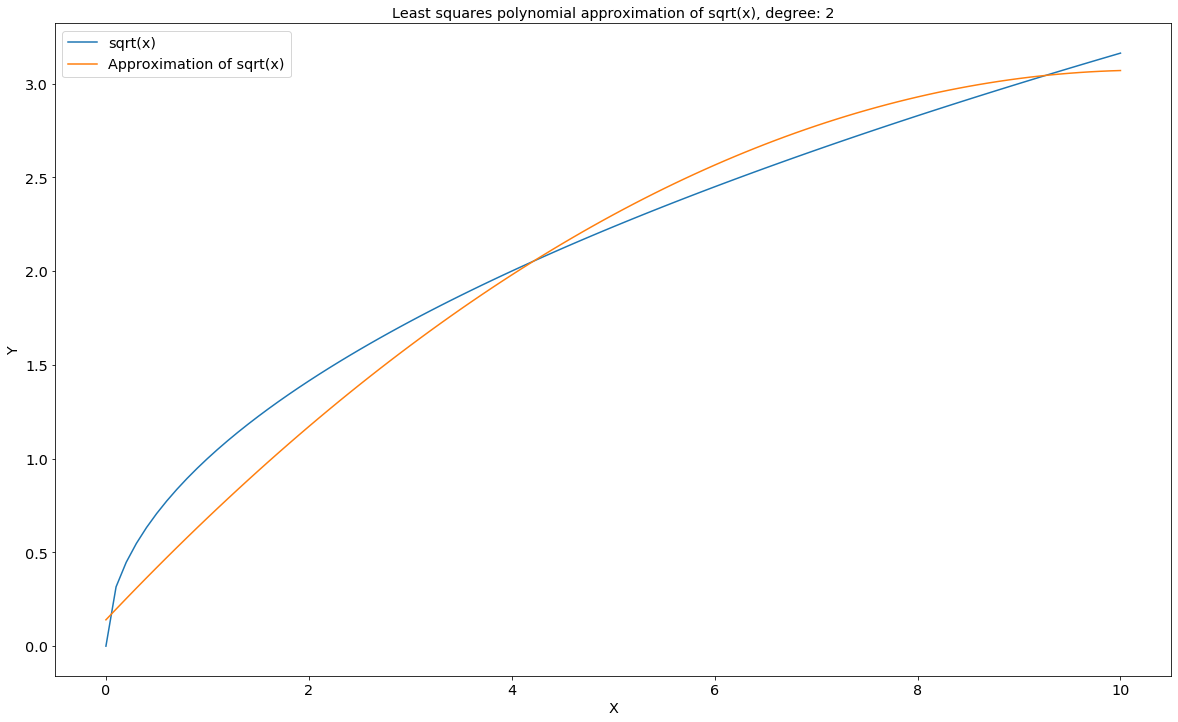

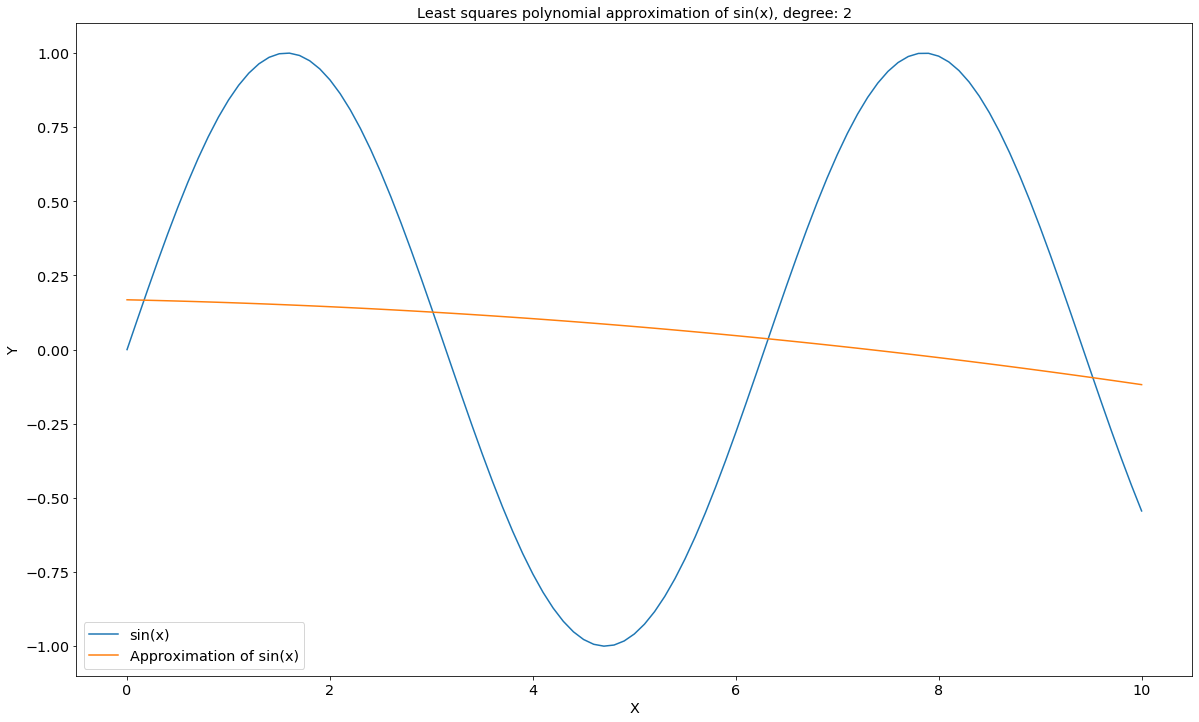

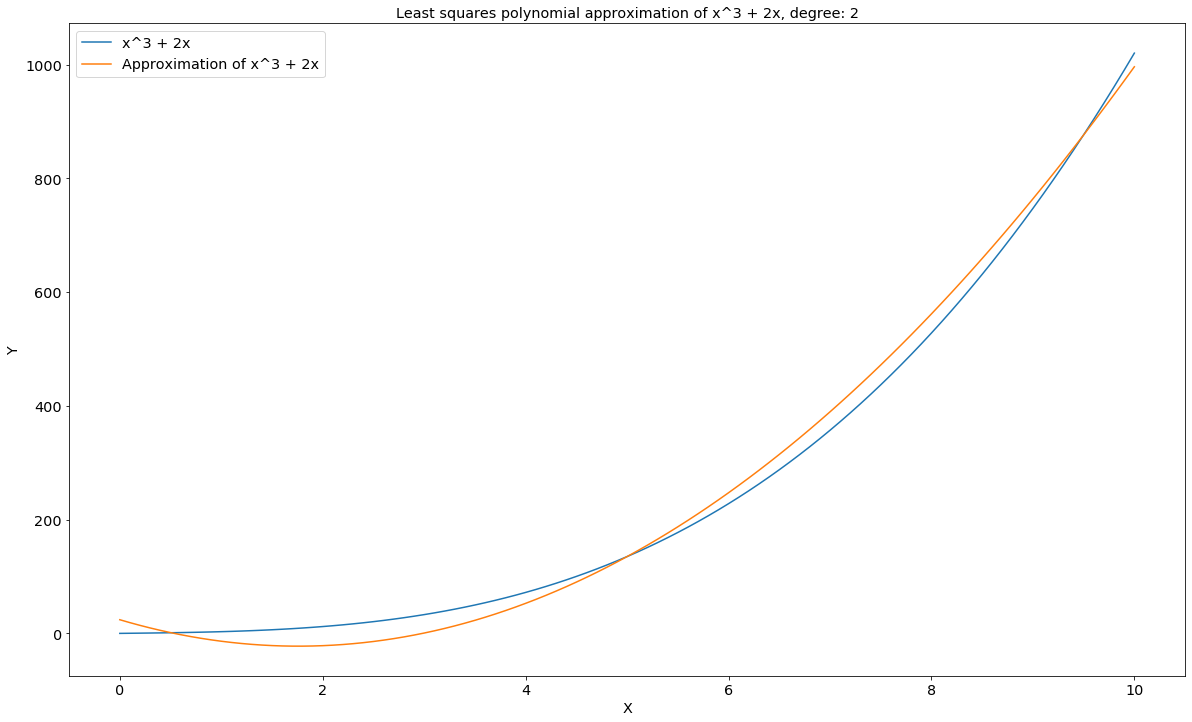

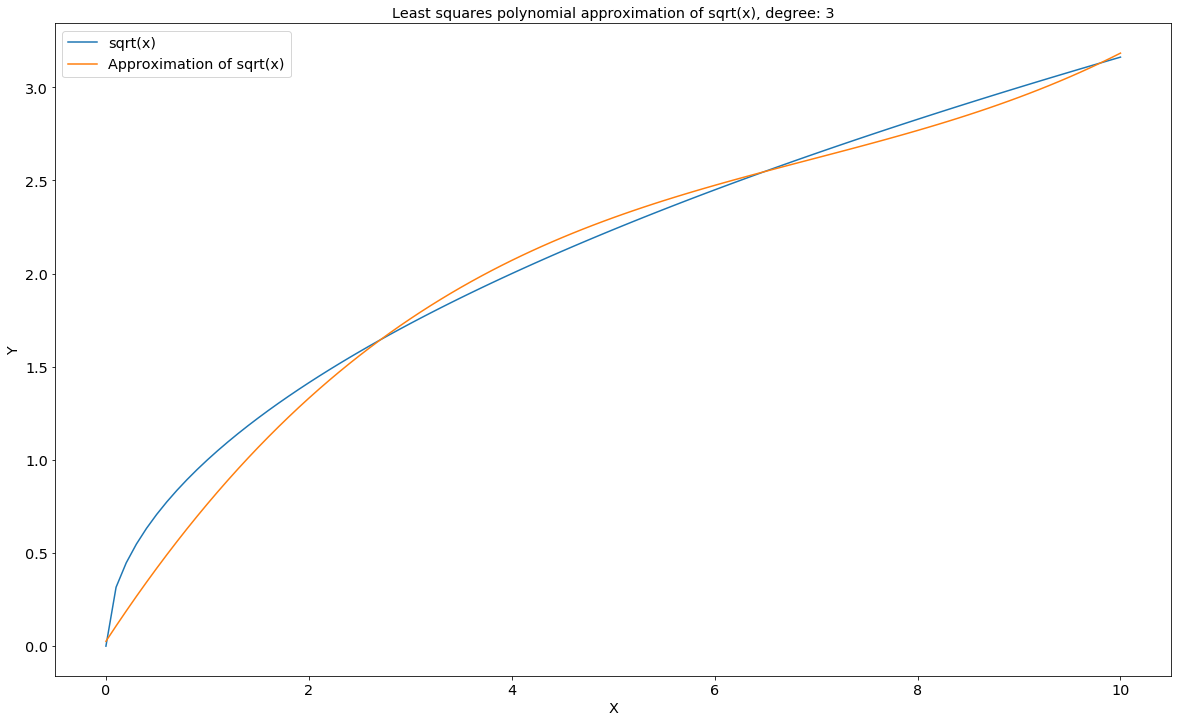

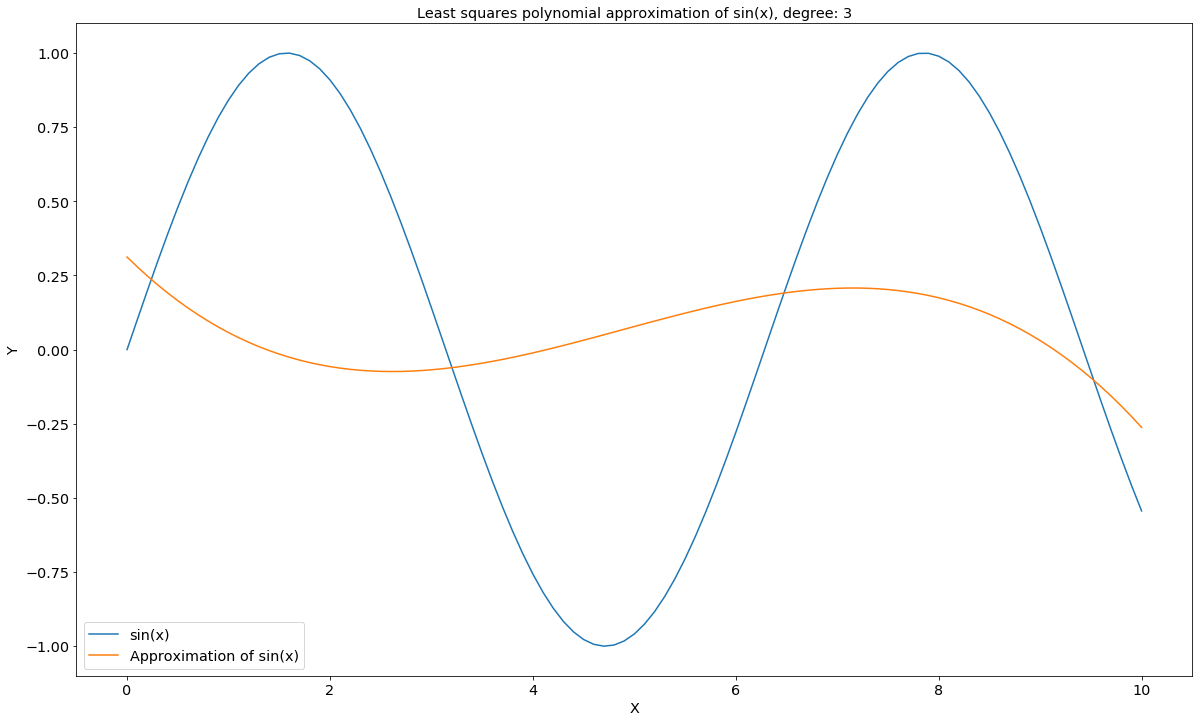

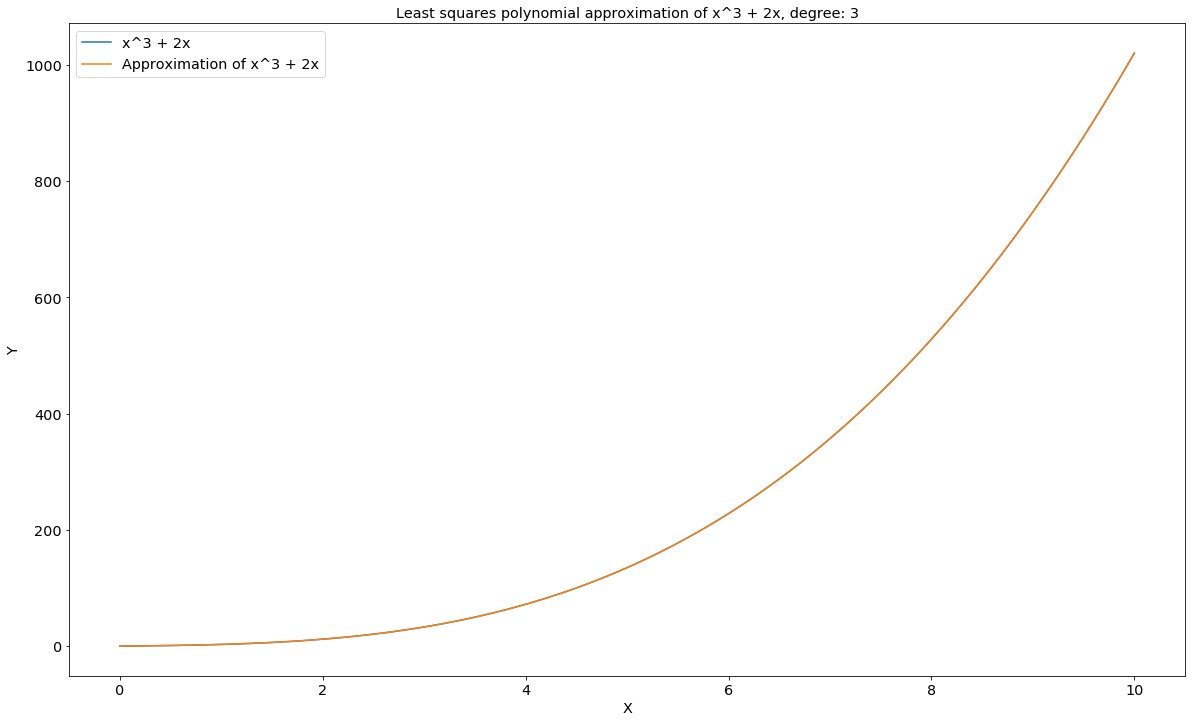

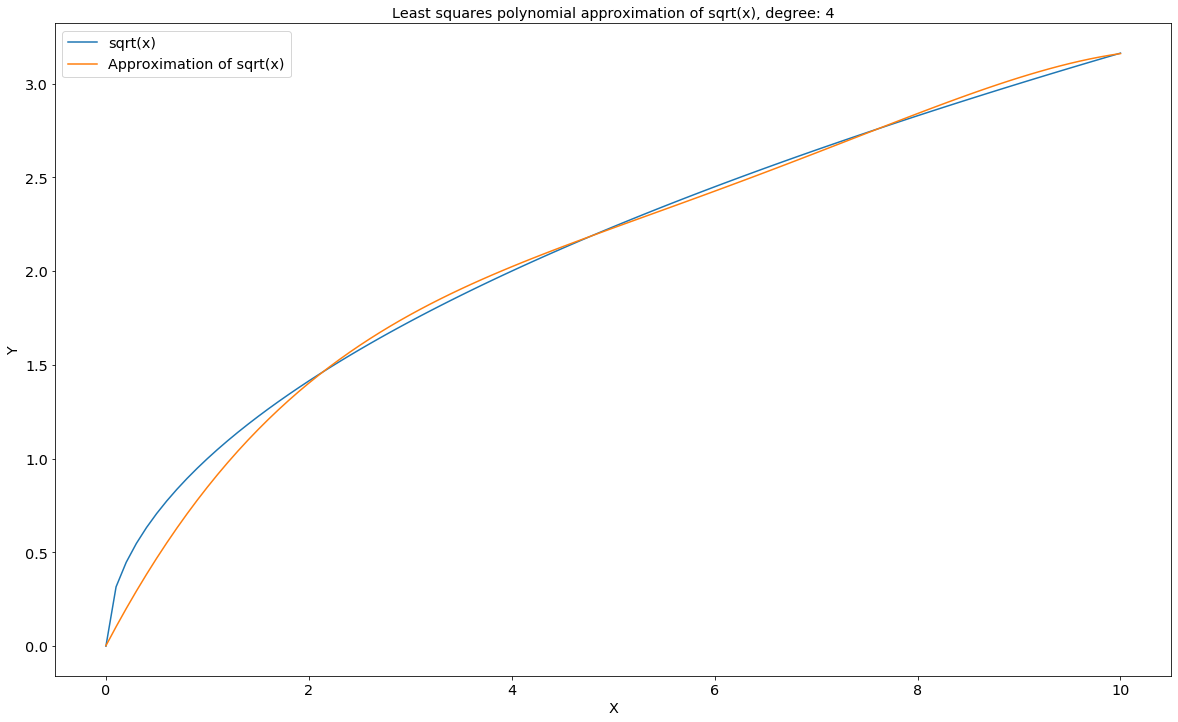

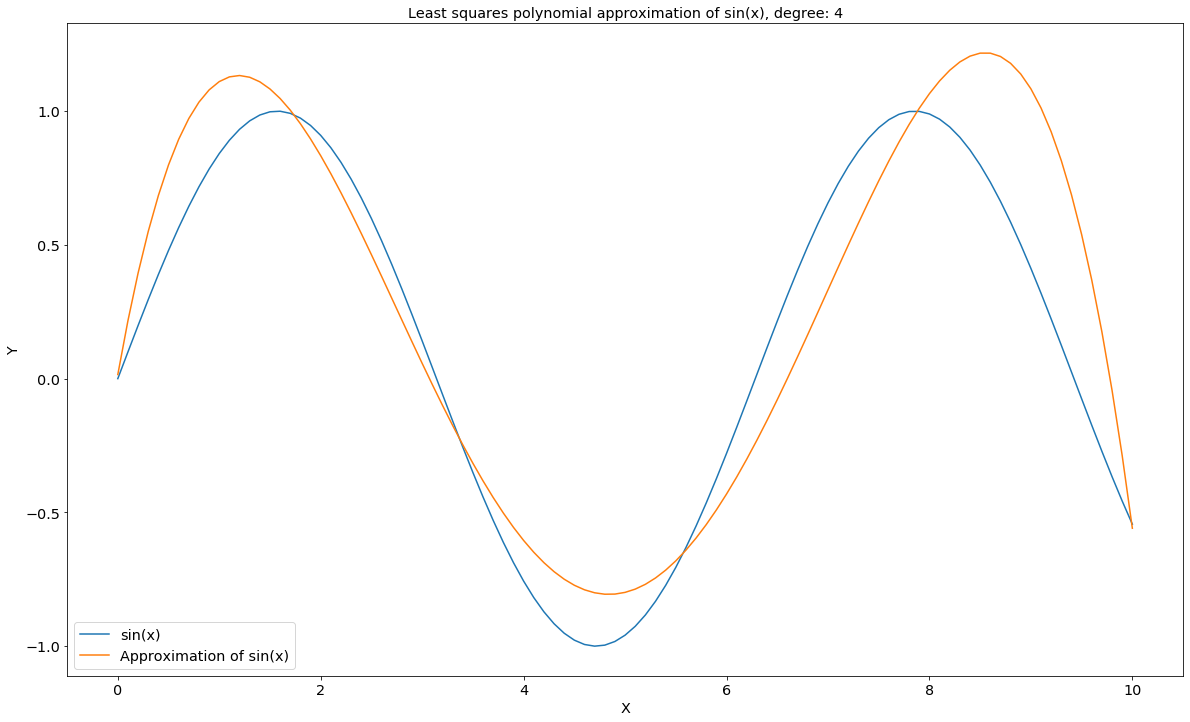

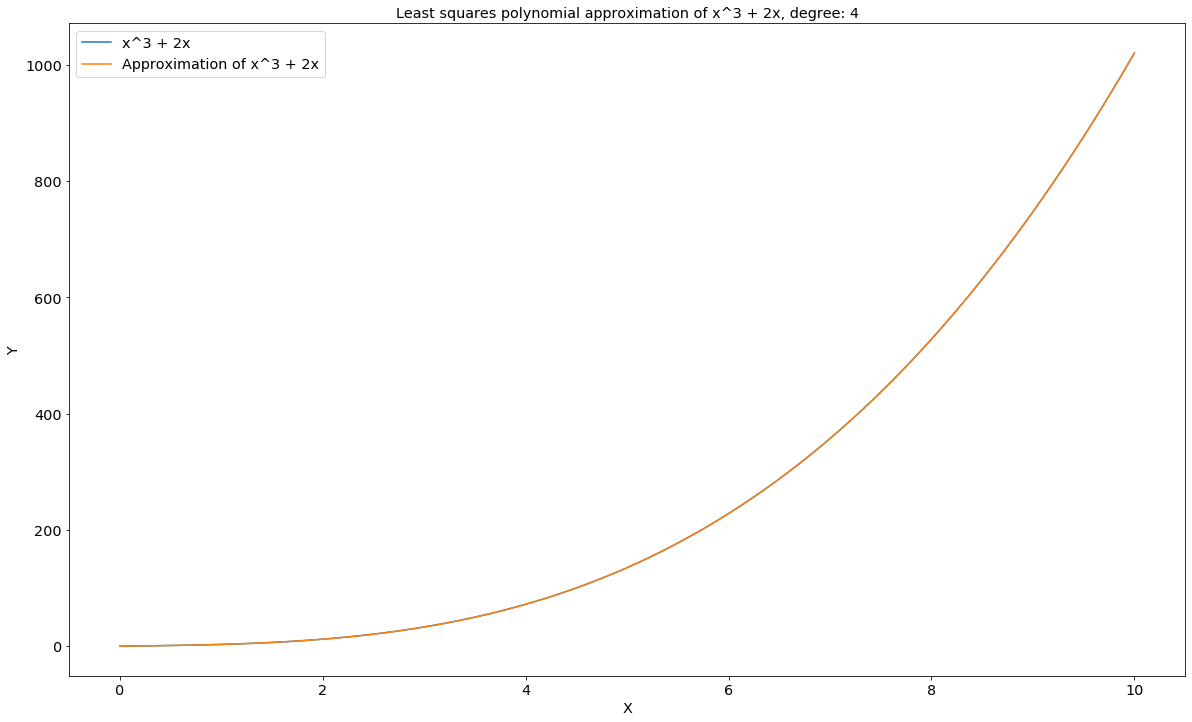

In [81]:
python_approx(0, 10, 5, 4)

## 8 Węzłów

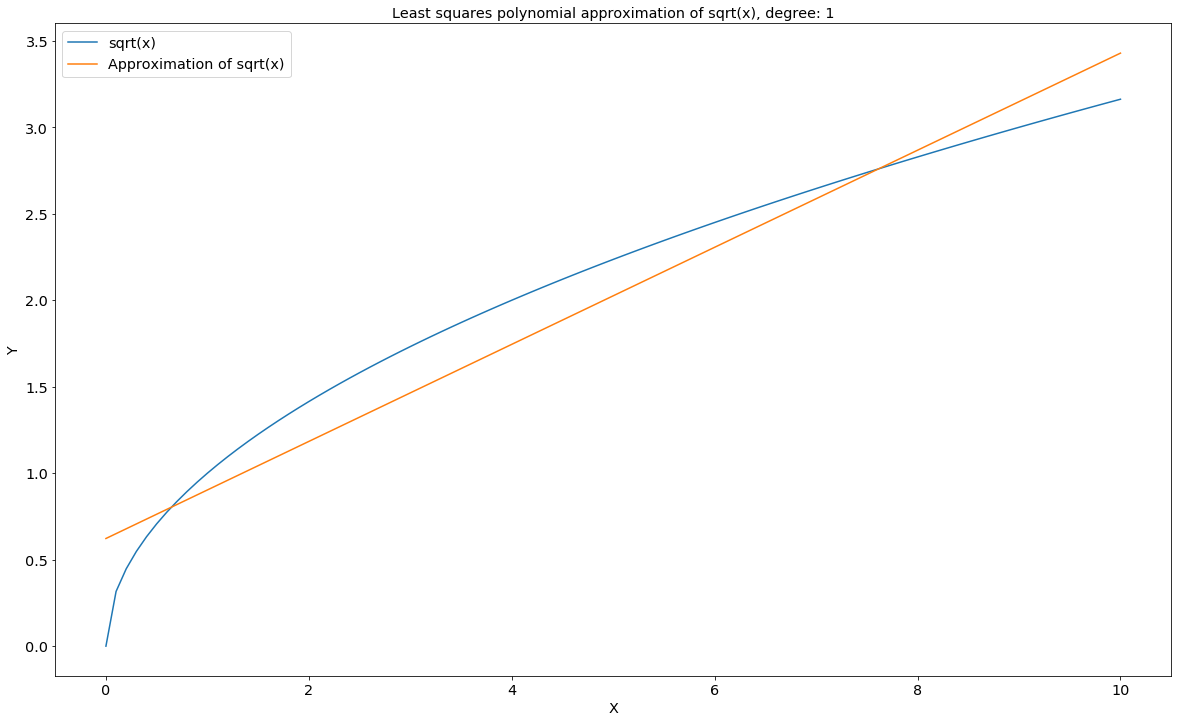

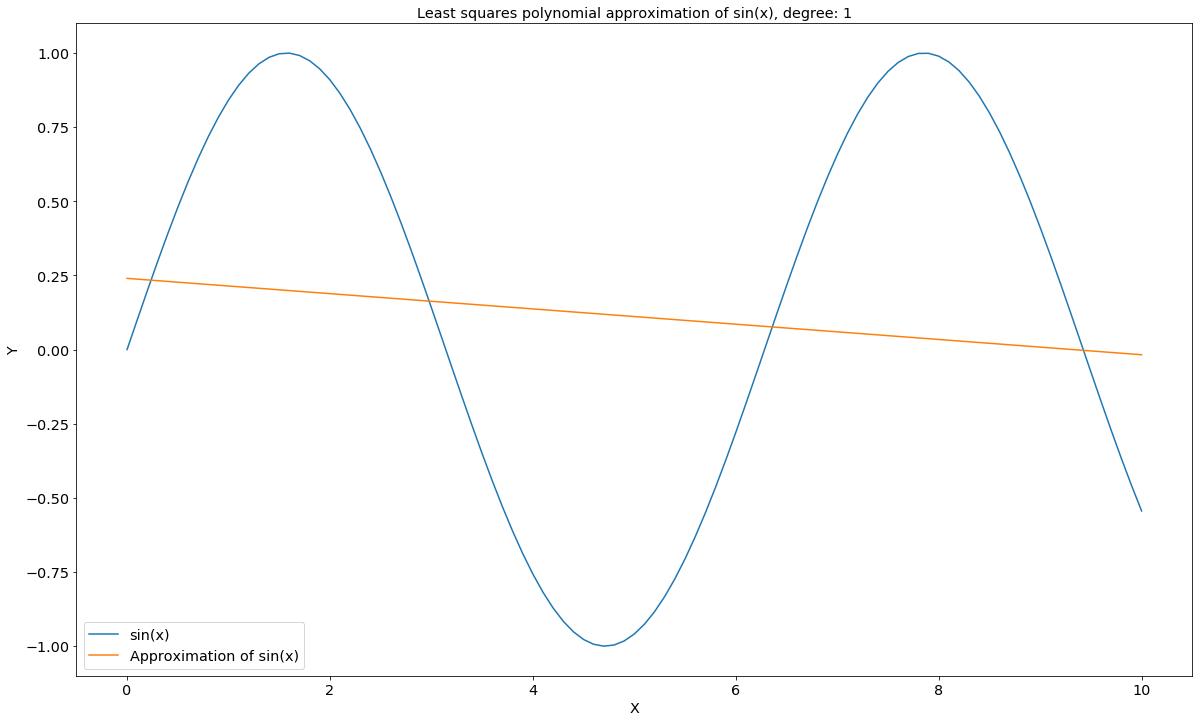

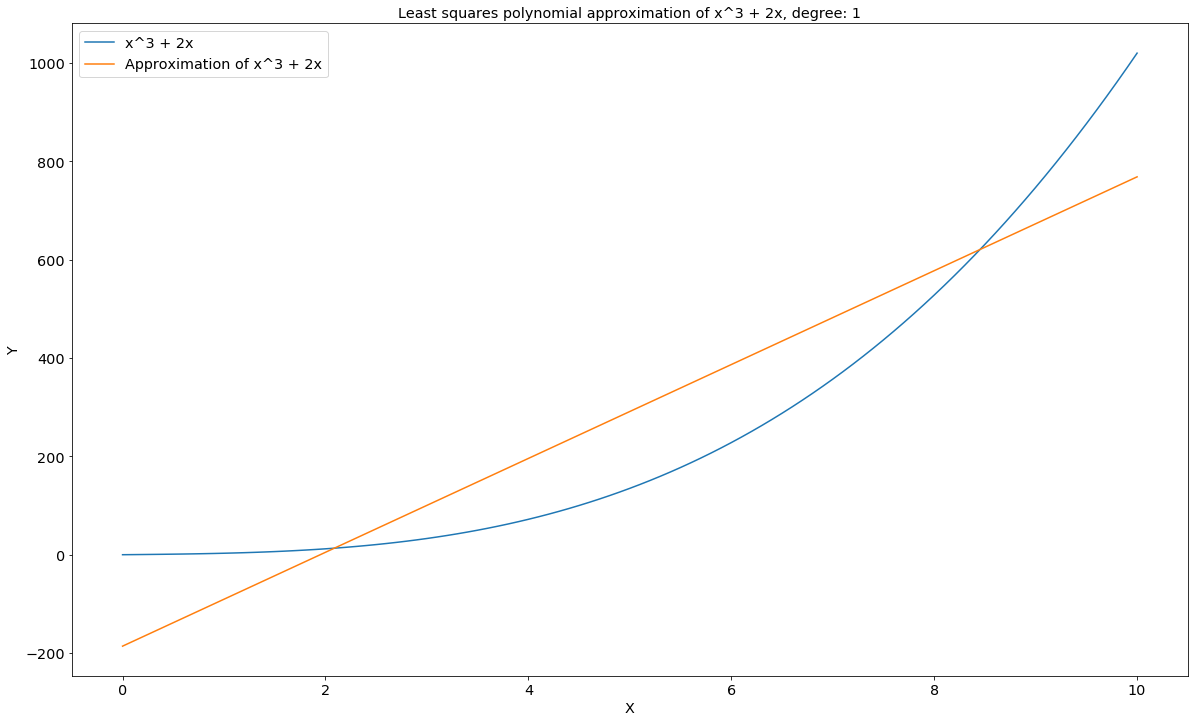

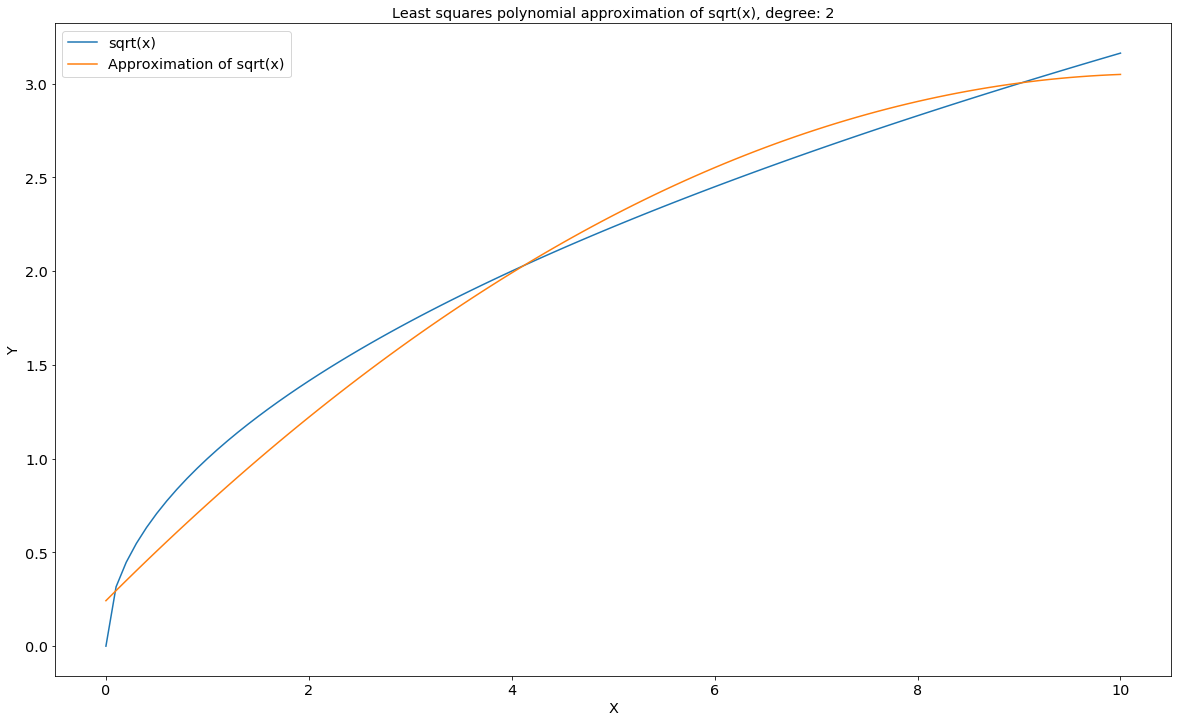

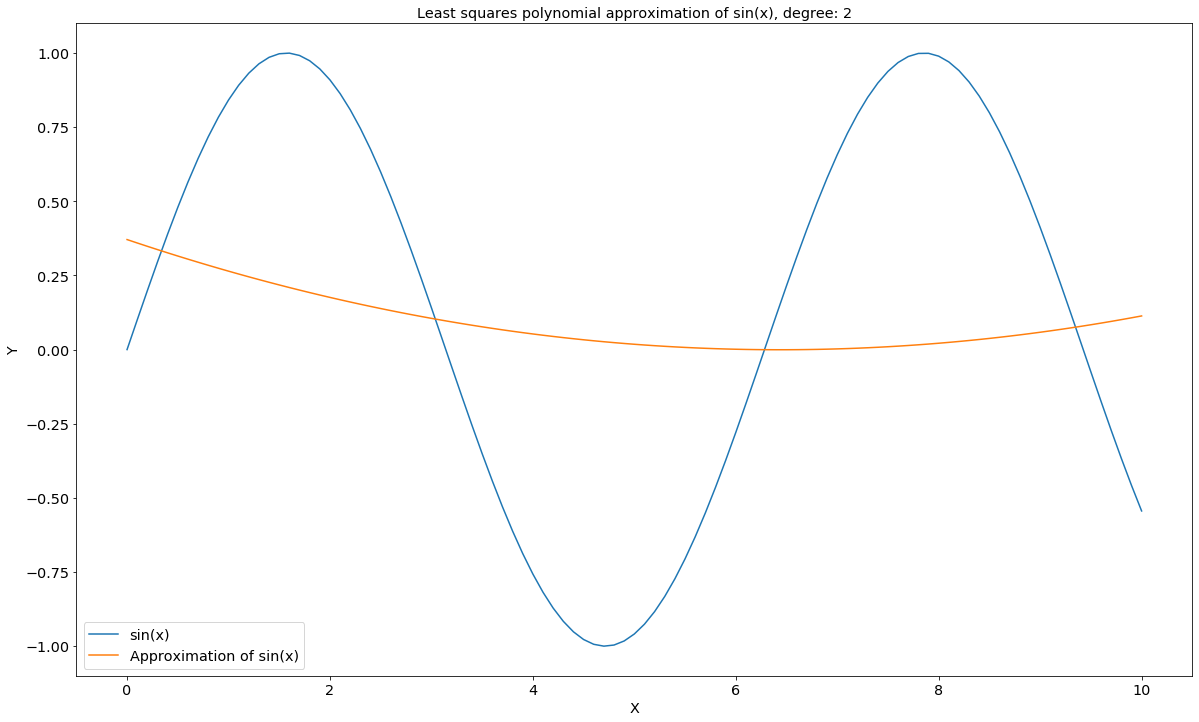

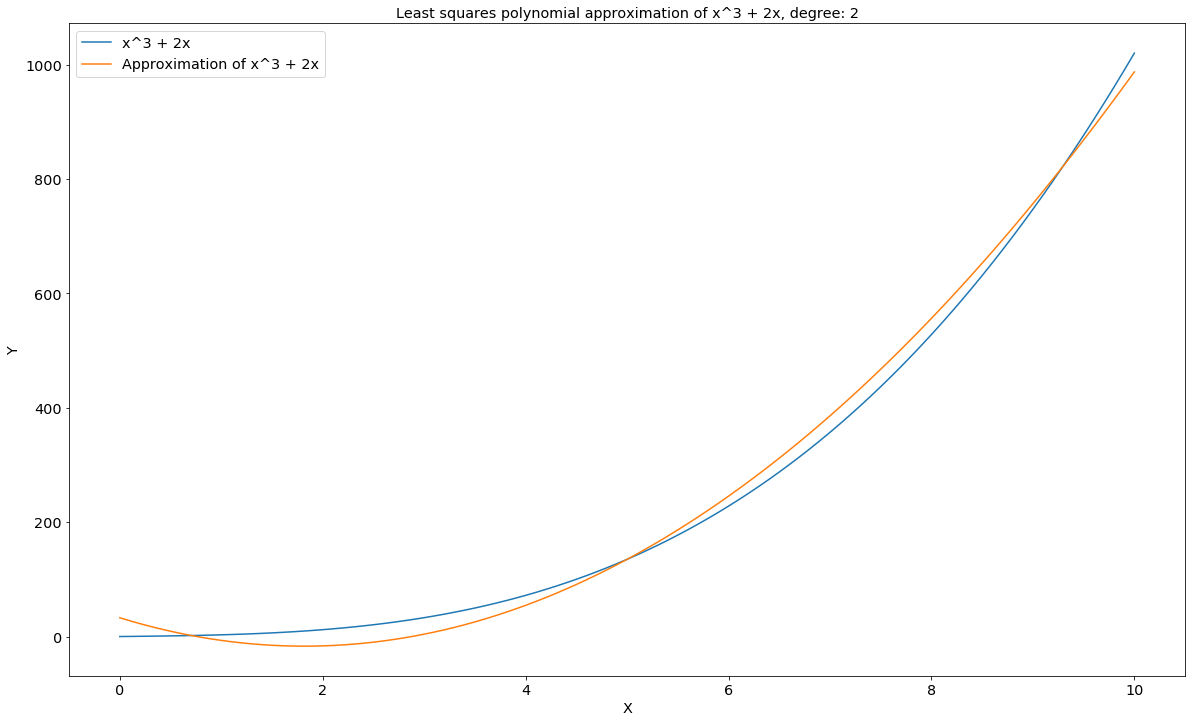

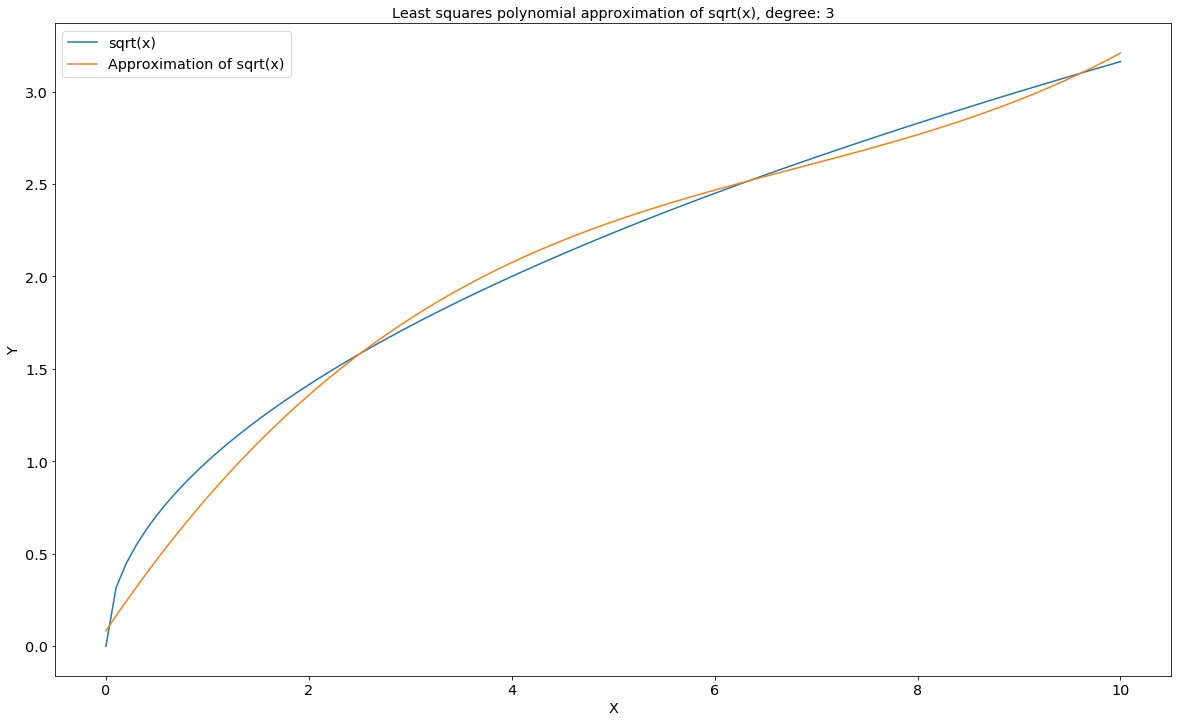

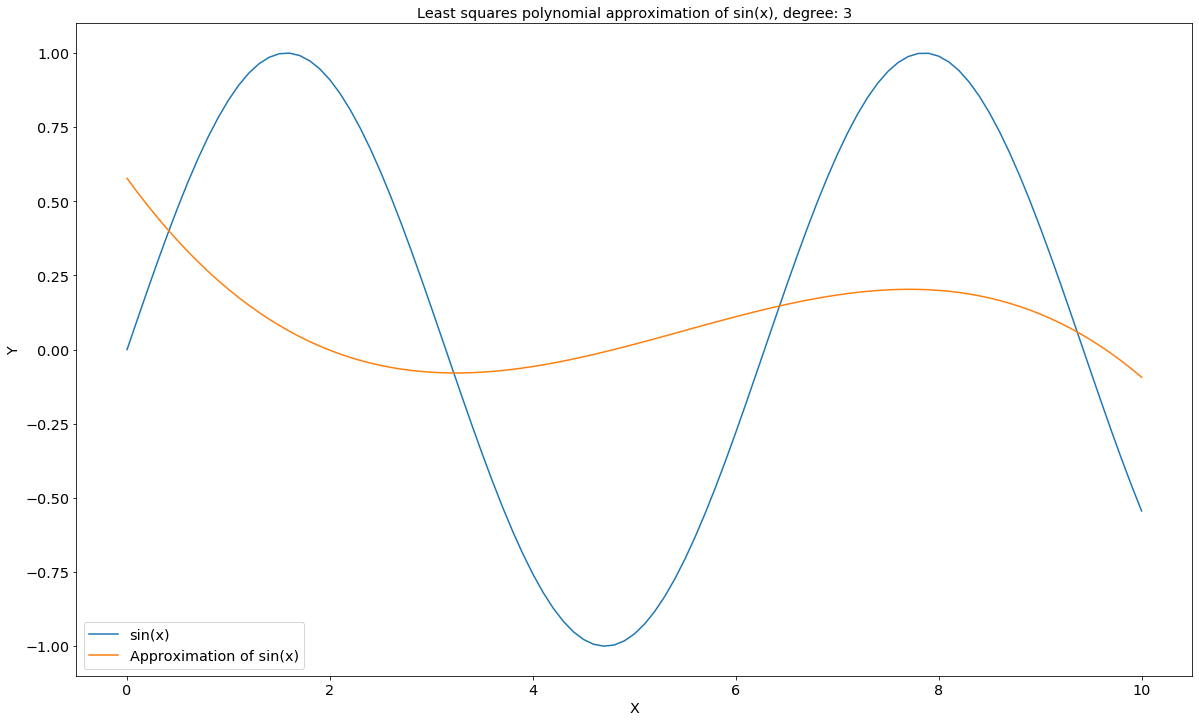

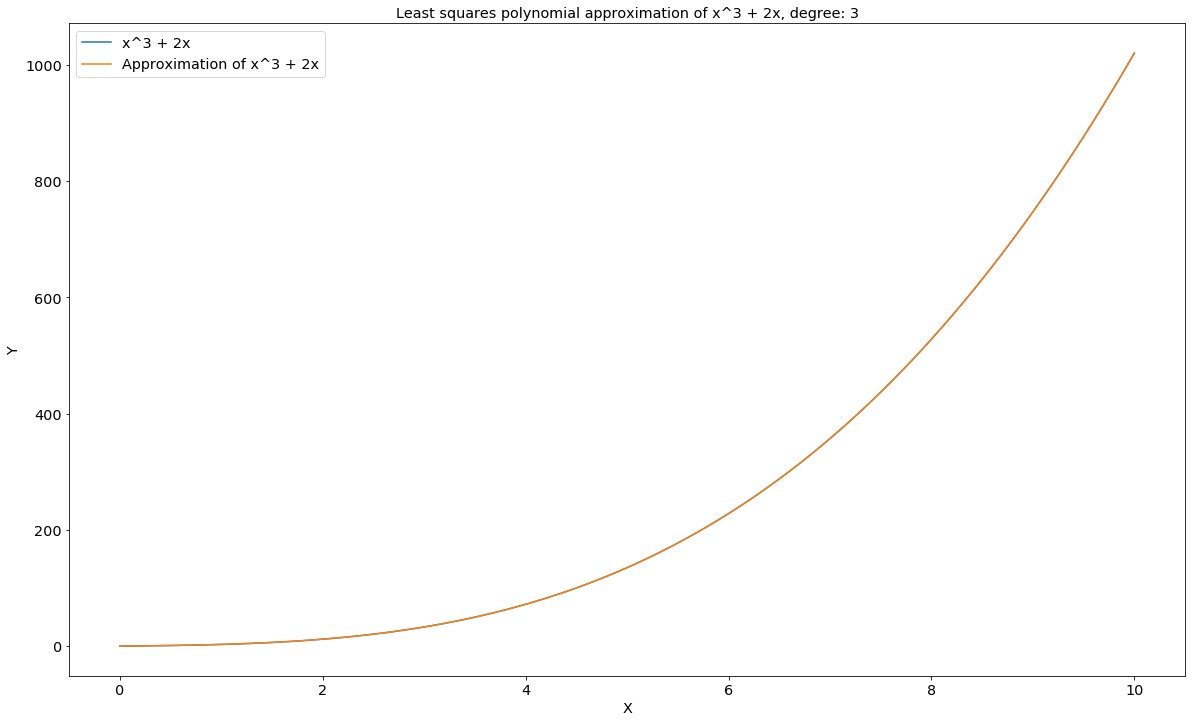

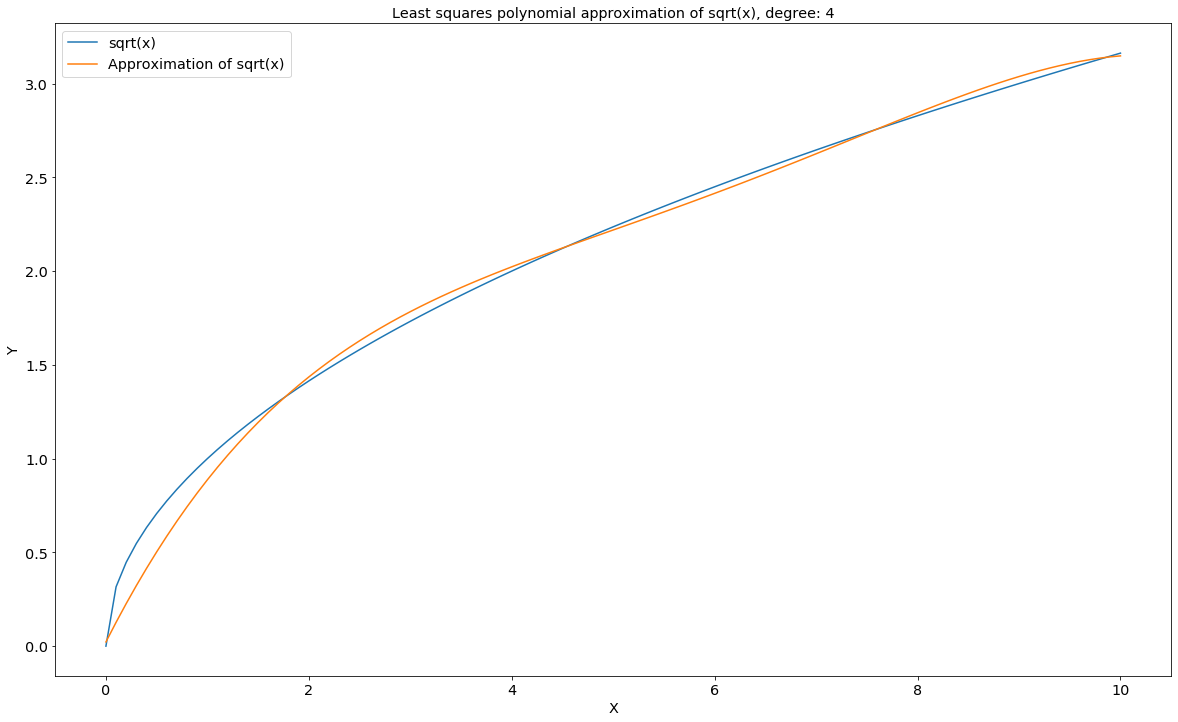

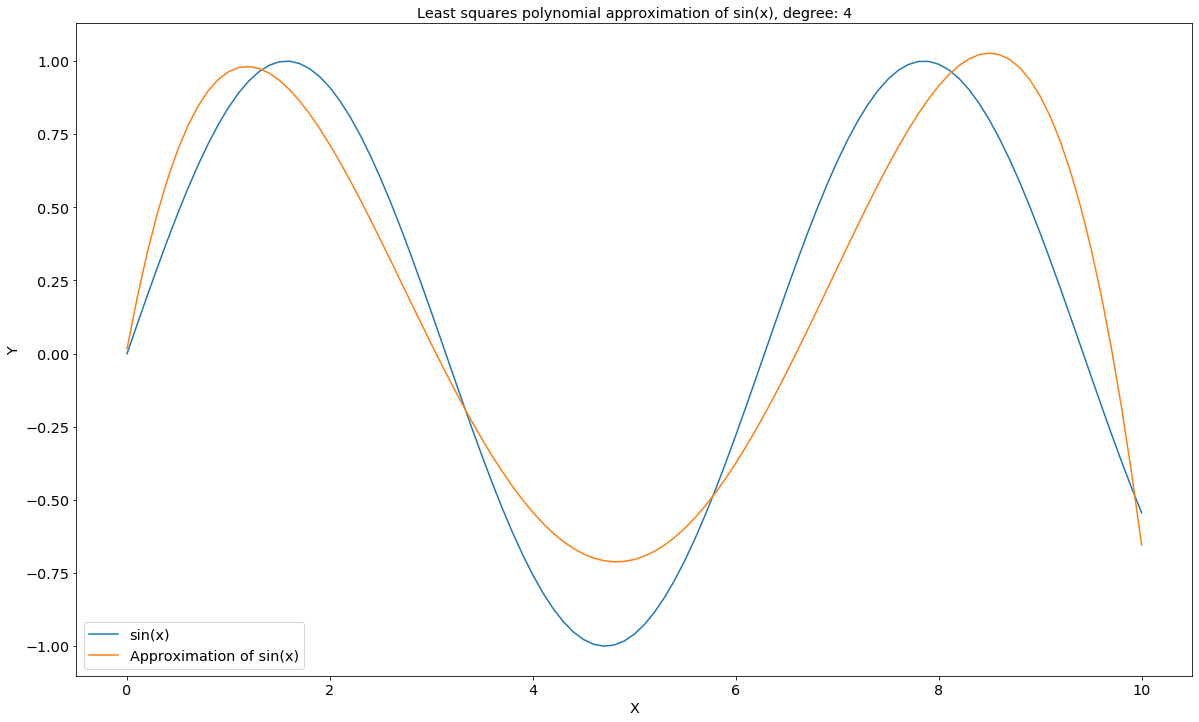

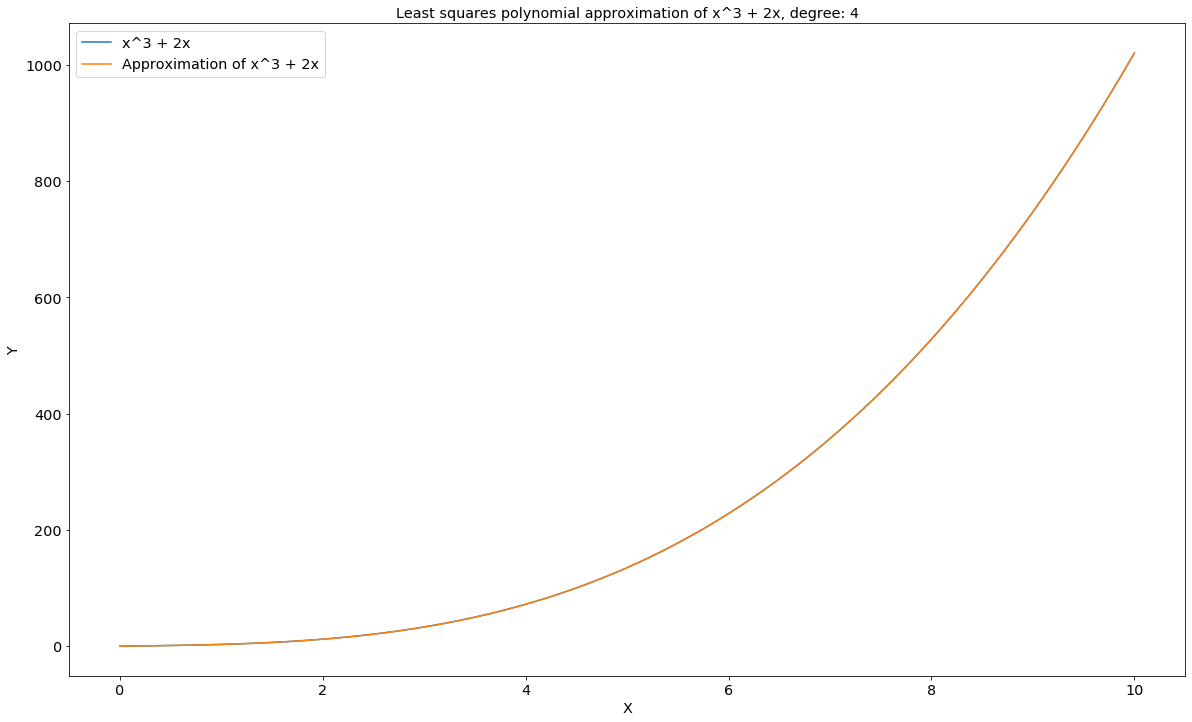

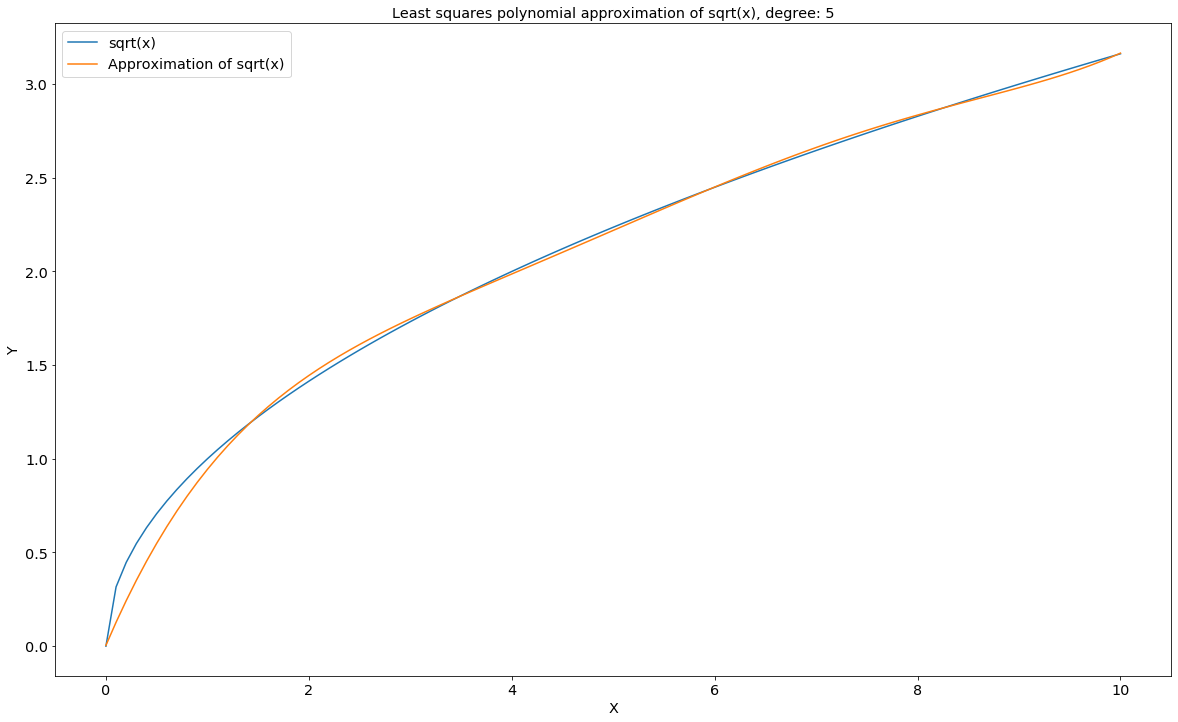

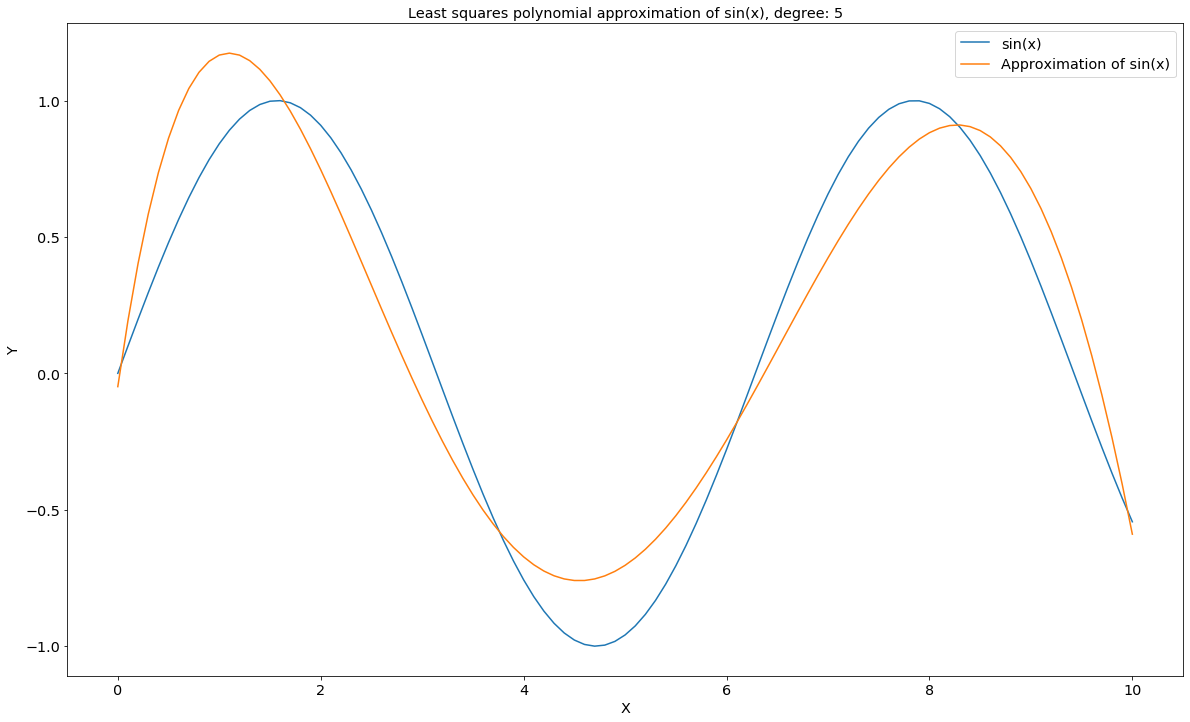

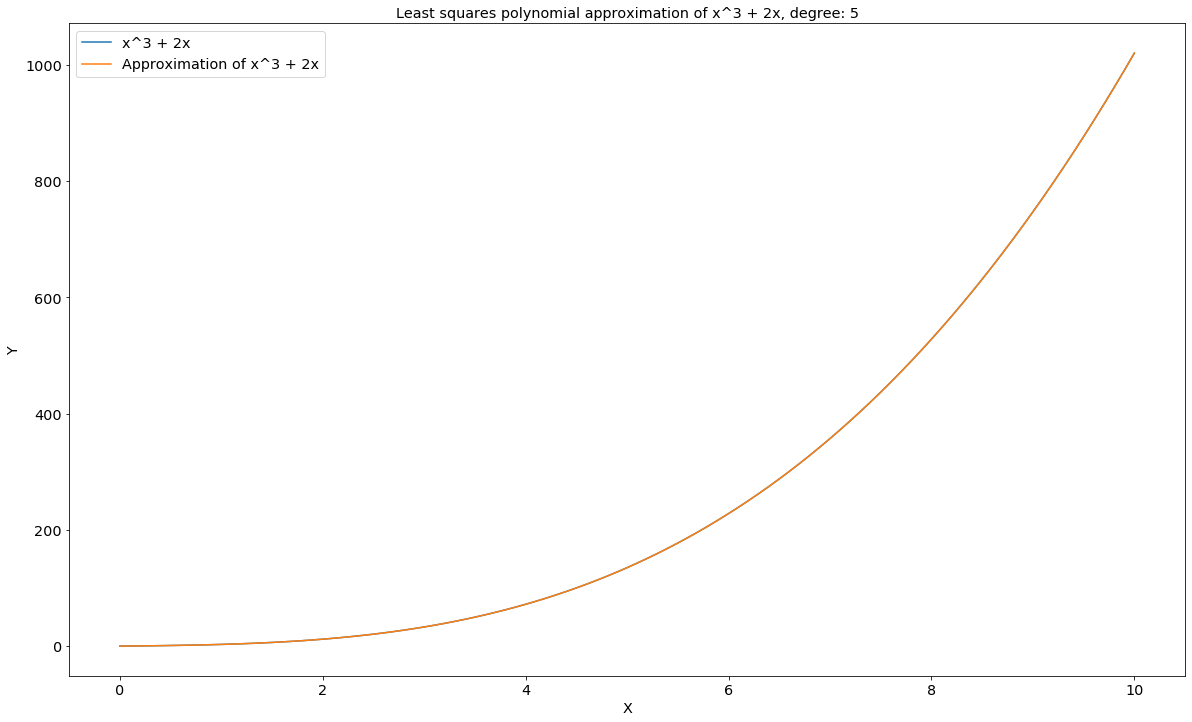

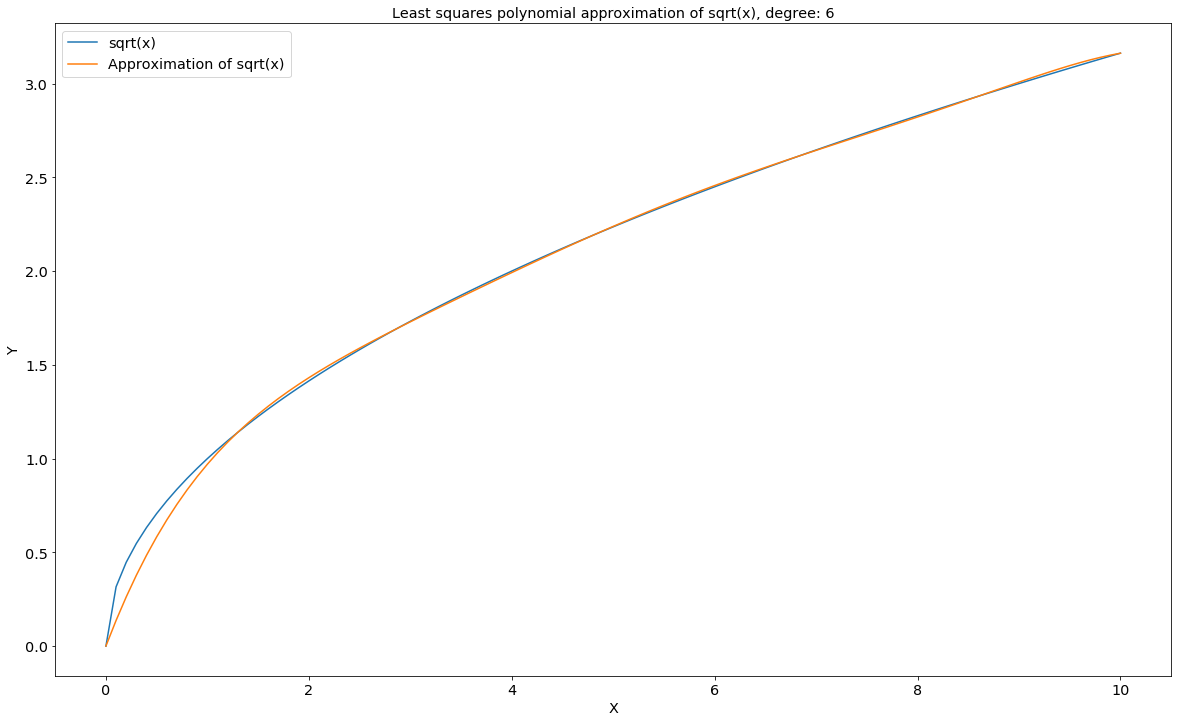

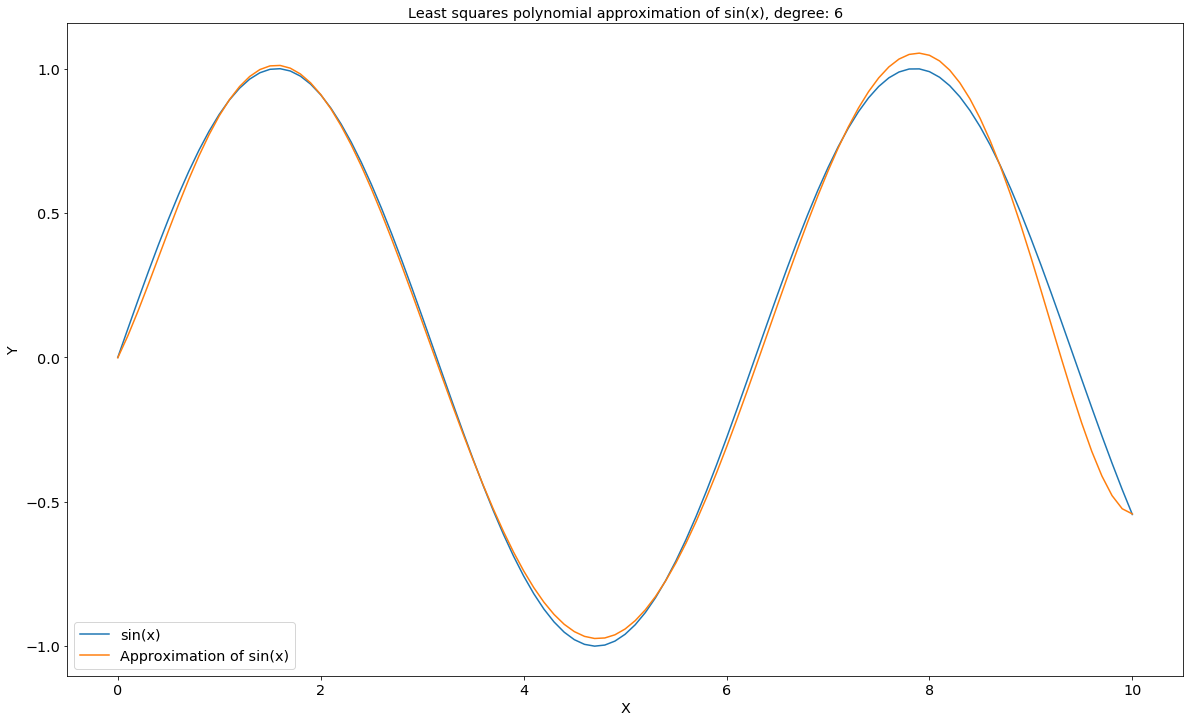

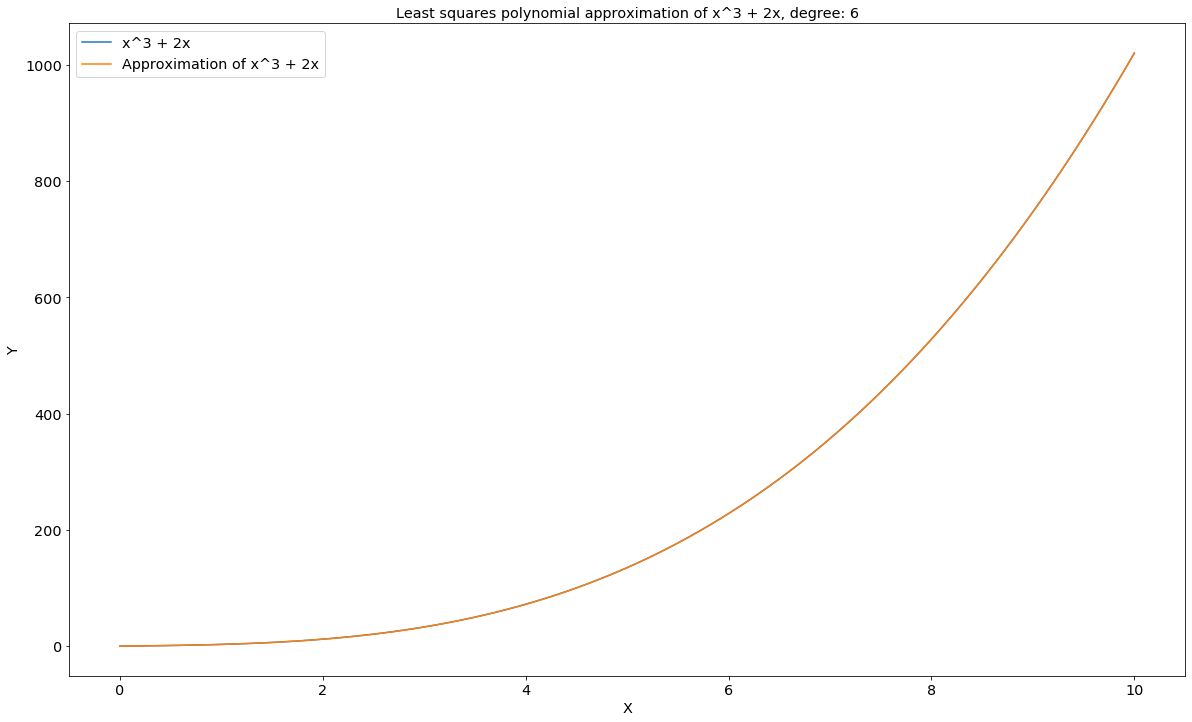

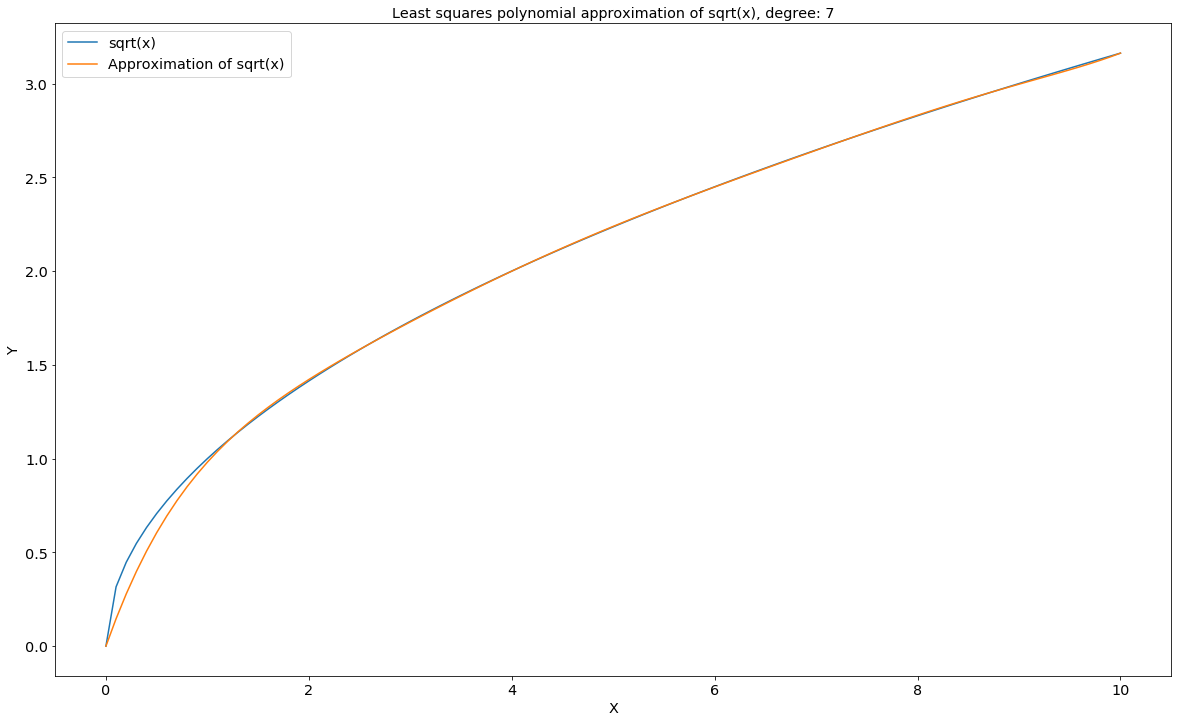

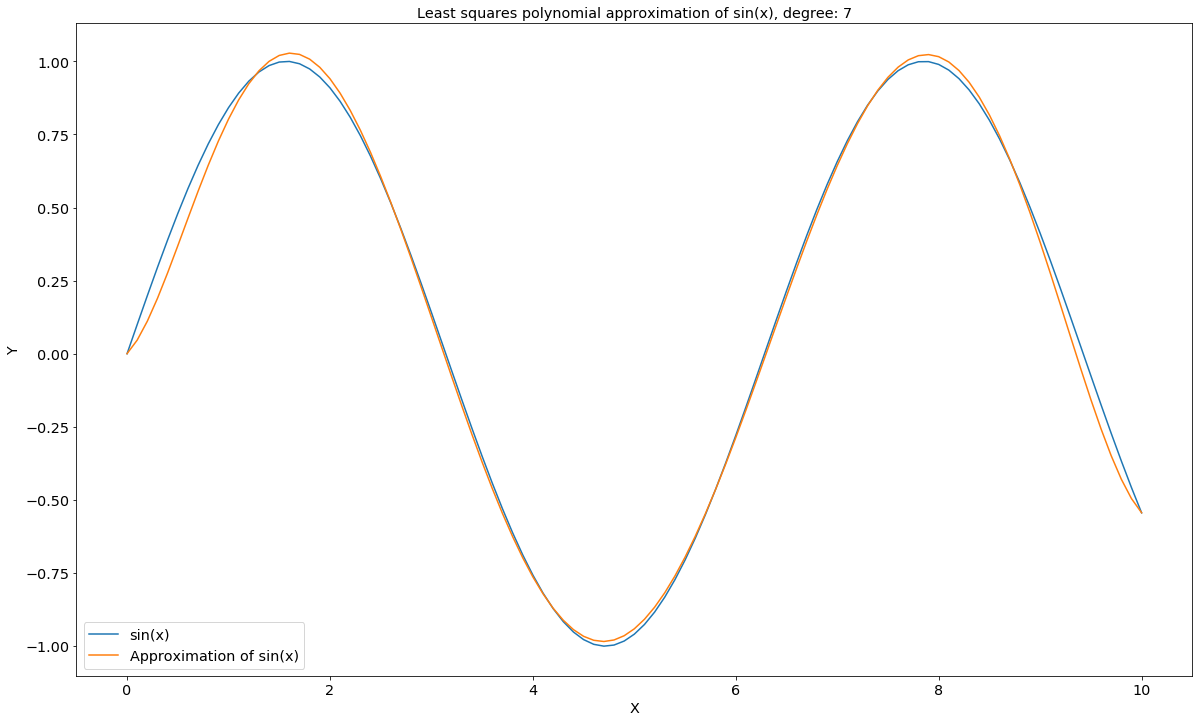

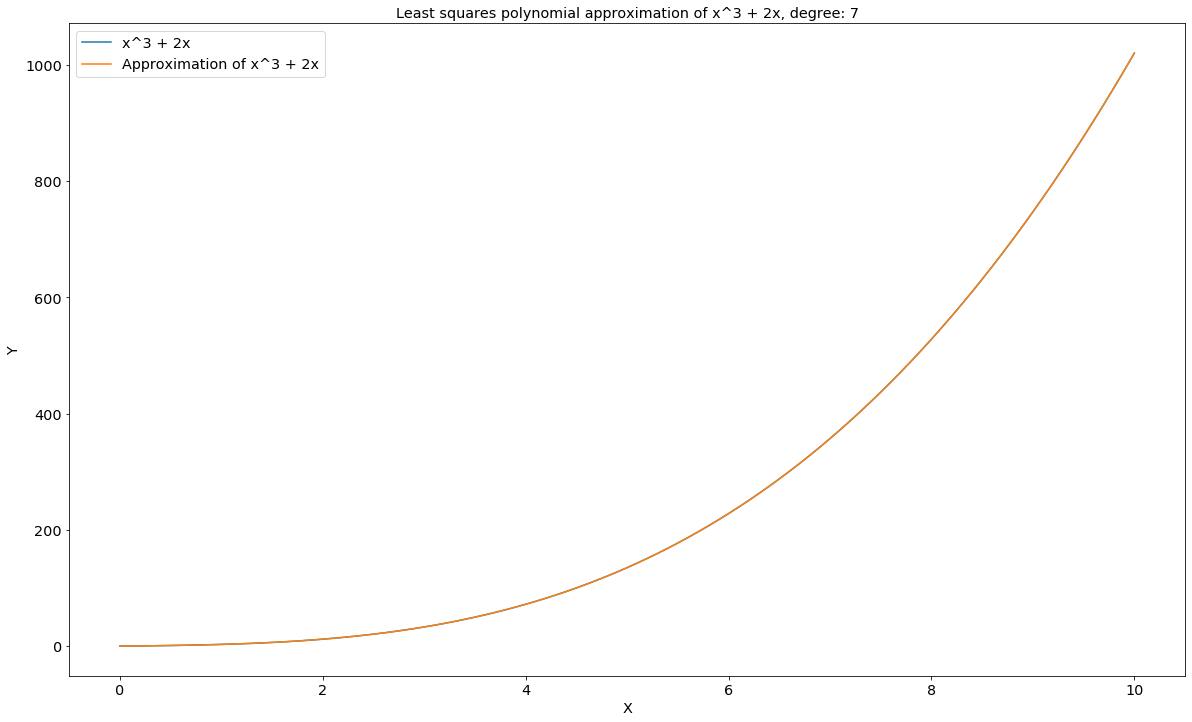

In [82]:
python_approx(0, 10, 8, 7)

## Przypadki zachorowań na COVID-19 w Japonii - z wykorzytsaniem bibliteki Numpy

In [87]:
def python_covid_approx(timeline, cases, n):
    for i in range(1, n + 1):
        cases_polynomial = np.polyfit(np.linspace(1, len(timeline), len(timeline)), cases, i)
        cases_values = np.polyval(cases_polynomial, np.linspace(1, len(timeline), len(timeline)))

        params = {'legend.fontsize': 'x-large',
                  'figure.figsize': (20, 12),
                  'axes.labelsize': 'x-large',
                  'axes.titlesize': 'x-large',
                  'xtick.labelsize': 'x-large',
                  'ytick.labelsize': 'x-large'}
        plt.rcParams.update(params)
        plt.title(f'Approximation of degree {i}')
        plt.plot(timeline, cases_values, label="Approximation")
        plt.plot(timeline, cases, 'ro', label="Data")
        plt.grid(True, which='both')
        plt.xlabel('Timeline')
        plt.ylabel('Cases')
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

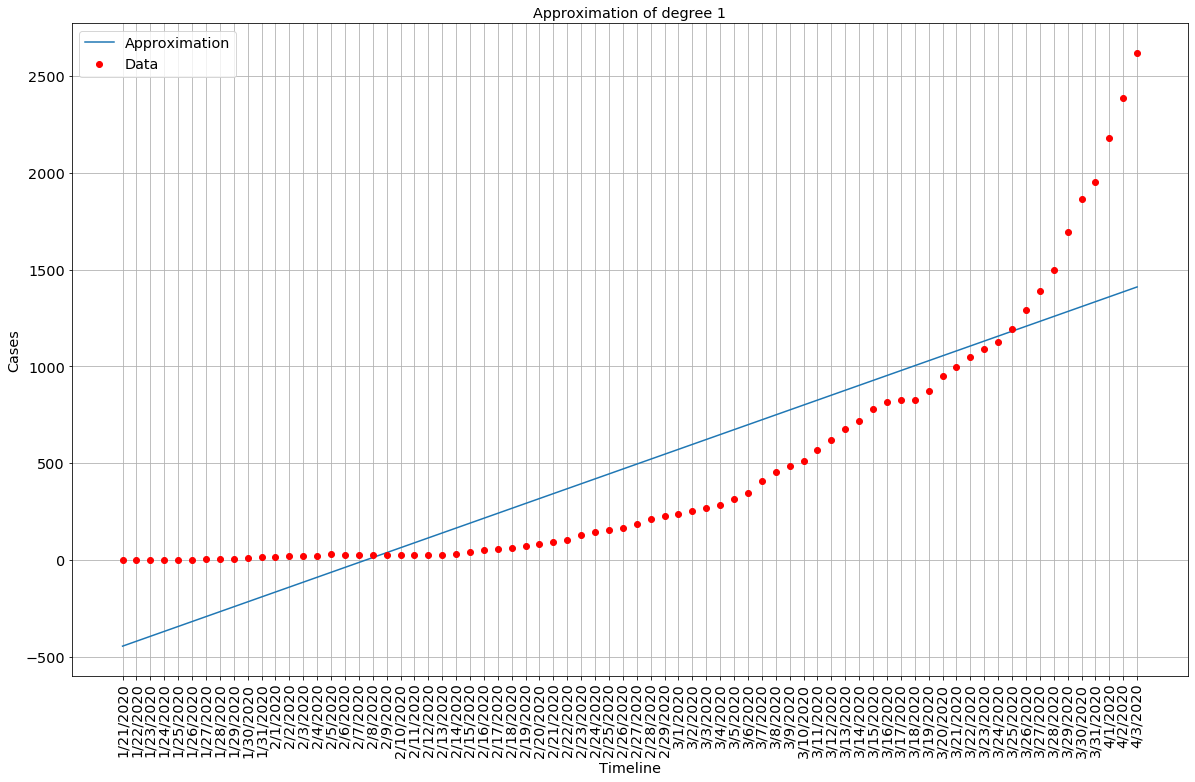

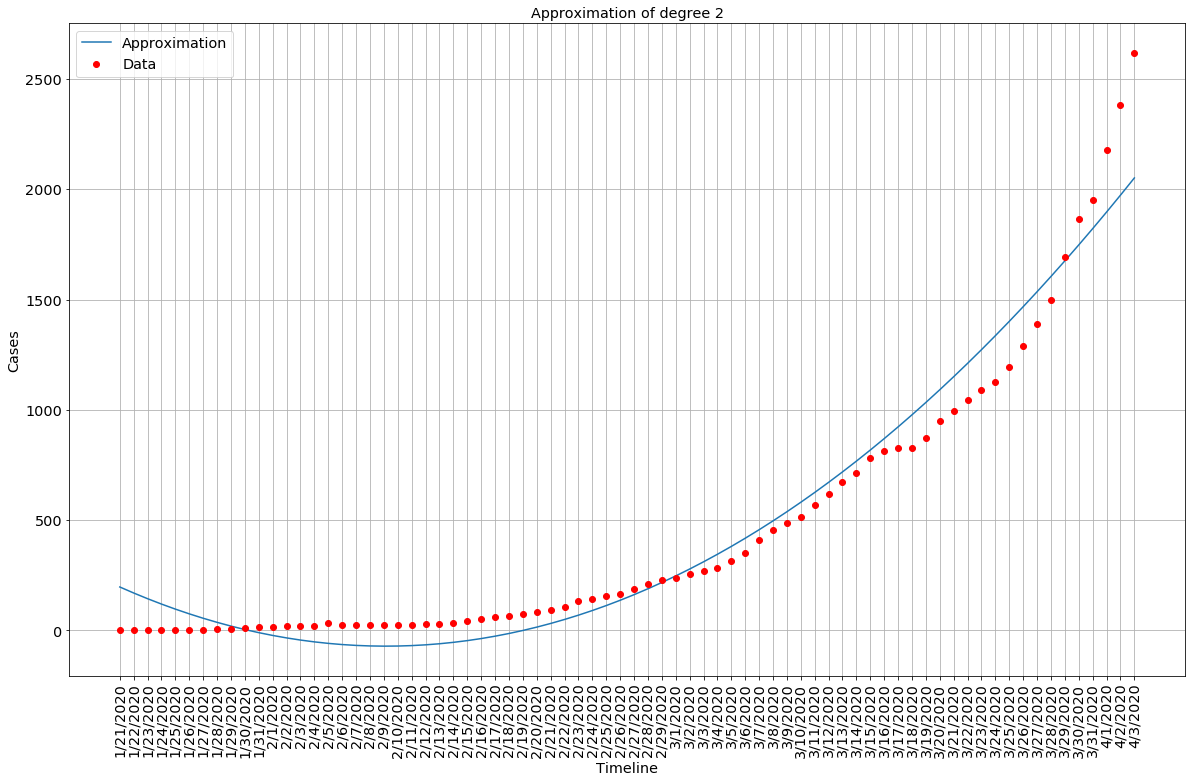

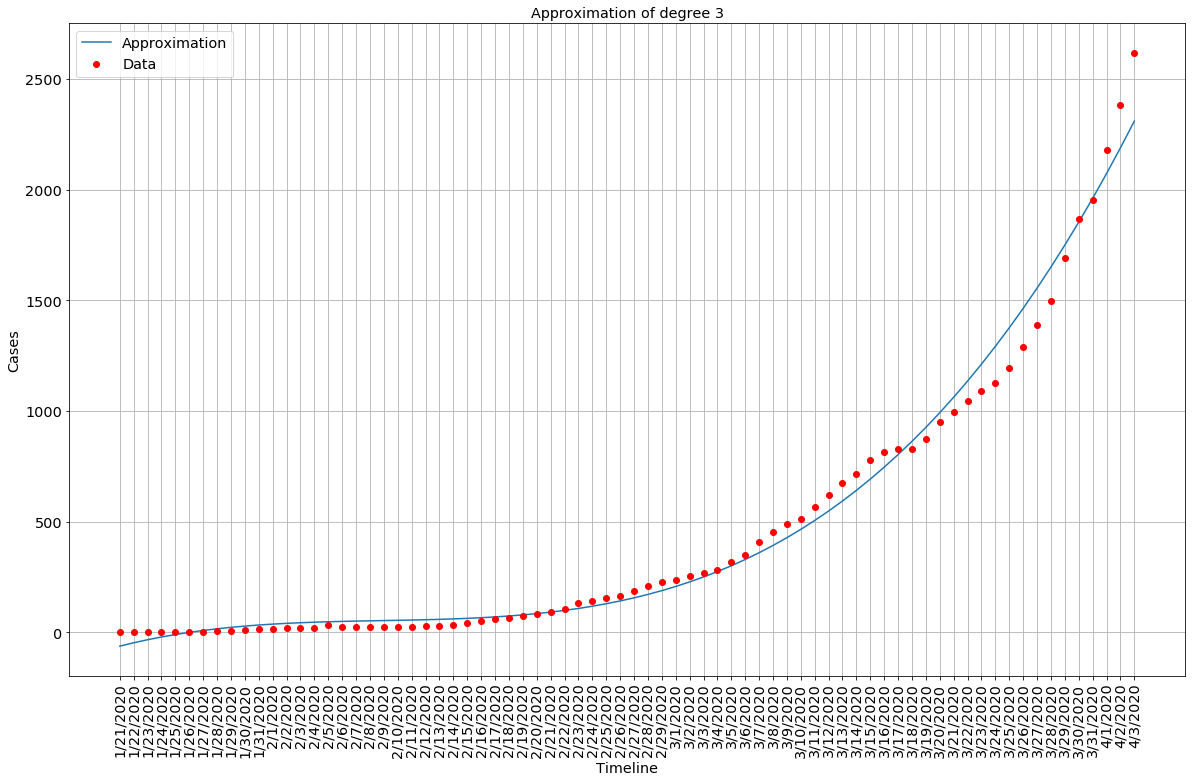

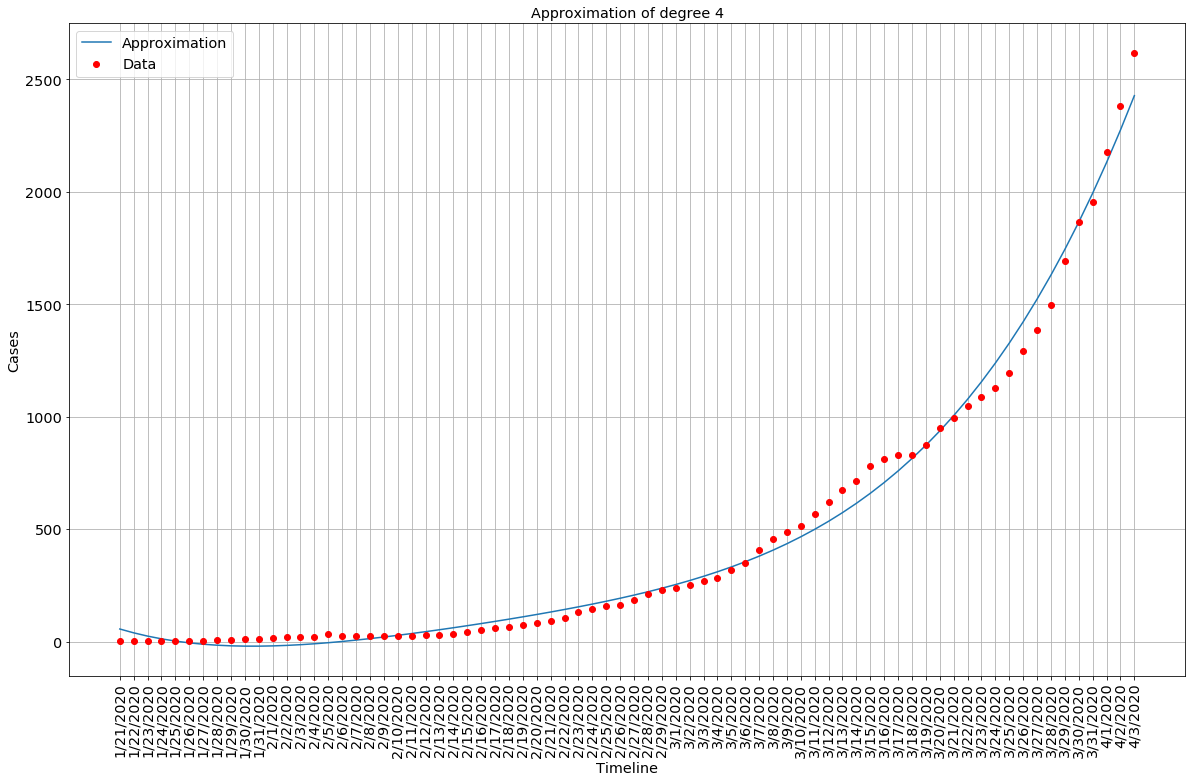

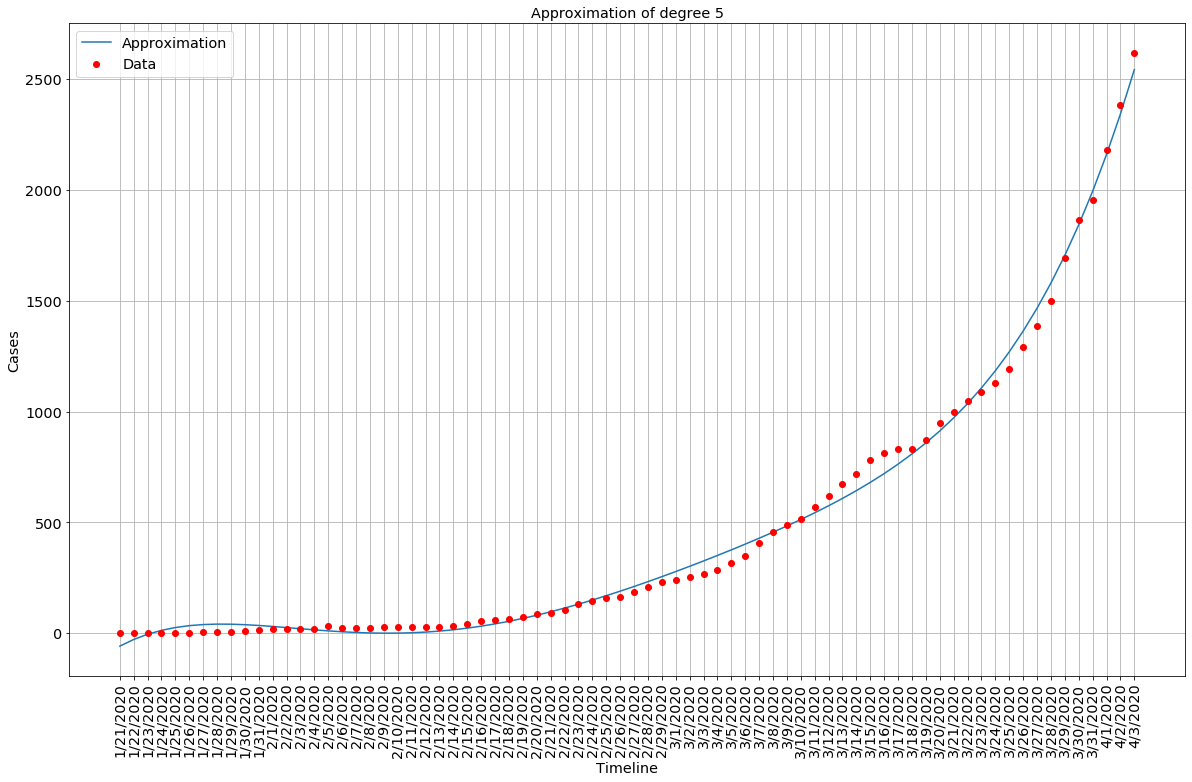

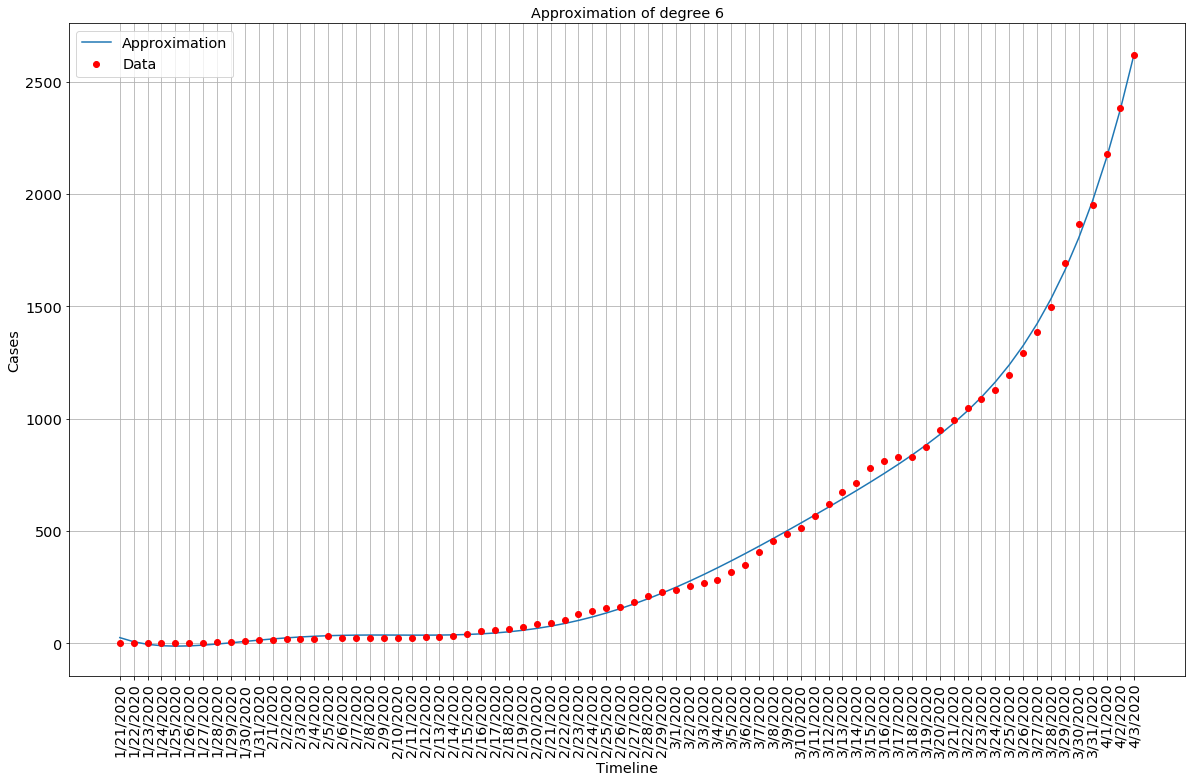

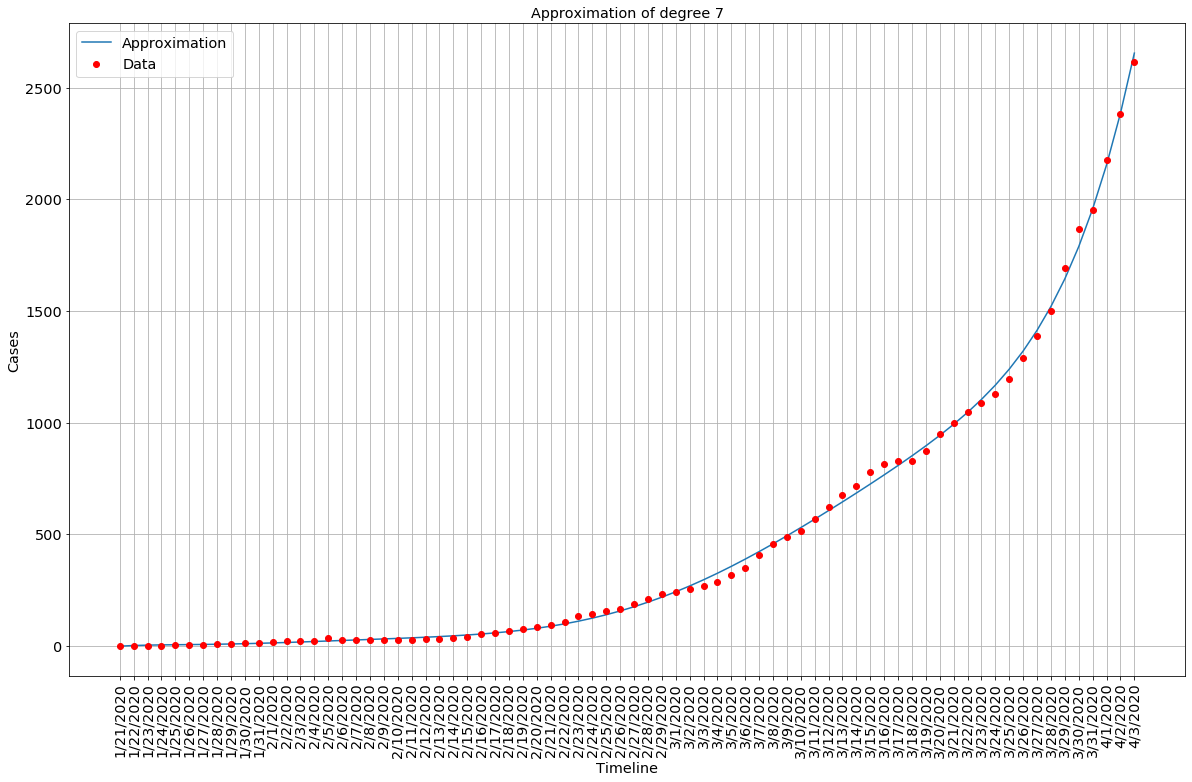

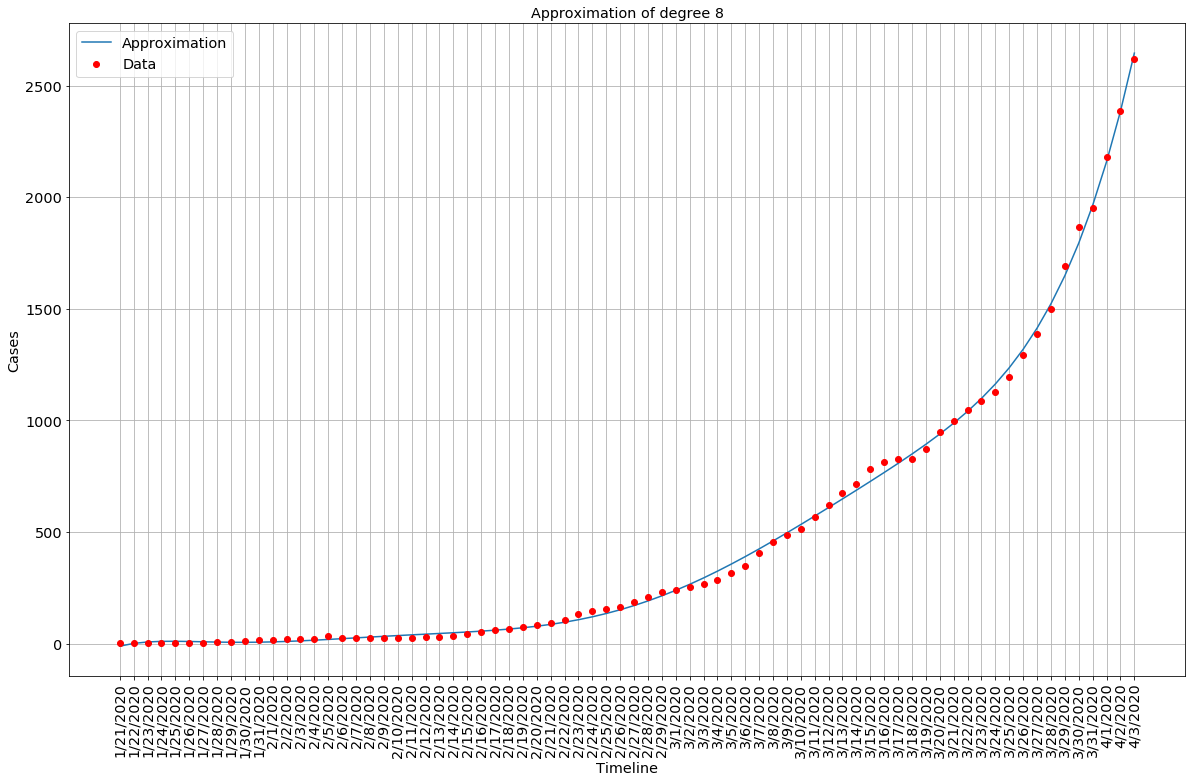

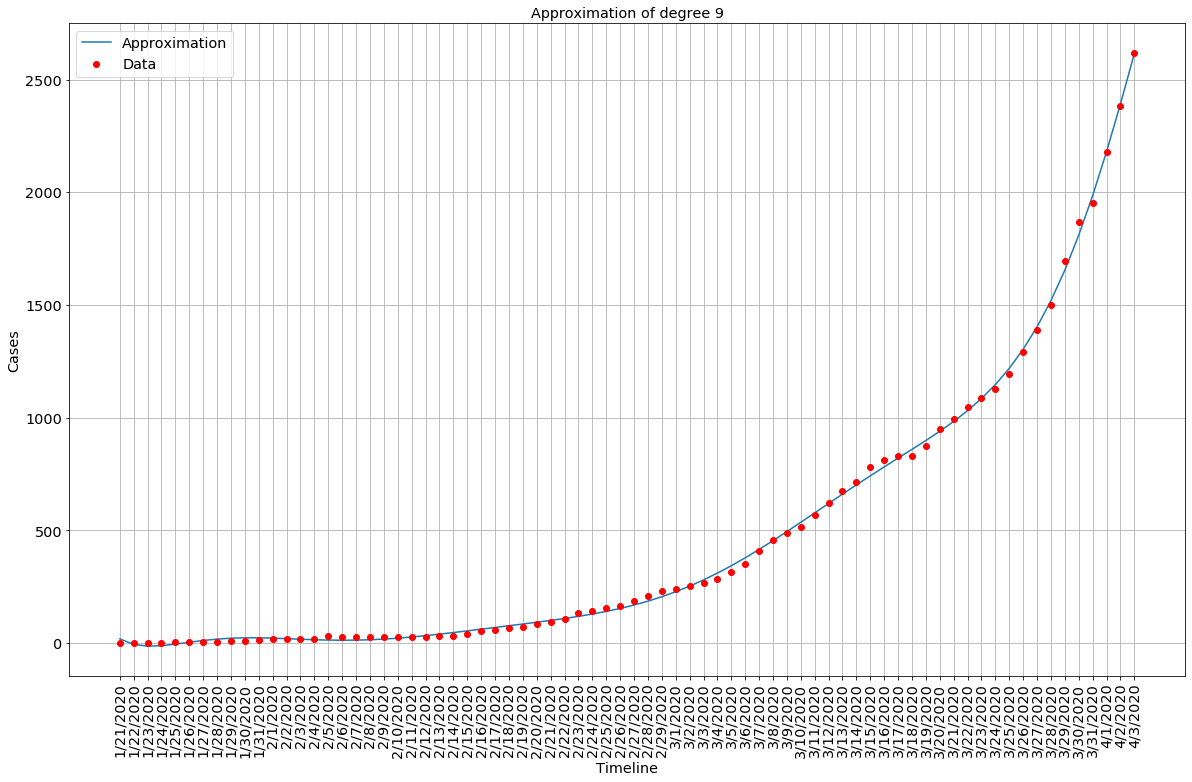

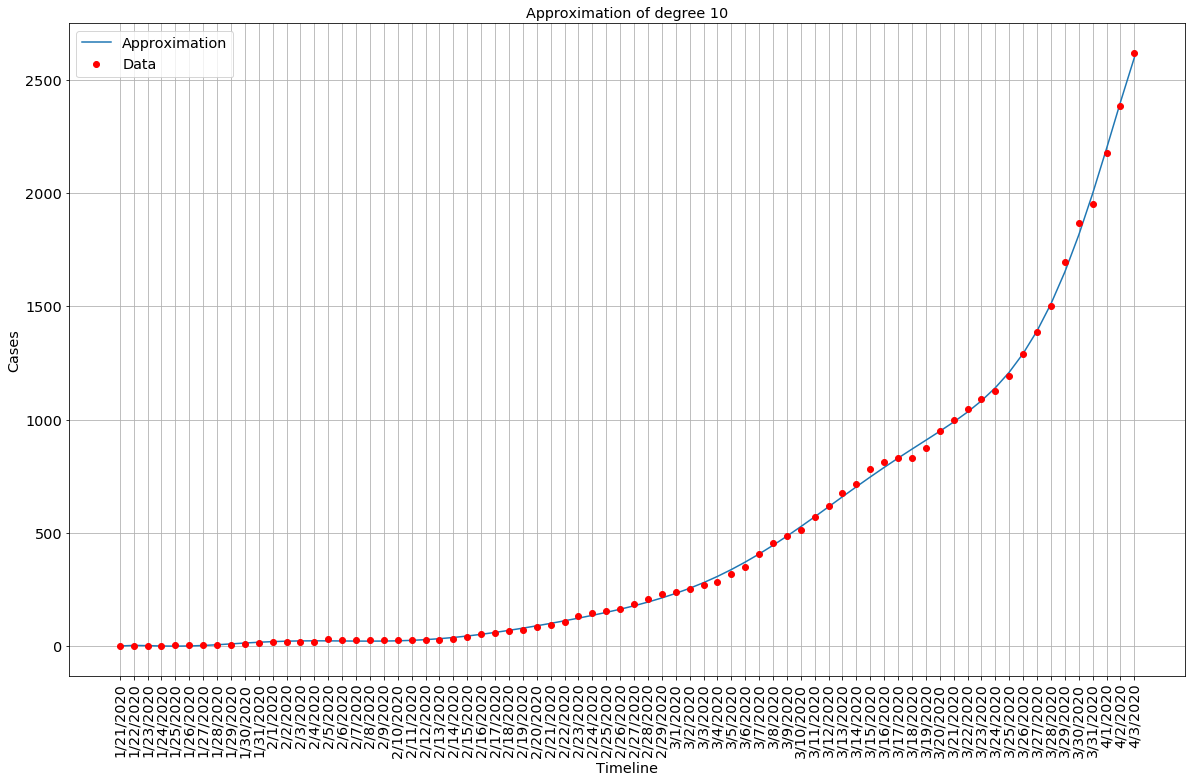

In [88]:
python_covid_approx(timeline, cases, 10)